In [0]:
# https://www.datacamp.com/courses/sentiment-analysis-in-python

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
! pip3 install langdetect

     |████████████████████████████████| 1.0MB 3.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=d74e10abd3b82039157e4befabe8f5a1c8f4c127e409a61426702803be071ec7
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [0]:
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from langdetect import detect_langs
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

**Course Description**

Have you left a review to express how you feel about a product or a service? And do you have a habit of checking a product’s reviews online before you buy it? This kind of information is valuable not only for you but also for companies. In this course, you will learn how to make sense of the sentiment expressed in various documents. You will use real-world datasets featuring tweets, movie and product reviews, and use Python’s nltk and scikit-learn packages. By the end of the course, you will be able to carry an end-to-end sentiment analysis task based on how US airline passengers expressed their feelings on Twitter.

# 1. Sentiment Analysis Nuts and Bolts

Have you ever checked the reviews or ratings of a product or a service before you purchased it? Then you have very likely came face-to-face with sentiment analysis. In this chapter, you will learn the basic structure of a sentiment analysis problem and start exploring the sentiment of movie reviews.

#### Elements of a sentiment analysis problem

What are the three typical elements of a sentiment analysis system?
1. Opinion
2. subject
3. opinion holder

#### How many positive and negative reviews are there?

You will work with a sample of the IMDB movies reviews. A dataset called movies has been created for you. It is a sample of the data we saw in the slides. 

In [0]:
movies = pd.read_csv("IMDB_sample.csv")
movies.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


- Find the number of positive and negative reviews in the movies dataset.
- Find the proportion (percentage) of positive and negative reviews in the dataset.

In [0]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies.label.value_counts() / len(movies))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


#### Longest and shortest reviews

Now your task is to explore the review column in more detail.

1. Use the review column of the movies dataset to find the length of the longest review.

In [0]:
length_reviews = movies.review.str.len()

# How long is the longest review
print(max(length_reviews))

10321


2. Similarly, find the length of the shortest review.



In [0]:
length_reviews = movies.review.str.len()

# How long is the shortest review
print(min(length_reviews))

52


### Sentiment analysis types and approaches


#### Detecting the sentiment of Tale of Two Cities

Your task in this exercise is to detect the sentiment, including polarity and subjectivity of a given string using such a rule-based approach and the textblob library in Python.

- Create a text blob object from the two_cities string.
- Print out the polarity and subjectivity.

In [0]:
two_cities = 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'
two_cities

'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'

In [0]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object 
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment   
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


#### Comparing the sentiment of two strings

In this exercise, you will compare the sentiment of two different strings. A string called annak has been defined for you and it contains the first sentence of Anna Karenina. A second string called catcher has been created and it contains the first sentence of The Catcher in the Rye. 

In [0]:
annak = 'Happy families are all alike; every unhappy family is unhappy in its own way'
catcher = "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."

Your task is again to detect the sentiment of each string - both their polarity and subjectivity. Which one has higher sentiment score? Did you expect that to be the case?

In [0]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


#### What is the sentiment of a movie review?

Can you calculate the polarity and subjectivity of the titanic string? This review is positive (i.e. has a label of 1). Is the polarity score also positive?

In [0]:
titanic = "Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship. The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs. The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />"

Do you remember how you found the longest and shortest reviews? One of the longest reviews has been imported for you. It is called titanic as it discusses the Titanic movie. 

In [0]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object 
blob_titanic = TextBlob(titanic)

# Print out its sentiment
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


### Let's build a word cloud!


#### Your first word cloud

In this exercise, you will build your first word cloud. A string east_of_eden has been defined for you. It contains one of the first sentences of John Steinbeck's novel East of Eden. 

In [0]:
east_of_eden = 'I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.'

- Generate a word cloud using the `east_of_eden` string. The background color has been specified as white.

In [0]:
from wordcloud import WordCloud

# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

- Create a figure from the word cloud object you generated in the previous step.
Display the image.

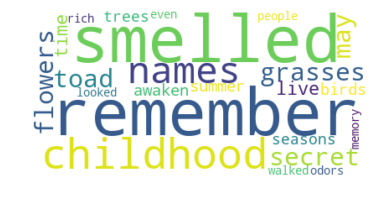

In [0]:
# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

#### Which words are in the word cloud?
A string called illuminated has been defined for you. It contains an emotionally charged quote from the book 'Everything is Illuminated' by Jonathan Safran Foer. Generate and display a word cloud using the illuminated string.

In [0]:
illuminated = 'I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'

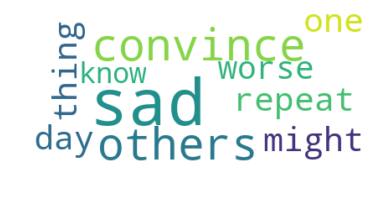

In [0]:
# Generate the word cloud from the east_of_eden string
illuminated = WordCloud(background_color="white").generate(illuminated)

# Create a figure of the generated cloud
plt.imshow(illuminated, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

#### Word Cloud on movie reviews

In this exercise, you will practice building a word cloud of the top 100 positive reviews.

What are the words that pop up? Do they make sense to you?

In [0]:
descriptions = '{rant start} I didn\'t want to believe them at first, but I guess this is what people are talking about when they say South Korean cinema has peaked and may even be going downhill. After the surprisingly fun and moving monster movie "Gwoemul" (aka "The Host") of 2006-- which actually succeeded in making a sharp satire out of a B-movie genre-- successive Korean blockbusters have become more and more generic, even though their budgets (mainly spent on special effects) have become more and more fantastic. Do South Korean movie-makers really want to squander all the audience and investor goodwill, which their industry has built up since the 1999 break-out film "Shiri/Swiri", by making a whole series of big budget mediocre movies like mainland China did? {rant end}<br /><br />The only "reason" I can fathom for making this movie is to dupe the investors into financing the most detailed and fluid digital animation of a Korean/ East Asian-styled dragon I have seen to date, for the final scenes. Now if they had introduced that dragon at the beginning and given it more personality and purpose like in the 1996 "Dragonheart", the movie might have had a few more redeeming qualities other than having lots of digitally animated dragons. Remember "Dungeons & Dragons" in 2000? Hasn\'t anyone learnt that the trick is not how MUCH special effects you use, but how WELL you use it? I hope there are more (and better) Korean legends they can use, because they have just killed a lot of international interest in Korean dragon legends with the way they filmed this one.<br /><br />In short, I agree with all the negative reviews gone before and wonder how Koreans felt about having their folk anthem "Arirang" being played at the very end. As a creature feature, I would have given it at least 5 stars out of 10 if the special effects or action sequences had been worth it, but I\'ve seen many video games with better camera work and scripting (just less dragons). zero day is based of columbine high school massacre. and its a video diary of two boys. at first you don\'t know whats going to happen you think it is just a bad student film. until they start talking about the horrible things they are going to do in this quite school. until they start talking about pipe bombs and guns and going shooting in the woods. they is a lot to say about this movie. all know this film is well a film you forget you watching a film and watching a real video two boys made.<br /><br />the two boys act like they are in a weird cult. they burn all there stuff. like play station games books dvds homework stuff school stuff. these two boys can be anybody your friends you brothers or the people you see walking down the street. it goes through there daily actives (and that is making a gun. in the videos they make it mentions the bullying that happens to them and how people said stuff about there clothes and the things you are into I\'m not saying its right but many people do do things like that.<br /><br />and also the thing is with this people are suspected to like it because of the sensitive topic they have chosen on this film.<br /><br />so thats my review on zero day.<br /><br />and lets just say the end shooting scene is messed up. you have a strong stomach. Holden was actually 55 years old at filming but looked near 70 and he only lived another 8 years. At one point Holden said, "I am over twice your age." Okay, try triple grandpa! The "old enough to be your father" theme they were shooting for didn\'t work. Granted senior citizens sometimes wind up with legal teens. More power to them, but that doesn\'t mean I want to watch it. It\'s not a matter of judgment but the digestive track. I like my food where it belongs. Lenz is fun to watch and the 70s cars, clothes, furniture, etc. make it worth it if it comes on cable late at night and you want to watch something to wind down for bed. It would have been nice to see the blonde friend of Lenz, the one who hocked her guitar, get more scenes. Pleasingly spacey... Who was this chick? I\'m going to try and find out. yes i have a copy of it on VHS uncut in great condition that i transfered to DVD and if anyone one wants to bring back the memories of a Christmas classic please emil me at dmd2222@verizon.net.i searched everywhere and i found nothing on this and i thought that i cant be the only one on this planet that has this classic on tape there has to be other people and if they do i fit in with them being that very very few that has this classic so i consider myself lucky and i have all of the muppets Christmas except one that john denver did with the muppets again i thinks its called a smokey mountain holiday im not to sure but its close. yeah cheap shot i know, but this movie is a great example of how a collection of signifiers of \'deepness\' (political turmoil, love/lust) can be combined haphazardly to great critical acclaim (see also \'american beauty\'). kaufman\'s movie plods along with gratuitous sex scenes interspersed with often painful dialog sequences (in one scene i counted three different \'generic European\' accents affected by the actors) and displays of state might run amok, yet fails to tie them together into the coherent meditation kundera offered. and in its over-long three hours it manages almost completely to gloss over franz,the missing fourth piece in the love triangle that lies at the heart of the plot, and in this manner sacrifices the novel\'s central mechanism of displaying the spectrum of emotions and of power relations that obtain in love affairs. it also fails to even include token screen time for tomas\' son, used in the novel to exemplify some of the political points kundera was making in the novel. combined with the overweening soundtrack, these flaws make this movie\'s three hours unbearably weighty in tone yet light in content. wow! i watched the trailer for this one and though \'nah, this one is not for me\'. i watched my husband and our friend\'s faces during the trailer, and knew this was a \'boy movie\'. i mean, hallo! a bunch of chick barmaids that dance - another striptease?<br /><br />then, i started watching it, it didn\'t look all that bad. so i carried on watching. i watched it right to the end. what an awesome movie. if anything, this is a chick-flick. these girls have attitude. it is really a feel-good movie, and a bit of a love story. really leaves you with a nice feeling.<br /><br />basically, the story of a small-town girl making it big in the city, after going through the usual big-city c**p. there have been a couple of these, it is almost a new urban legend. but it also makes you think of your life, and what you have achieved. well, me anyway. i think it is because the whole working in a bar scenario is very familiar, not just for me, but for many people i know. Don\'t trust the trailers for this one - it is aimed at bringing the men in. where would one start a review of the film Snitch\'d? James Cahill, god rest his soul, made one of the most daring insights into the human psyche since Encino Man. his beautiful story unravels around a drug squad cop McClure, which is a name synonymous with a character from the simpsons who also happens to be an actor! said cop delves deep into the underworld that is high school drug taking, and discovers a gang war to rival that of Police Academy 1, and i mean the one where Jones is racially vilified by his new partner, but manages to come out with some of the funniest sounds you will EVER HEAR.<br /><br />Cahill\'s grasp of effects, both visual and aural is electrifying, the slight pause between action on screen and from the speakers adds to the drama that is snitch\'d, a real gritty like underground thriller. also, kudos to his brilliant use of makeup, such as the supremely convincing burn marks a gang member suffers in his showdown with an indoor barbecue! YUCK! i feel the world of film is much less from James\' passing, his memory will linger on and on and on, reborn with every passing mention of his flagship production, Snitch\'d. his insightful director\'s commentary released a coke-hit up the nose of any discerning film goer, truly appropriate with the harsh reality that is life on the streets, captured in all the beauty of a roughneck punk knocking over a rubbish bin in a brawl.<br /><br />but i ask you, why did the big bosses swimming pool look so cheap? i\'ll tell you why, because thats life in Santa Ana baby, its not all drive bys and hastily constructed principle\'s offices, oh no. there are some folk who must infiltrate the soft, tattooed underbelly of street life in LA to kick their way through in moves that would not seem out of place at a School For Special Children\'s production of Double Dragon: The Play.<br /><br />the only qualm i have with this film, is that there was never a sequel made. come on Steven Spielberg, come on George Lucas, come on guy that made revenge of the nerds 1 through 23, how hard could it be to step it up a notch and pay tribute to this great man, James Cahill.<br /><br />he discovered Eva Longoria you know. oh yeah, that he did.<br /><br />Jonah when my sister said this movie was gonna be good i had second thoughts but i watched it and it was actually funny. basically the movie is made of a weird girl who goes to a small town where no one likes her and she just wants to go there and get the reading of her aunts will don so she can go. but its not all that easy. In this movie you will come across hilarious humor, a witch, a book of spells/recopies, a mentally challenged uncle and a dog. You will understand the meaning of the word freak a after anyways i hope you run right out and try to find this really old movie. hope you like it in total i will have to give it a 0.... no I\'m totally joking ill give it a 9 hope you understand that you will laugh, you will scream and you may just be offended.<br /><br />love yours truly: Dakota you can email me at dakota_loves_it@hot mail.com if you wanna when discussing a movie titled \'snakes on a plane\', we should point out early that the snakes are pretty darn important to the plot.<br /><br />what we have here are very bad cgi snakes that neither look nor move like real snakes. snakes are scary because they appear to be slimy, they crawl they slither. these snakes do nothing of the sort. they glide along like they would in a video game. they are cartoon snakes. i would go as far to say that even someone that had a major phobia against real snakes would not find these ones scary<br /><br />why on earth then would you want to include extreme close ups of these cgi failures? why not rely on suspense.. the whole \'less is more\' ethic. or better still, why not just make them look good in the first place? and then maybe still use them sparingly<br /><br />take one look at john carpenters \'the thing\'. here we have real slime, and gore of eerie proportions. 20 years go by and we get this pile of stinking sfx crap \'snakes on a plane\'. when are these people going to wake up and smell the coffee? special effects are going backwards!<br /><br />sure you could say.. but the movie is a joke, get it? sure i\'m with that idea, but do it well! in addition to the above, this movie has crap dialogue. and the music and sound effects are not creepy or memorable in any way.<br /><br />i could handle every other actor being part of this movie, except for jackson. what was he doing there? the man who starred in pulp fiction 10 years ago. is this career progression? are you offering people value for money? no. i\'d like to know what Tarantino thought when he was half way through this stinker of a movie<br /><br />the current generation seem to have very low expectations. and Hollywood seems to be offering them just what they want. on leaving the cinema i saw a number of advertisements for some truly horrendous looking future releases including... DOA: dead or alive, (another) cgi animal film called \'flushed away\', and another crap looking comedy named \'click\'. in addition to that i saw some awful trailers, including one for (another) crap British horror/comedy. i\'ve truly not seen the movie industry in a mess like this for a long time<br /><br />expect to see this movie for sale in the DVD bargain section for Â£1 in 6 months time. and if you\'re expecting to see a black comedy with tonnes of great looking snakes, and some bad ass cool dialogue coming from samuel l jacksons lips. forget it. what kind of sh*t is this? Power rangers vs Freddy? It was watchable and as good as the first film in the beginning but from the part where the protagonists get super powers in theirs dreams, it started to become childish. This sh*t should have been rated PG or PG-13 rather than R. I expected to see some very mature stuff but it was only for the 1/3 of the film. The rest are for little kids. Plus it\'s focused too much on Christianity. I know Freddy\'s a demon but there are many religions that have different ways to fight demons. Why does it always have to be Christianity? This is total Orientalism and filled with white men/westerner\'s superiority. Don\'t\' watch this, show it to little kids who loves power rangers. well, i said it all in the summary, i simpley adore the movie and the cast...i would give each actor an Oscar...great, great movie...i\'m 25 now and i watched it 4 times in different periods and i always think i won\'t cry and i always do, about 2 or 3 times...;) meryl s. was absolutely brilliant, jeremy irons also..just brilliant...i wish the movie received more awards... i really don\'t know anybody who watched it and didn\'t loved it... also, glenn close was fantastic... the story was beautiful and sad at the same time... i loved the fact that despite everything clara and esteban loved each other so much, and how blanca was close to her parents... well its official. they have just killed American Pie. The first 3 were absolutely hysterical, but this one and the others have been awful. I mean the story is about two college fraternity\'s who battle each other for its houses, I mean come on talk about a weak plot, the first three dealt with growing up, change and marriage, which are all worthy points of development in human society.<br /><br />The new Stifler is the biggest joke, I know its hard trying to compare yourself with the Steven Stifler but so no cigar. I give this movie a 3 because there is 2-3 funny bits in the film.<br /><br />The best character in this movie of course is Jim\'s dad i don\'t know why he keeps continuing to do these poorly developed films. well done giving the perspective of the other side fraulein doktor captures both the cost and the futility of war. excellent acting especially when german high command refuses in the name of chivalry to present medal kaiser ordered struck. the scenes of carnage are probably too intense for effete US minds who\'d probably prefer some silly speeches and senseless abstractions like 14 points or the league of nations. real americans might appreciate the story line and the action. for all the action and intrigue, fraulein doktor compares favo(u)rably to Jacob\'s Ladder. warning:It contains spoilers. If a movie starts with a sex scene then it\'s a bad movie. (see for example 300). This one confirms the above lemma. The second scene constitutes the spinning center of all the action. The fact that we know the end makes the movie boring. Even more, other plots are revealed as the story goes back and forth several times. And this made more frustrated. To compensate the consequent lack of suspense, we learn more and more about how unbalanced are the characters. And oh yes, they have lots to show. Andy (P.Hoffman), for example, is a drug addict, more?, he is cheating his wife, more?, he plans to rob his father, more?, his wife is cheating with his brother, more?, he doesn\'t regret his complicity to his mother\'s death, more?, he is a serial killer, more? etc etc it\'s not enough space to write here... I wonder how could he have a top job. And why his wife didn\'t leave him before. On the other hand I enjoy much the performances of the actor Hoffman.<br /><br />Even here PSH saves what is left from my 7$ spent for this absurdity. Why absurdity? Because it doesn\'t have sense, why should I care for the despicable characters? Another broken lemma is that a movie should have a sympathetic( at least pleasant) character. <br /><br />Also it\'s a lot of sentimentality, for example we are supposed to care for the sufferance of the widowed father without knowing anything about the parents\'lives before the crime. very few chess movies have been made over the last couple of years ,but this one is more than just a chess movie its a story about the need to be loved and the need to win it,John Toturro plays a psychologically challenged man ,nothing matters to him accept 64 squares and 32 pieces ,the game validates him as a person ,when he looses a game he looses the one thing that makes sense to him and John Torturro expresses this in a beautiful fashion,even the love of a woman was not enough to save him from his sad existence.It makes you wonder if there other Luzon\'s out there who obsess about the game,i am sure they are,if you are a chess enthusiast it won\'t hurt to watch it.Its an intelligent piece of work laid out properly and executed well,it achieves its objectives,unfortunately i doubt if there will be sequel. very badly made film, the action/violence scenes are ridiculous.<br /><br />1 point for the presence of Burton and Mastroianni + 1 point for the real tragic event of the massacre of the innocent italians: 2/10. to communicate in film essential things of life - like what is life, does it have a meaning? - is sheer impossible. Of course possible answers to these questions are demonstrated in every film (story), but communication needs a direct appeal to consciousness. This happens if the input from the senses overrules the "input" from our mind, i.e. our thoughts. Few directors know how to communicate essential things. Tarkovsky, is one. His "Stalker" shows images of existence, communicates life as it shows itself and yet escapes your mind. I think De Zee and De Graaff do the same. this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyone interested in a good drama. this was one of the funniest and informative shows that I have ever seen. This is a MUST see for anyone over the age of 16. this show had me and my 2 boys laughing out loud from the beginning. I don\'t know if everything on the show was true but the way it was presented left little doubt that Mr Wuhl was not only very knowledgeable but he also had a blast presenting this information to the very lucky college kids who were in attendance. If Mr Wuhl ever decides to do this format again they will have to rent a building the size of the Georgia Dome to hold all the people who will want to see it. I agree with the idea of making this a HBO series. It would have an amazing following this was a very good movie i wished i could find it in vhs to buy,i really enjoyed this movie i would definaetly recommend this movie to watch i would like to see it again but can never find it in tv, it would be well worth the time to watch it again this was a real guilt pleasure ... i saw the trailer and all the advertising, so i figured \'why not check out this vh1 movie?\' and, as they used to say on t.v., \'i can\'t believe i watched the whole thing!\' quinn and harris were believable beatle boys, and, although the accents were sort of over-the-top and difficult to decipher at times, i found the dialogue believable as well. the film touched upon the tenuous relationship of len/mc and showed how, deep down, they were simply two guys who grew up close together and shared a passion for music - coming at it, though, with different sets of issues and personal needs. you find yourself wishing they\'d hopped in the cab to snl for an impromptu reunion that would have knocked the world\'s socks off, but you also gain a greater appreciation for why they didn\'t this short film trailer is basically about Superman and Batman working together and forming an uneasy alliance.obviously,the two characters have vastly differing views on how to deal with crime and what constitutes punishment.it\'s a lot of fun to see these two iconic characters try to get along.i won\'t go int to the storyline here.but i will get into the acting,which is terrific.everyone is well cast.the two actors playing Superman and Batman are well suited to their characters.the same filmmakers that made Batman: Dead End and Grayson also made this short film.of the three,i probably liked this one the least,but i still thought it was well done.for me,World\'s finest is a 7/10 this movie, i won\'t call it a "film," was basically about nothing and functioned mostly for the popular acts of the time. yeah the war was on full swing (pun intended), and this movie gave the troops and our audiences a treat.<br /><br />but let\'s have something with a bit more substance.<br /><br />loved seeing a young Buddy Rich on the drums. the music was good throughout.<br /><br />but one cameo after another gets old fast.<br /><br />i didn\'t even recognize Zero Mostel! so if you\'re one from the "greatest generation," as they say, you\'ll definitely enjoy this...<br /><br />movie. this movie was so gay like its a mom and son cat that have sex, they also get scared of little kitty cats. they get set on fire by them. the mom cat alien thing kills a guy by stabbing him in the back with an ear of corn? they are bullet proof. invisible. and what not. the star of the movie, Clovis, is the cops cat, Clovis leads the cops to find the mom alien, and after the mom kills the cops, Clovis kills the mom by eating her head then she catches on fire. this movie sucks. it was way way more funny than it was scary, it wasn\'t even scaryt at all. the girl hits the alien on the head with a camera, it knoks him out. she then goes and hugs her. the then grabs her and begins to rape her. once again, Clovis comes to the rescue this movie was just plain dumb i do not think it was scary at all i went in hoping to be shocked and scared but was mostly laughing some of the scenes were just to fake and thrown together blood scenes were extremely over cg and some of the mutants were ridiculously gay looking it also sucked because the acting was just plain horrible u think they could get some good actors and most of the characters i hated just because how stupid and lame they acted even though they were supposed to be in the military i get to watch movies for free and seen many people walking out im guessing because it was so dumb kinda glad i didn\'t have to pay for it in short DUMB ASS MOVIE don\'t see it...but then again thats my opinion this movie was horrible. I could barely stay awake through it. I would never see this movie again if I were payed to. The so-called horror scenes in it were increadably predictable and over played. There was really nothing about this movie that would have made it original or worth the $7.50 I payed to see it. Don\'t go see it, don\'t rent it, don\'t read about it online because any of these things would be a complete waste of your time. Sarah Michelle Geller gave a lackluster performance and really should be ashamed of herself for sullying her good name with this movie. Shame on you Sarah for being associated with this horrible, horrible movie. Horrible movie, no need to ever see it. this movie was banned in england? why? tom savini, george romero, dario argento, lucio fulci and others had done far worse before and have continued to so since...<br /><br />this movie has all the basic elements of a decent 70s or early 80\'s horror film. good looking girls (who can\'t act to save their lives, by the way), a terrible lightning storm with a torrential downpour, a scythe, a crazy brother wandering around the family estate, and actually a pretty damn good twist at the end. but banned? seriously. when the English parliament banned this movie, the italians probably laughed their collective asses off at how backwards and prudish the brits really were.<br /><br />there was maybe two minutes of total screen time devoted to the violence and gore (which was greatly underdone). there was nudity but no sex although allusions to sex were made, obviously. but absolutely nothing worthy of being banned.<br /><br />i would like to see what could have been done if the filmmakers had a decent budget to work with. as it stands, the film is entertaining, but the lack of picture and sound quality take away from the end result.<br /><br />banned... what a joke... this movie scared me so bad, i am easily scared though so its no big thing but this movie was scary and whoever wasnt scared by this movie, im surprised because everyone i know said it was scary, i hope everyone sees it, but dont see it with the lights off like i did.... this movie let me down decidedly hard. it was a great concept that was ruined with a horrible script. The story just didn\'t flow and was disjointed at best. There were so many elements to this story that were not explained, or were forced into place with out any real thought. elements like the love story could have been expanded on a bit more, and the cannons need to be written in better. the whole main character growing up thing needed more about the training he was receiving and less standing around. everyone likes a good "little guy overcomes" story and this showed promise but with the scripting failures wasn\'t to be. While it did have some pyrotechnics in the final battle sequence it was lackluster due to a lack of choreography. this made for a maddeningly boring watch<br /><br />it could have been so good :( this movie is not porn, it was not meant to be porn, and unless my uncle runs for president of the world it should never be considered porn.<br /><br />now that that issue was sorted out, i can say i thoroughly recommend this film, as it\'s issues are still widely available. it\'s funny, the acting is great and it raises serious(curious) questions.<br /><br />i can\'t fully understand why this film was so mistreated, probably this is why i plan to never visit the us. Lena is the true pioneer of the modern riot-grrrl movement, confusion, curiosity and wit are her main attributes, she is occasionally angry, but aren\'t we all? this movie is made for Asian/Chinese market, targeting particularly fans of Jay Chou, one of the biggest music star in Asian.<br /><br />Jay Chou is a very talented song writer/singer. He is mediocre as an actor, although he did appear in several big-budget productions ("initial D", "Curse of the Golden Flower "). Amazingly, he won both golden horse (taiwan) and Hong Kong film awards for "initial D".<br /><br />The supporting cast are very well chosen, which appeals basically everyone from China. The cast including many famous movie/TV actors, singers, even sport commentator (Huang Jianxiang from China). However, they were not given enough time to show their talents.<br /><br />The biggest mistake is that Chu took over both director and writer position. He has a reputation of making shallow and brainless movies based off non-coherent scripts. With his poor directing and lam story, the whole talented cast, fancy vision effects and tones of production money was wasted.<br /><br />However, the terrible movie successfully cashed in over 10 million dollars, maybe even more in Asian, which made this one of the biggest box office success in Asian.<br /><br />The bottom line is: you can watch this movie only if you want to see how money and talents are wasted, or if you are simply accompanying your kids who are fans of Jay Chou. this movie is awesome. sort of. it dosent really say much, or do much, but it is an awesome movie to watch because of how stupid it is. the high school is taken over by evil ms.togar that hates the one thing that all the students love, rock& roll. riff randle get everyone tickets for the ramones show, and this movie peaks with a take over of the school led my riff randle & the ramones. this movie has everything, a bad script, questionable directing, bad actors(ie clint howard & p.j. soles), an awesome soundtrack,extreme campyness, these elements & much more come together to make this what it is,a classic.<br /><br />note - during the live ramones set, notice that darby crash of the germs is in the front of the crowd. neat-o. this movie has no plot, no character development, and no budget. it really sucks to put it in short terms. Since there is no development for the movie, it really can\'t even be looked as trying to be artistic or trying to make a statement against torture. Which leaves two other reasons to possibly watch it. To be shocked or to get off on it like a sick little freak. Well it falls short here too. The girl\'s reactions just seem dumb. it\'s extremely easy to tell that it\'s fake (honestly professional wrestling looks more realistic than the crap they try to get by with in this movie. They throw innards on her, but she\'s asleep for most of it, so it\'s just kinda dumb. The only really kind of worthwhile part is the end when they quickly cut from scene to scene just before the needle goes into her eye. But honestly the girl is extremely ugly and everything is incredibly fake, with the exception of the eye. if you want a good movie about torture, go watch Hostel and Hostel 2. Not only do they both contain realistic violence, but there is also an actual storyline that draws you in and makes you care about the people. Plus the tow movies really work on a deeper level considering themes like American fears of foreigners, issues of morality, testing how far a person can go, human instincts vs. civilization, and many other things. Plus they are carefully written and contain some good humor when the story isn\'t focused on the violence. These are much better choices over this piece of crap this movie has lot of downsides and thats all i could see. it is painfully long and awfully directed. i could see whole audience getting impatient and waiting for it to end. run time is way over 3 hrs which could have been edited to less then 2 hrs.<br /><br />transition between stories is average. most people confessed being on seating expecting something better to come out.<br /><br />its funny only in pockets. ambitious project and a below par execution. govinda does a fair job, anil kapoor disappointed me, rest we as expected. if u r expecting anything close to babel or love actually then its no where close. this movie begins with an ordinary funeral... and it insists so hard on this ordinary funeral feel that i lost interest within 5 minutes of watching, and started skipping scenes. it seems to me whomever made this movie is afflicted to the extent of becoming trapped in a permanent morbid trance, unable to contemplate anything else but death and destruction. well, i ain\'t one of the dark kids from Southpark, i want a movie that within 10 minutes gets me well into an interesting story, i won\'t sit and watch 10 minutes of nothing but preparations for a funeral.. my grandma on her last years was fascinated by funerals, perhaps she might have enjoyed this "movie". this is what you would get if you allowed a 10 year old (manic American) to write a story of a moon trip. Absolute garbage with no redeeming qualities Maybe it held some fascination in the 3D dept. but as a narrative and entertaining animation it held nothing to make wasting an hour and a half worth while. Save your time and money and watch BOLT instead<br /><br />Damn. Not enough lines, yet I feel that sums it up... well, I agree with an above review - this is like a cold-war propaganda story. Maybe it would have been more interesting if they had made it about the flies uncovering the hoax of the moon landing, or if the flies had died in the first minute. BTW - why were all the main character flies deformed? - not one had the full compliment of limbs! this is the worst movie i\'ve ever seen. i\'m not kidding. the next time it comes on, i will just continually run my head into a wall. it would me more enjoyable to sit in an emergency room trying to explain to a doctor why my brain is swollen than attempting to make it through this movie again.<br /><br />i hope that black and stiller never work together on a project this bad again. they are both good comedians, so i was shocked this was so awkward.<br /><br />if they had to do it all over again, i\'m pretty sure that they would decide to not do it. the folks that fronted the money, must have lost a ton. not really- because the special effects (all 2 of them) were terrible. this is the first time I\'m writing a comment on a movie on IMDb. but i had to write it for this one. its 3 hrs of unadulterated torture. from the starting u get the idea that the movie is gonna be bad. the acting is pathetic. I\'m a big fan of Ajay devgan (loved him in bhagat singh) but he is at his worst in this movie. amitabh seems to have worked hard for this one, but somehow the fear is missing. prashant raj is a non actor. and the most irritating part of the movie is nisha kothari. i have no clue why the director took her in this movie. the background score is repetitive. somehow i felt that ramu tried to repeat a sarkar, the color theme, the background score, the camera angles, but it didn\'t work. PLEASE Don\'t WATCH IT this is really films outside (not in a motel room). With real costumes (not only strings and swimsuits). You have to see this movie. it\'s the only porn movie I know that is worth watching between the sex scenes.<br /><br />Bon Cinema<br /><br />Laurent this is one of the funniest shows i have ever seen. it is really refreshing to watch and i was in stitches many times. i guess there is a social awareness factor to this too which makes it quite interesting. if these were white girls would they get the same reaction? maybe they would, maybe they wouldn\'t? the characters know no limits (check my lyrics) and do not exclude anyone from their twisted sense of fun!There are so many funny sketches. my favorites is the bob the builder one. it\'s so silly it\'s genius. if you like twisted black comedy then this is for you. if you like keeping up appearances it probably isn\'t.3 non blonde\'s is yet another hilarious British BBC comedy shown on TV! It is such a funny show and the characters unleashed on the unsuspecting public are laugh at loud funny! It would be impossible to keep a straight face watching the crazy characters and the reactions of the public! This series easily adds to the excellent comedies being produced! this is best comedy i ever seen! but not all can understand this you must be from Georgia to understand this amazing movie! :) overall one of best film i ever seen......... Vachtangi(Benjamin) and all supporting actors playing very very good but acting of Kote Daoshvili (Father Germogel) is for my opinion best acting in supporting role in history of films :)) in this movie playing many georgian stars like ipolite xvichia,sergo Zakariadze,sofiko chiaureli,verikoan djafaridze,Sesilia Takaishvili,Dodo Abashidze.... they all are Stars in Georgian cinematography :) plus in this movie is playing great Russian star Evgeni Leonov and of course Director of the film Georgy Danelia is one of the best...... i recommending this movie for everyone but remember you must know good Russian language to watch this movie this is a piece of s--t!! this looks worse than a made for t.v. movie. and i shutter to think that a sequel was even concieved and the results... war is prettier than this. jean claude van shame has done it again and he wonders why his career is where it is now. no script, no story and no time should be wasted on this. i mean that. 1 out of 10 is too high, way too high. goldberg should be jackhammered for this. van shame is no actor. this is a great movie. I love the series on tv and so I loved the movie. One of the best things in the movie is that Helga finally admits her deepest darkest secret to Arnold!!! that was great. i loved it it was pretty funny too. It\'s a great movie! Doy!!! this is a film about life, the triumph over adversity and the wonders of the human spirit. I defy anyone not to shed a tear by the end of the movie. This is more than just a tear-jerker, its an engaging, thought-provoking drama with excellent performances from all the cast but especially derek Luke and denzel washington. 7 years on, I\'m amazed that Luke is still a virtual unknown and washington only directed one other film. Nevertheless, apart from a slow build-up, the story of this foster child\'s trials and tribulations and how it still affects him in adulthood is the sort of movie that stays with you long after you have seen it. Like many fox searchlight pictures, this was more of a sleeper hit and didn\'t get the mass critical acclaim it deserves. The scene where Antwone finally meets his mother summed up the movie for me, there were so many ways that could have been done and it could have been all schmaltzy or it could have been unrealistic but Washington struck exactly the right tone, his mother never said a word and could only shed a tear, while antowne asked simply why. Her overwhelming guilt prevented her from saying anything, what could she say to defend herself? One of the most moving cinematic scenes I have seen. this independent film was one of the best films at the tall grass film festival that i have ever seen there i loved it there are so many things that was great about the film on top of all that the cast and crew that i had the opportunity to meet were absolutely phenomenal.I thought that Avi did a great job in his role. and Ricky Ullman was absolutely true to his role for a Disney actor i was amazed at his talent to be able to go from cheesy teen comedy to such an adult role with no problems the talent in the film was just amazing the cinematography was just great if you want to see an independent film this is one really that you should see.I think that Mr Gruver would have been so proud to have such a submission in his festival and his parents loved the movie so much when it won the audience favorite they went and saw it again. this truly was a great film it was dark and funny and sad and truly emotional it was just fabulous. I am honestly just so enthused by this film and i really don\'t want to spoil it for any one just see it and truly be amazed at it i think that these film makers really have what it takes to go places and I hope to see more work from them in the future. this film was just brilliant,casting,location scenery,story,direction,everyone\'s really suited the part they played,and you could just imagine being there,Robert Redford\'s is an amazing actor and now the same being director,Norman\'s father came from the same Scottish island as myself,so i loved the fact there was a real connection with this film,the witty remarks throughout the film were great,it was just brilliant,so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch,and the fly-fishing was amazing,really cried at the end it was so sad,and you know what they say if you cry at a film it must have been good,and this definitely was, also congratulations to the two little boy\'s that played the part\'s of Norman and Paul they were just brilliant,children are often left out of the praising list i think, because the stars that play them all grown up are such a big profile for the whole film,but these children are amazing and should be praised for what they have done, don\'t you think? the whole story was so lovely because it was true and was someone\'s life after all that was shared with us all. this film takes you inside itself in the early minutes and holds you till the end. it has a very humane story and very good selected music. The acting of Moritz Bleibtreu (Giancarlo Amato) and Barnaby Metschurat (Gigi Amato) is satisfying. Recommended to people who get bored of action films and want to see a good movie. this film is terrible. The characters are completely unbelievable, and wildly inconsistent. The plot is awful and some of the classroom scenes are cringe-worthy and make for uncomfortable viewing.<br /><br />In fact the quality of the script and characterisation would suggest that this film was written by high school students, only the utter lack of credibility to the school environment would suggest that, in fact, the writers probably never went to high school. The acting in most cases was weak too, although a lot of this was down to a poor script and plot, i am not sure that any actors could have made this film watchable.<br /><br />having said that the sound track was OK, and the cinematography was nice in places (although the editing was poor). this film is quite simply one of the worst films ever made and is a damning indictment on not only the British film industry but the talentless hacks at work today. Not only did the film get mainstream distribution it also features a good cast of British actors, so what went wrong? i don\'t know and simply i don\'t care enough to engage with the debate because the film was so terrible it deserves no thought at all. be warned and stay the hell away from this rubbish. but apparently i need to write ten lines of text in this review so i might as well detail the plot. A nob of a man is setup by his evil friend and co-worker out of his father\'s company and thus leads to an encounter with the Russian mafia and dodgy accents and stupid, very stupid plot twists/devices. i should have asked for my money back but was perhaps still in shock from the experience. if you want a good crime film watch the usual suspects or the godfather, what about lock, stock.... thats the peak of the contemporary British crime film..... this by far one of the worst movies I have ever seen in my life. I gave up to watch it after an hour and regretted that hour a lot. the acting is horrible and there is almost no plot. my guess is that someone came up with a strange shape of an animal and started to make a story around of it. borrowing some ideas from movies like Resident Evil and Aliens doesn\'t result in a movie like them. if this going to be a top Korean movie, I\'d rather won\'t bother to see even a Korean movie trailer...<br /><br />By the way, this movies is a good reason to believe that not necessarily a high rating means the movie is promising. I think every Korean who has internet for online gaming rated this movie over the 8, even though has no clue what it is about. this animated Inspector Gadget movie is pretty lame.the story is very weak,and there is little action.most of the characters are given little to nothing to do.the movie is mildly entertaining at best,but really doesn\'t go any where and is pointless.it\'s watchable but only just and is nowhere near the calibre of the animated TV show from the 80\'s.it\'s not a movie that bears repeat viewing,at least in my mind.it\'s only about 74 minutes long including credits,so i guess that\'s a good thing.unlike in the TV show,the characters are not worth rooting for here.in the show,you wanted Inspector Gadget to save the day,but there,who really cares?anyway,that\'s just my opinion.for me Inspector Gadget\'s Last Case is a disappointing 3/10 they have sex with melons in Asia.<br /><br />okay. first, i doubted that, but after seeing the wayward cloud, i changed my mind and was finally convinced that they have sex with watermelons, with people dead or alive. no safe sex of course. the (terrifyingly ugly) leading man shoots it all into the lady\'s mouth after he did the dead lady. never heard of HIV? guess not.<br /><br />the rest of this movie is mainly boring, but also incredibly revolting. as a matter of fact, in parts it got so disgusting i couldn\'t take my virgin eyes off. sex with dead people! how gross is that? and what\'s the message behind it all? we need water, we need melons, we need to be dead to have sex? sorry, but this stinks! there should be a sub-genre in the Western called \'the Robert Mitchum Western\'. Mitchum\'s brilliant, idiosyncratic, usually undervalued Westerns import his film noir persona to etch some compellingly dark character sketches, and bring an elegiac world-weariness more familiar from the films of Sam Peckinpah. \'Man with the gun\' is one of his best. Directed by Orson Welles protege Richard Wilson, it is a stark, monochrome beauty, full of chilling silhouettes and terrifying outbursts of savage violence, as Mitchum comes to tame a town terrorised by a monopolist with a private army. Mitchum\'s regression from soft-spoken stranger to deranged murderer, with a host of dark emotions in between, is a marvel of expressive, physical acting. there are three kinds of bad films - the cheap, the boring, and the tasteless. the only really bad movies are boring and tasteless. <br /><br />boring films are just, well, boring - if you don\'t leave quickly enough, you fall asleep.<br /><br />tasteless films actually have their defenders; but the fact remains that they are masturbatory aids for very sick people.<br /><br />only the cheap bad films are really funny, because the filmmakers wanted to make their films so desperately, they way-over-reached beyond their abilities and available resources.<br /><br />Bo Derek is just naturally boring and tasteless; fortunately, fate and a lack of funds and skill redeem her by making her seem cheap as well. this film is hilarious and it may well be the last really funny-bad film ever made.<br /><br />i first saw this in a theater, may god forgive me; i was laughing so hard i was rolling off my seat, and so too with most of the rest of the audience.<br /><br />it\'s clear that Derek and her husband-promoter, conceived of this film as, partly, a satire; unfortunately, the dereks clearly lacked any of the necessary resources to pull that off; consequently, the \'satirical\' element comes off as some school-girl\'s impression of some gay young man\'s impression of frank gorshin\'s impression of the riddler in batman trying to pretend he\'s robin - it doesn\'t fly over our heads, it has no clue where any human head might be.<br /><br />on the other hand, there are some supposedly serious moments in this film - it is supposed to be an action film, remember - that are so astoundingly cheesy, one wonders if someone squirted spoiled milk in one\'s eye.<br /><br />as for Derek\'s infamous tendency to reveal her breasts - i can\'t imagine a less erotic nudity photographic display, she is so weird looking with those broad shoulders, i can\'t imagine what any one ever saw in her.<br /><br />as for the plot - such as it is - well, it isn\'t; Derek chases around Africa, and god alone knows why. then her father - Harris - pretends to act in some maniacal puppet-show, and then of course there\'s the hunk\'o\'Tarzan that seems to have wondered in from advertisement without knowing that the subject\'s changed - probably because he hasn\'t seen a script - apparently no one has.<br /><br />negligible camera work, shoddy editing - if it weren\'t for the 3-way with the chimp, the film would be unbearable -<br /><br />as it is, it\'s a real hoot. there are those movies that are bad they are funny, then there are those where you scream "i want that one and a half hours of my life back"...thats pretty much what this is.<br /><br />dean cain tries to be an actor but fails. the sfx are really bad (repeated scenes and rocks that look like falling paper) and the fake plastic guns that have torches taped on them...the split screen effect used to show multiple things happening at once is just terrible.<br /><br />this movie cant even be used as one of those simple night entertainers, its just that bad<br /><br />if i could go negative ratings, i would the only enjoyable thing about this highly mockable movie is playing "guess" that location. What Toronto landmark will stand in for what American/international location.<br /><br />who knew that the anti-christ would be russian? obviously he can\'t be american since we need the yanks to save the day - oh Buck... you\'ll tell us all the truth... you\'ll show us the light... and the way outta the building should those nasty anti-christers get their way.<br /><br />Five golden raspberries. Faith is not enough to hope they don\'t make another of this ilk! We don\'t gotta prayer. the movie opens with a beautiful lady in a tattered white gown running through a stereotypical eastern european town. we know she\'s being followed by something, because she keeps looking behind her. and soon we see she\'s being chased by a mysterious man in a black trenchcoat. then we realize that the man is actually the vampire hunter and he is after her. but look is that her reflection in the store window??? no its just her identical twin vampire! but unfortunately they both get it.<br /><br />after this brilliant and amazingly fun throwback to the old hammer films of the 60\'s and 70\'s (in the credits the twins are listed as the twins of evil, which of course is the name of the final instalment in hammer\'s karnstein trilogy), the plot pretty much dies.<br /><br />What little plot there is involves dracula (who conveniently changes his appearance each time he is reborn, so the producer doesn\'t have to rehire the same dracula) coming to a morgue, the med students realizing he\'s undead and thinking....wow what an opportunity, maybe i\'ll just disregard all those movies that say that drinking vampire blood turns you into a vampire and use the vampire\'s blood to find a cure for our jerk friend\'s ailment. obviously this is a mistake and everyone becomes a vampire.<br /><br />A new concept but pulled off excruciatingly badly. The movie keeps setting up wonderful situations and refuses to do anything with them.<br /><br />For example the med students attempt to bring drac back to life by placing him in a bathtub filled with blood in a secluded run down country mansion. The house itself is scary enough to be the center of the film, but do we stay there? no because they decide to take the vampire to an abandoned swimming pool. sigh. This movie has a real problem with "homages" as i mentioned before the opening scene is straight out of hammer, and this house scene would have been perfect for a hammer-like movie, but the movie rapidly switches gears and changes to a medical horror.<br /><br />The other problem is that they introduce so many characters it is almost impossible to feel sorry for any of them. There are the med students and their wheelchair bound professor-type "friend" the med students are all: arrogant, boring, money hungry, and stupid. how they made it to med school at all amazes me, unless the med school had to meet its muscle bound hunk/big breast quota. and then there is the vampire hunter who remains mysterious through the movie. hey i can respect that but it would be nice if they didn\'t set it up like the movie would be about him. then you have random priests, cops, and science types. so many people are introduced and then quickly forgotten about until they need that person to either save the day or jump out for a cheap scare that it becomes quickly tedious.<br /><br />Basically this is a lazy movie. no real scares, just a few predictable jump scares. The set up for these is so elaborate it is hilarious. for examp le the bathtub full of blood. it is so obvious that drac is going to pop out of the murky blood. and yet we have to wait far too long to get to the inevitable jump scare. after this he kills one of the dumber and larger breasted med students. we all know she\'s going to become one of the undead. but what do the others do? bury her in a shallow grave near the house. sigh, so you know who will jump out at you when the cops show up at the house..........<br /><br />Oh well.<br /><br />Maybe someone will get the hint that it is impossible to make a scary vampire movie and just go for atmospheric, and then we will end up with an entire movie that is as good as the opening scene.<br /><br /> the first Scanners may not have been a great movie,but at least it was original.there is no such novelty to this one.the acting is worse,in my opinion,and the story is slower and nothing special.i also didn\'t like the dialogue.and the special effects are no better than in the original.this is movie is inferior to the first one in all ways.the only thing different about it,is that it is loud and chaotic at times.but that doesn\'t make a good movie.if they had done something better with the story and made it interesting,this could have been a decent movie.i actually couldn\'t get through it all without fast forwarding through it.to me,this is a forgettable movie,and not much more.despite all that,there are worse movies.being in a generous mood,i\'ll give Scanners 2 a 4/10. the characters at depth-less rip offs. you\'ve seen all the characters in other movies, i promise. the script tries to be edgy and obnoxious but fails miserably. it throws in some hangover meets superbad comedy but the jokes are way out of left field, completely forced, and are disreguarded almost completely after they are cracked. the hot chick is old and has no personality, shes just some early thirties blonde chick with a few wise ass non-underwear wearing jokes who is less than endearing. the attraction between Molly (the hot chick) and Kirk (the dorky love interest) is barely communicated. the attraction in no where to be found its a completely platonic relationship until they awkward and predictable seat belt- mishap kiss occurs. afer this they are in a full on relationship and its just incredibly lame. the main focus of this movie is not the relationship, but a failed attempt at making a raunchy super-bad-esquire movie with a semi appealing plot. I could compare this to the hangover, in its forced nature. i wont get into that. i could keep going but its just pointless. just don\'t pay to see this movie. the author of the book, by the same title, should not have let her name be used for this movie. if you have read the book, this movie takes such a liberal interpretation of the actual events in the book and its spirit that the movie and book seem to have quite little in common except the title and some superficial details. the movie adds nothing, in terms of artistic merit, to the book\'s own literary achievement.<br /><br />for those who have not read the book: you will also be disappointed. not only does the plot move at an incredibly slow pace, it doesn\'t offer anything more while it is moving slowly (like character development, for example). some viewers might be entertained by some of the graphic lesbian love scenes later on in the movie, but you might as well watch a showtime special for the stuff they show in therese and isabelle--its fairly tame and not imaginative at all. that kid a is such a babe; this movie was no Titan A.E.(of which it is in many ways modeled after) but still came off as entertaining, the fact this lost to a piece of monkey crap like Tomb raider makes wanna cry; includes some of the most entertaining characters i\'ve seen in disney film terribly underrated with matt dillon and tom skerritt, good backdrop for solid story and some memorable lines, well acted and well cast, tommy lee jones and bruce dern make you hate them with passion somewhere i\'d read that this film is supposed to be a comedy. after seeing it, i\'d call it anything but. the point of this movie eludes me. the dialogue is all extremely superficial and absurd, many of the sets seemed to be afterthoughts, and despite all the nudity and implied sexual content, there\'s nothing erotic about this film...all leaving me to wonder just what the heck this thing is about! the title premise could have been the basis for a fun (if politically incorrect) comedy. instead, we\'re treated to cheap, amateurish, unfinished sketches and depravity and weirdness for its own sake. if i want that, i\'ll go buy a grace jones cd. so, being a fairly deep fan of horror movies, it\'s been a while since i\'ve seen one that really made me jump (or fidget nervously.)<br /><br />definitely going to get this on DVD when it comes out... a hell of a lot better than the ring. the thing that i don\'t get is that so many people that we talkd with after the movie thought that it was horrible, well, if that\'s what you think, then so be it... i know what i liked and it takes a fair amount to get me to actually feel scared, so i have to say that this one is worth watching.<br /><br />now, you might be disappointed in the story if you need everything in a neat and tidy line, because the plot goes back an forth a little bit to help build the story (i think that if it was shown in chronological order, it would have ruined the whole thing.)<br /><br />i\'m actually glad that this movie had very little bloody messes in it... maybe the rest of you studio writers and whathaveyous will realize that you don\'t have to splash the red stuff all over the set to make people afraid. shakespeare\'s plays have a way of transcending time. The language somehow breaks the time barrier. but perhaps it is the actors who really do that.<br /><br />after the disappointment in Romeo and Juliet (the version with Claire Danes and Leonardo DiCaprio), was hesitant take on another modern rendition of Shakespeare. To my surprise Othello was great!<br /><br />Iago\'s character was played so well by the Kenneth fellow! even thoough Iago is really evil and despicable, the character was played so well that it does what shakespeare intended for the charater to be, a pleasure for the audience to hate. i have to say that fishburne\'s performance here was really good as well.<br /><br />i recommend this for shakespeare scholars and lazy students (who refuse to read the book) alike. seriously what the hell was this movie about,,simply stupid,,i\'d give it 0 but,,,1"awful" is the lowest you can go,,seriously this movie is not worth watching,,waste of time, i don\'t know what the hell is wrong with you guys voting this movie 7 out of 10,,i seriously can make a better movie than this , hire some other unemployed people,,\'n i promise i\'ll make a movie better than this,,this movie was so bad,,that i\'ll never watch a movie starring Steve Carrel again,bottom line don\'t waste your time to download it off the net or rent it,,i\'d nominate this movie for the worst movie of the century i mean the worst is Something Gotta give but after that this is the second seriously i loved this film..i had started to read the book and i loved it...the way everything was set up and everything had a purpose...i think this film did so well was because Louis Sachar wrote the screenplay..and of course Andrew Davis directed it...Shia Lebouf gives a great performance for his first film...the storyline is very cool and interesting...there\'s humor, heart and intensity...it is very similar to the book..i find this film to be not the least bit boring...i absolutely loved it...and i encourage anyone to read the book..all in all this film is very well put together and carefully crafted...two thumbs up for me in every single way save your money. i have been a fan of fullmoon productions for a long time and i have never seen them make a movie as bad as this. the casting is terrible, the story is even worse and the special affects are worse than any movie iv\'e seen sence the 80\'s. this movie is so bad i cant even suggest renting it. really excellent movie, one of the best i\'ve seen. Touching and simple - just like life, sometimes you cry sometimes you laugh and it\'s just beautiful. not too much of anything, just as it\'s suppose to be. Really loved the idea of the movie, noone is bad or good, all or just people, sometimes make mistakes mostly because of society\'s pressure, everyone tries to stay strong and some succeed more than others and the most important thing is that you don\'t have reasons to get angry - you can do it, but eventually the anger goes away and then you to need to let love come back in although it\'s hard, there lies the true happiness.<br /><br />Great actors and cast, the movie really gets you into the feeling of the movie.<br /><br />nice nice nice.<br /><br />I recommend to see it, especially if you like to see italians\' life... quote by Nicolas Martin (nicmart) from Houston, TX: "Fine film, but DVD "reformatted for TV", 8 April 2002 - This is a charming and emotive film. On the other hand, the DVD I purchased has been "reformatted to fit your TV" by the clods at Columbia Tristar. There is no excuse for not providing the film in widescreen format, except that Hollywood treats all films like the moronic, disposable trash that it is so used to producing. What a shame."<br /><br />What a (criminal!) shame indeed. However, there is another version out though. See here for details http://www.dvdbeaver.com/film/DVDCompare2/kingofmasks.htm<br /><br />Wonderful performances by the two main actors (The King and Doggie) BTW. question: how do you steal a scene from the expert of expert scene stealers Walther Mathau in full, furious and brilliant Grumpy Old Man mode? answer: quietly, deadpan, and with perfect timing as George Burns does here.<br /><br />I know nothing of Vaudeville but this remains a favourite film, the two leads are hilarious, the script funny, the direction and pacing very fine. Richard Benjamin is very funny as straight man - trying to get at Burns through the window etc. Even the small parts are great.<br /><br />There are so many funny scenes, Mathau messing up the commercial, Burns repeating his answers as if senile...<br /><br />A delight.<br /><br />Enterrrrrr! pokemon the movie was a terrible film. unlike the first one, this is not a good film at all. the graphics were decent but the story was flat and no real drama was built up in it. in the first one the interaction between the characters were decent. the subtraction of brock and addition of tracey was bad. tracey really doesn\'t have much to say or do, and unlike brock offers no comic relief. the only good points is you get to see misty actually get jelous over ash, and her early brooding over being called his girlfriend was entertaining. overall this film isn\'t worth renting and the short movie before didn\'t do anything for me or my wife. and we do consider ourselves pokemon fans.oh well, maybe the next one will be better.cant ge t much worse please, future writers, producers, directors - learn from this movie!<br /><br />never before have i seen such a bold and original tale created for the big movie screen. bold, because the script constantly made a step so many fantasy movies safely avoided - a step to something new, creative and daring. just when you think \'oh, i\'ve seen this before\' or \'i am sure this is what will happen now\' - StarDust would make an unexpected twist and involve you more and more into the story.<br /><br />the actors are great - even the smallest part is performed with such talent it fills me with awe for the creators of this movie. Robert De Niro is gorgeous and performs with such energy that he simply steals the show in each scene he\'s in. Michelle Pfeiffer is the perfect witch, and Claire Danes a wonderful choice for the innocent and loving \'star\', Yvaine. Other big names make outstanding roles. I had the filling everyone is trying to give his best for this movie. But once again, the story by Neil Gaiman, all the little things he \'invented\' for this universe - simply outstanding.<br /><br />I watched this movie at a pre-screening today, a day before the official release, and do hope it will have huge success. There is so much humor, but also tense moments as well as lovely tender scenes. The look in the eyes of Yvaine, the \'frivolities\' of Captain Shakespeare, the passion of Lamia the witch - impressive, unforgettable<br /><br />For me this is the number one entertaining movie of 2007, watch it and enjoy it<br /><br />11/10 - Outstanding<br /><br />peace and love please don\'t rent or even think about buying this movie.they don\'t even have it available at the red box to rent which would cost a $1 & i think its worth less than that.the main reason why i rented this d movie was because Jenna Jameson is in the movie lol between 2-5 min.i will give credit that the movie had hot chicks and quite a bit of nudity but other than that you might as well buy another d horror movie that has the same thing with nobody you know.Ginger Lynn has more acting time in this movie than Jenna & she\'s not even on the front cover of the movie nor her name.i recommend people to watch zombie strippers because you see Jenna almost throughout the whole movie & nude most of the time.this movie is a big disappointment & such a huge waste of time. or: It\'s a bird ? It\'s a plane ? No, look... It\'s a disaster ! or: No need to look up in the sky.<br /><br />or: (... OK, that\'s enough.) If singer tried to make a romantic titanic like movie to crash the box office record, he failed. The SR structure can\'t do this, the dark and restricted color scheme (I would call it "wishi-washi"), the boring usual dialogs, the clown with advanced alien technology, the missing fun and magic, etc. makes the movie completely disappointing.<br /><br />It simply doesn\'t work.<br /><br />The main thing at a character like superman is, that he is a superhero. That\'s the core, the most important thing.<br /><br />Love trouble and a sadly lost depressive Supersoftie can maximal only be a facet in a 2:40 long Superman movie, not the whole time.<br /><br />Because then it is not a superman or superhero movie anymore. It\'s like a (and in this case a very bad and boring) social study, where every 30 minutes a person flies around.<br /><br />That\'s a big difference.<br /><br />This movie is a joke. Holy skywalker, this is Superman, so give us Supervillains, Superaction and the most important thing, Superfun.<br /><br />We want ENTERTAINMENT ! Singer, if you want to make a 2:40 long soul love trouble drama about lost and sadly people ? Then take normal human characters and make a yentl remake.<br /><br />They say: Superman returns. And then, supersadlysoftie stands in the door.<br /><br />Maybe singer has tried to kill the legend without kryptonite, but one bad movie can\'t do this. Don\'t give up, they plan a sequel...<br /><br />Next time singer (and Warner Brothers), make a superhero movie, not a depressive superlame soap, or let it be. A superhero movie means a colorful fantasy with a lot of fun and magic.<br /><br />This movie is like a very cheap chocolate box with a super cover. Yes, technically there are all sorts in, yes, there is a lot of small talks, there are a few jokes, a view action scenes, etc, but the only one what all these worse pieces have in common is their poor quality.<br /><br />It\'s not more than a super boring patchwork and one of the worst movies I have ever seen in my live.<br /><br />The ridiculous cast strategy (Cast them young as possible, so we can make sequels in the next 25 years) gives the rest. Kate Bosworth plays a 22 year old star reporter, she\'s looking like 19. Superman was full five years away, so he slept with her 6 years ago, so she was 16, (looking like 13) and a daily planet reporter, wroting "I spend a night with superman". Warner Brothers, that\'s too much.<br /><br />Routh is not so bad, he is playing a little bit wooden, but the whole movie is wooden, so... ?! Temporary good were marsden and sometimes posey. The rest, forget it. Even spacey, this is not his terrain.<br /><br />Reeve/Hackman/Kidder were acting so easy, with fun. What a difference.<br /><br />The Jesus poses at the end are ridiculous too. What the hell should that be ? The problem here is, they mean this serious, not as a joke. Next time Spiderman or Batman or Ironman falls and rises like Jesus or angels ? Or they speak with god directly. Why not ? They are superheroes, saving human lives every day. So at least one talk with god every week should be possible... Oh my god.<br /><br />Maybe this was not the real announced movie, instead it is from a bizarre dull parallel universe.<br /><br />For the warner brothers this superlame depressive flick will be possibly the greatest disaster in history. Not only because of the money.<br /><br />I understand how difficult it (maybe) was to create and transport some messages or feelings, but showing lone, lost and sadly people isn\'t new and thousands of movies or TV-Shows did it better, in very old or new ones like magnolia. And the flying frogs there were more impressive than this flying superwoman, sorry, superman of course.<br /><br />Singer and WB, that\'s simply nothing. In fact it\'s even more than nothing, it\'s like a black hole that destroys the passion for (comic/superhero) movies and steals us three hours of our life.<br /><br />Mrs. Smilla\'s little brother. (Very angry and green like the hulk.) one of the worst films i have seen to date. Pathetic action scene and really bad acting also do not help. The only good point is Gary busey\'s parts but this does not lift the film very much. it lives up to its B film ranking and passes the test with flying colours. A waste of my money although i found entertaining to begin with its gets annoying after a few watches. i do not recommend this film unless you watch it for free or its a gift. ( a gift you can ask for the receipt and send back for a complete refund).<br /><br />Really BAd.<br /><br />1/10. one of the best low budget movies from Germany! is this is the dark side of new age? if you believe in esoteric, please don\'t watch this movie! it blows all your positive fantasies away. this movie shows that beyond the peaceful faÃ§ade of spiritual soul searching lies a world of extreme transgressions and terror. i hope there will be a 35 mm copy soon! Andreas Marschall\'s first film is just the beginning of a new area, making movies with a few euros! i\'m waiting for the second hit! one of the best ensemble acted films I\'ve ever seen. There isn\'t much to the plot, but the acting- incredible. You see the characters change ever so subtly, undr the influence of the rented villa in Italy, and love. And happiness. The film casts a mesmerizing spell on you, much as the villa does on all the women. Truly "enchanted". okay, but just plain dumb. Not bad for a horror/comedy film. I was reading how people switched it with the Michael version and that is a good trick in my opinion because some grown ups hate horrors and when they see this one it will get them interested in horror films like this one or maybe (never seen it) the horror (possibly comedy) uncle Sam, i\'ll have to see about renting or buying that film but the 2nd is way better then this one but i bought this one on VHS of Amazon and got it November 21, the day before thanksgiving. worth the four bucks, l.o.l. at this film.<br /><br />9/10 obviously has some talent attached, Maria Bello is always great. but this is just a dreary wast of time, portraying every character as someone to be loathed and exploited so someone could make a movie out of an \'interesting\' story. well, i hope they got it out of their systems. unfortunately for the audience, there is no insight, no sensitivity, no context, and really no humanity. which would all be fine, except it has no humor, no horror, no context, and nothing constructive to say about the story it\'s trying to tell. bad things happen, you sit and watch it, you don\'t care, so what? 99% of the time, the words \'based on a true story\' constitute an unintentional warning to the audience. it means the director and screenwriter are lazy and fascinated by some events they heard about somewhere, so they just throw them up on the screen and expect the \'true\' nature of the story to make the audience feel something without the filmmakers having to do any of the work. i hope they had a great time making this movie. it stinks on ice. now don\'t get me wrong, i do enjoy christmas movies. i love its a wonderful life and i really enjoy the versions of a christmas carol with george c. scott and alistair sim. but this particular movie is awful. i think the i love life song the ghost of christmas present sings is especially painful. albert finney sings fairly well in annie. i don\'t know whats wrong with him in this movie but it sounds as though someone is trying to sing through a mouthful of dead gerbils. the only thing that saved this movie for us was shutting the sound off and watching the dance numbers accompanied by the south park christmas cd. note to George Litman, and others: the Mystery Science Theater 3000 riff is "I don\'t think so, *breeder*".<br /><br />my favorite riff is "Why were you looking at his \'like\'?", simply for the complete absurdity. that, and "Right well did not!" over all, I would say we must give credit to the MST3K crew for trying to ridicule this TV movie. you really can\'t make much fun of the dialog; Bill S was a good playwright. on the other hand, this production is so bad that even he would disown it. a junior high school drama club could do better.<br /><br />I would recommend that you buy a book and read \'Hamlet\'. no movie with dennis hopper, gary busey, erika eleniak, tom berenger, dean stockwell, marilu henner deserves a rating under 5 on here. This is a poor mans version of movies like 16 blocks or the timeless Midnight run except the prisoner being transported here is the very easy on the eye Ms.Eleniak. Tom Berenger plays another gruff, maverick military type well and William Mcnamara plays his rookie-about to be discharged foil well. The plot on the face of it is absurd because I lost count of the times Eleniak should have and could have escaped but this is an entertaining feel-good movie and there are good cameos from all of the above actors that keep the movie rolling. This isn\'t really a family movie as there is some swearing and a rare nude scene with eleniak but this is a lot better than some of the other guff that came out around this time. myself and 2 sisters watched all 3 series of Tenko and agree this is by far one of the BBC better series.The whole cast were very convincing in the parts they portrayed and although the 3rd series was somewhat slower it was compelling viewing and my evenings wont be the same without it.No doubt we will be watching it again as it is a series which I would never get sick of watching.Excellent viewing and full marks to the BBC for such a brilliant series and the casting.First rate in all departments and would recommend this series to anyone although some age limits must be considered because of some adult material.So grateful to the BBC for releasing this series on DVD and Video. my wife is a fanatic as regards this show. That being the case I bought her seasons one through three and season four is on order. I personally think the show is one big farce the cast is equally bad. Alyssa Milano should have stuck to the other trash movies she made such as Poison Ivy, Embrace of the Vampire to name a few, the other female supporting cast members are equally inept in their portrayals. I\'ve seen better special effects in the old Republic Pictures serials I saw as a child. I can understand why the male leads remained on the show for such short periods of time even though I don\'t know if it was their own choosing or not. Please. please don\'t renew for another season as enough is enough, Bob my friend bought the movie for 5Â\x80 (its is not even 1 cent worth), because they wrote it was like American pie. but we would soon find out that there is a long way from American pie to that piece of crap. it is not even a comedy, its more like a really really really bad documentary. not only the story is bad, the picture and sound also sucks to. they put in some alcohol, chicks, dwarfs and drunken teens. and the result is a disaster. if you see this movie don\'t buy it, rather spend your money on something else, and better. if you are gonna torture yourself, then don\'t invite your friend/s, unless you hate really much and you want to get rid of them. maybe i need to have my head examined,but i thought this was a pretty good movie.the CG is not too bad.i have seen worse.the look of the creatures(and by creatures i mean the good and the bad snake)was pretty cool.the action scenes involving the snakes was really good,i thought.there are some lapses in logic at times,and the story doesn\'t always make sense.but for a creature feature,there are a lot worse.a lot of the other creatures seemed lifted from other movies,so it\'s not wholly original.i think the gist of the story is original though.there is a bit of similarity to Godzilla(the Big budget American version)which liked a lot.i didn\'t like this movie as much,but i still say it was pretty good.i also liked the music.all in all,i think Dragon Wars is about a 7/10 let me first say, i watched this movie around midnight, and usually there only is trash around this hour, but this movie broke the record<br /><br />first of all the main character is an old non attractive creepy guy, yet he gets to f*ck all girls that come on his path for example he goes to a shop, talks to a girl and then you see them f*ck<br /><br />secondly there are loads of sex scenes, and in many of them there is no nudity at all, i would not have been surprised if one of the characters in the movie would say: fast put your clothes on so we can f*ck!<br /><br />thirdly this movie should show what a sexual addiction can do to a man or a family, this movie only shows soft bad acted erotica it makes me wonder why those actors agreed to play in such trash just watched it, me and my better half could not believe how awful and badly acted it was. If anyone else thinks its good then you must be easily pleased. I actually gave up a night out to watch this, its all been done before. IE. hostel springs to mind, but at least that did not make you cringe with the bad acting and lack of story line, same old stuff, re-hatched,i read so much about this film, i even recommended it to my mates, my fault,someone said it was good! no more gory,horror or reeling back in disgust than your average "scary movie" it has to be said, please don\'t bother with this movie. get mary poppins. now thats scary! I\'m off out now, go to the cinema and watch something scarier than this, little miss sunshine maybe its too bad that no one knows anything about this movie, and it gets old telling people it\'s rap\'s version of spinal tap. and you know, im sorry i dont have any better comments, but damnit, go get the movie and watch it, and then make all your friends watch it too, just like im gonna. it\'s amazing that so many people that i know haven\'t seen this little gem. everybody i have turned on to it have come back with the same reaction: WHAT A GREAT MOVIE!!<br /><br />i\'ve never much cared for Brad Pitt (though his turns in 12 monkeys and Fight Club show improvement) but his performance in this film as a psycho is unnerving, dark and right on target.<br /><br />everyone else in the film gives excellent performances and the movie\'s slow and deliberate pacing greatly enhance the proceedings. the sense of dread for the characters keeps increasing as they come to realize what has been really happening.<br /><br />the only thing that keeps this from a 10 in my book, is that compared to what came before it, the ending is a bit too long and overblown. but that\'s the only flaw i could find in this cult classic.<br /><br />if you check this film out, try to get the letterboxed unrated director\'s cut for the best viewing option.<br /><br />rating:9 it\'s a weekend i\'ve been watched this funny film. and i really like it. all the kids are cute, who remind me of my own childhood with those stupid thinking. it\'s a real entertaining movie for a group of families at weekend night, which could make lots of memories and laughters. Kid\'s humor always work. nice acting as well. simple story but cool shooting. nice job for directer to find the kid\'s way. when it comes to the kid movie, i think of "12 and holding". another one this year but differed aspect to the kid\'s world, which is real and cruel. awesome work. H2EFW focuses on the happy side of childhood, which every kid and family need. p.s. Twitch, i think, is the voice of Nemo from "Finding Nemo". it brings to mind the writings of Stephen King and the remembered childhoods filled with terror from stories like IT - as the exact opposite. There is no terror in these childhoods that any of the friends - who are still friends 20 years up the line - remember or seem to suffer from. Up the line all is described as friendly jostling, maybe periodically described as "picking on" one or more of them, but all is forgiven. There is no *angst* embedded as the film and the participants in later life describe the relationships - all we see are young people having grown up to be basically the same persons. More mature, but basically still the same people, and the same power structures.<br /><br />Totally amazing! Not just for the fact that people can in fact grow up relatively unharmed by social conventions - but also that friendships can in fact last. In this respect this movie is a tiny Pearl - as one assumes this has been the intent of the film: A portrait of unforced emotions binding people together. Which, when seen in opposition to films of later years portraying the dark sides of childhood - the violent inhibitions in Bowling for Combine is what easily springs to mind, but since mid 80\'ies along with the growing adoration of children and childhood (accompanied by 1000s of commercials, animations and series directed straight at children) several movies and documentaries have had success with portraying the dark sides of growing up - the abuse, the loneliness, the push to excel - resulting in adults with dark and twisted minds.<br /><br />And here comes a film, that says: It IS possible to have a happy childhood, look\'a\'here!<br /><br />Thank you for that. OR the counterweight illusion ...<br /><br />8/10 irritating, illogical flow of events. pretty much every joke is so simple that it can hardly be regarded as one. no wonder the cinema was empty and people actually walked away, yes away. I stayed, since I was enjoying a wonderful ice-cream with nuts during the whole movie. if you like gangster type of movies, then this is the first one you should buy or at least rent, Al Pacino his performance is top notch. and the story is classic!! 10 / 10 !!!! Why isn\'t this movie in the TOP 250 list?? if you have a chance of seeing this film do see it. it\'s quite shocking in parts and really makes you think about so many important issues but it\'s not didactic. in my opinion it\'s a piece of art... beautifully filmed, fine music of many styles, the typically impressive level of acting that one has come to expect from BBC Drama. Nathalie Press (billed as \'Natalie\' Press) is convincing in her role as depressed teenager exploited by a male classmate. Celia Imrie has that beautifully reassuring quality that gives the sometimes unnerving action stability and the viewer comfort in the knowledge that someone out there is actually \'normal\', but the real star as always is Timothy Spall - surely one of the greatest actors of our time! if my grandma did films they would probably do much better figure than this one... incredible bad... the main characters (the mom, the dad and son) are OK. Specially the mother she\'s a nice actress and the kid also proves to be a nice one specially on the scenes where he is supposed to be scary. But does the the director know the meaning of the words Plot Point, Triller and Good Script. the script hasn\'t any evolving atmosphere to become a suspense thing. If you like being chased by trees you can probably enjoy it, otherwise just stay at home and sleep. oh... actually there was something funny: the movie\'s from 2001 but we couldn\'t realize it since the image is so bad (like on mini-dv) and the cars are so old (like 70 and 80\'s). i\'ve just read the most recent remarks about this movie and i would like to respond. you\'re probably not familiar with the original story of rap group N.W.A. which dates back to the beginning in 1988, in 1989 ice cube left the band to go solo and ultimately in 1991, the band breaking up when Dr.dre left. which led to a lot of beef starting with the departure of ice cube and dr.dre in 1991. this story was somewhat based on that.<br /><br />further more this movie was a 90 minute laughing spree, the way they explained the bootie juice song to be a political statement was hilarious. not to mention the "love song" tasty was hooking up. and when vanilla sherbert got his ass kicked, just like the record company executive is also hilarious and having they\'re managers getting shot every time too.<br /><br />people who didn\'t enjoy this movie probably didn\'t get it or were complete idiots, my opinion i\'m ask... what a f*** are whit the real-TV never i see some b******* in my life is: a******, dirty, f****** bad and other a******* things but anything more is just a piece of American s*** all time Britney saying \'\'oh s***, i wanna see his cock, i wanna f***, and stuck his d***\'\' and he thinking \'\'oh like i gone to still her money\'\' it\'s just another show of s*** any one more the only good are what Britney sell in interior clothes but noting special noting it\'s just like i say another s*** show in this s*** sill out the money pure sex all f******* time, i just see for i sleep on the before show for this i wanna my f****** money i would like to comment the series as a great effort. The story line although requiring a few improvements was pretty well, especially in season 1. Season 2 however became more of a freak show, and lost DA\'s original charm. Season one story line was more interesting, a light side to the life at Jam pony while a focused serious plot with manticore chasing down the X-series. i was looking forward to new seasons, in fact i still am. I hope the FOX guys and DA production crew realize that a lot of ppl still wait for DA to make a comeback. Even after 2 yrs of it being cancelled, DA can make it big if worked on properly, and i think a name like James Cameron should take on this challenge.'

print("Descriptions loaded")

Descriptions loaded


The string descriptions has been created for you by concatenating the descriptions of the top 100 positive reviews. 

In [0]:
#@title
my_stopwords = {'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'film',
 'films',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 'movie',
 'movies',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r',
 'same',
 'shall',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "shouldn't",
 'since',
 'so',
 'some',
 'such',
 'than',
 'that',
 "that's",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 "there's",
 'these',
 'they',
 "they'd",
 "they'll",
 "they're",
 "they've",
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 "wasn't",
 'watch',
 'we',
 "we'd",
 "we'll",
 "we're",
 "we've",
 'were',
 "weren't",
 'what',
 "what's",
 'when',
 "when's",
 'where',
 "where's",
 'which',
 'while',
 'who',
 "who's",
 'whom',
 'why',
 "why's",
 'with',
 "won't",
 'would',
 "wouldn't",
 'www',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

print("stopwords imported...")

stopwords imported...


A movie-specific set of stopwords (very frequent words, such as the, a/an, and, which will not be very informative and we'd like to exclude from the graph) is available as `my_stopwords`. 

*Recall that the interpolation argument makes the word cloud appear more smoothly.*

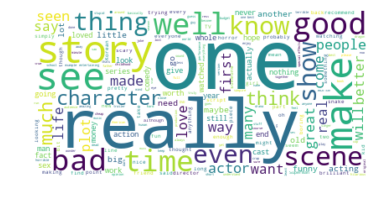

In [0]:
# Import the word cloud function 
from wordcloud import WordCloud 

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(descriptions)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

# 2. Numeric Features from Reviews

Imagine you are in the shoes of a company offering a variety of products. You want to know which of your products are bestsellers and most of all - why. We embark on step 1 of understanding the reviews of products, using a dataset with Amazon product reviews. To that end, we transform the text into a numeric form and consider a few complexities in the process.

### Bag-of-words

A bag-of-words is an approach to transform text to numeric form.

#### Your first BOW

In this exercise, you will apply a BOW to the annak list before moving on to a larger dataset in the next exercise.

In [0]:
# Import the required function
from sklearn.feature_extraction.text import CountVectorizer 

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Build the vectorizer and fit it
anna_vect = CountVectorizer()
anna_vect.fit(annak)

# Create the bow representation
anna_bow = anna_vect.transform(annak)

# Print the bag-of-words result 
print(anna_bow.toarray())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


#### BOW using product reviews

Your task is to build a BOW vocabulary, using the review column.

Remember that we can call the .get_feature_names() method on the vectorizer to obtain a list of all the vocabulary elements.


In [0]:
reviews = pd.read_csv("amazon_reviews_sample.csv", index_col=0)
print("review df dimension: ", reviews.shape)
reviews.head()

review df dimension:  (10000, 2)


,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


Now you will apply it to a sample of Amazon product reviews. The data has been imported for you and is called reviews. It contains two columns. The first one is called score and it is 0 when the review is negative, and 1 when it is positive. The second column is called review and it contains the text of the review that a customer wrote.



- Create a CountVectorizer object, specifying the maximum number of features.
- Fit the vectorizer.
- Transform the fitted vectorizer.
- Create a DataFrame where you transform the sparse matrix to a dense array and make sure to correctly specify the names of columns.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)
# Fit the vectorizer
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   about  after  all  also  am  an  ...  will  with  work  would  you  your
0      0      0    1     0   0   0  ...     0     1     0      2    0     1
1      0      0    0     0   0   0  ...     0     0     0      1    1     0
2      0      0    3     0   0   1  ...     0     0     1      1    2     0
3      0      0    0     0   0   0  ...     0     0     0      0    0     0
4      0      1    0     0   0   0  ...     0     0     0      0    3     1

[5 rows x 100 columns]


### Getting granular with n-grams


#### Specify token sequence length with BOW

- Build the vectorizer, specifying the token sequence length to be uni- and bigrams.
- Fit the vectorizer.
- Transform the fitted vectorizer.
- In the DataFrame, make sure to correctly specify the column names.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit(reviews.review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
# Transform the review column
X_review = vect.transform(reviews.review)
X_review

<10000x326726 sparse matrix of type '<class 'numpy.int64'>'
	with 1277605 stored elements in Compressed Sparse Row format>

In [0]:
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  00 and  00 apiece  00 as  ...  última  última parte  única  única opción
0   0       0          0      0  ...       0             0      0             0
1   0       0          0      0  ...       0             0      0             0
2   0       0          0      0  ...       0             0      0             0
3   0       0          0      0  ...       0             0      0             0
4   0       0          0      0  ...       0             0      0             0

[5 rows x 326726 columns]


#### Size of vocabulary of movies reviews

The three methods that you will use will transform the text column to new numeric columns, capturing the count of a word or a phrase in each review. Each method will ultimately result in building a different number of new features.

1. Using the movies dataset, limit the size of the vocabulary to 100.

In [0]:
movies = pd.read_csv("IMDB_sample.csv")
movies.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [0]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify size of vocabulary and fit
vect = CountVectorizer(max_features=100)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   about  after  all  also  an  and  ...  which  who  will  with  would  you
0      0      0    0     0   0    1  ...      0    0     0     1      1    0
1      0      0    3     1   1   11  ...      2    0     2     7      2    3
2      0      1    0     0   1    7  ...      0    0     0     2      0    0
3      0      0    0     0   2    1  ...      0    1     0     0      0    1
4      0      0    3     0   0    8  ...      1    0     0     2      0    0

[5 rows x 100 columns]


2. Using the movies dataset, limit the size of the vocabulary to include terms which occur in no more than 200 documents.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build and fit the vectorizer
vect = CountVectorizer(max_df=200)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000s  007  0080  ...  zx81  zy  zzzzzzzzzzzz  zzzzzzzzzzzzz  â½
0   0    0     0    0     0  ...     0   0             0              0   0
1   0    0     0    0     0  ...     0   0             0              0   0
2   0    0     0    0     0  ...     0   0             0              0   0
3   0    0     0    0     0  ...     0   0             0              0   0
4   0    0     0    0     0  ...     0   0             0              0   0

[5 rows x 45055 columns]


3. Using the movies dataset, limit the size of the vocabulary to ignore terms which occur in less than 50 documents.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build and fit the vectorizer
vect = CountVectorizer(min_df=50)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   000  10  100  11  12  13  ...  your  yourself  youth  zero  zombie  zombies
0    0   0    0   0   0   0  ...     0         0      0     0       0        1
1    0   1    0   0   0   0  ...     2         0      0     0       0        0
2    0   0    0   0   0   0  ...     0         0      0     0       0        0
3    0   0    0   0   0   0  ...     0         0      0     0       0        0
4    0   1    0   0   0   0  ...     0         0      0     0       0        0

[5 rows x 2552 columns]


#### BOW with n-grams and vocabulary size

In this exercise, you will practice building a bag-of-words once more, using the reviews dataset of Amazon product reviews. Your main task will be to limit the size of the vocabulary and specify the length of the token sequence.

- Import the vectorizer from sklearn.
- Build the vectorizer and make sure to specify the following parameters: the size of the vocabulary should be limited to 1000, include only bigrams, and ignore terms that appear in more than 500 documents.
- Fit the vectorizer to the review column.
- Create a DataFrame from the BOW representation.

In [0]:
# Import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify max features and fit
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(reviews.review)

# Transform the review
X_review = vect.transform(reviews.review)

# Create a DataFrame from the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   able to  about how  about it  ...  your money  your own  your time
0        0          0         0  ...           0         0          0
1        0          0         0  ...           0         0          0
2        0          0         0  ...           0         0          0
3        0          0         0  ...           0         0          0
4        0          0         0  ...           0         0          0

[5 rows x 1000 columns]


### Build new features from text


#### Tokenize a string from GoT

A first standard step when working with text is to tokenize it, in other words, split a bigger string into individual strings, which are usually single words (tokens).

In [0]:
GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

A string GoT has been created for you and it contains a quote from George R.R. Martin's Game of Thrones. Your task is to split it into individual tokens.

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
# Import the required function
from nltk import word_tokenize

# Transform the GoT string to word tokens
print(word_tokenize(GoT))

['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


#### Word tokens from the Avengers

Now that you have tokenized your first string, it is time to iterate over items of a list and tokenize them as well.

In [0]:
avengers = ["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it",
 'There was an idea to bring together a group of remarkable people, to see if we could become something more',
 "These guys come from legend, Captain. They're basically Gods."]

A list avengers has been created for you. It contains a few quotes from the Avengers movies. 

In [0]:
# Import the word tokenizing function
from nltk import word_tokenize

# Tokenize each item in the avengers 
tokens_avengers = [word_tokenize(item) for item in avengers]

print(tokens_avengers)

#### A feature for the length of a review

You task in this exercise is to create a new feature for the length of a review, using the familiar reviews dataset.

In [0]:
reviews[:5]

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


- Import the word tokenizing function from the required package.
- Apply the function to the review column of the reviews dataset.

In [0]:
# Import the needed packages
from nltk import word_tokenize

# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]

# Print out the first item of the word_tokens list
print(word_tokens[0])

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


- Iterate over the created word_tokens list.
- As you iterate, find the length of each item in the list and append it to the empty len_tokens list.
- Create a new feature n_words in the reviews for the length of the reviews.

In [0]:
# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 

In [0]:
reviews.head(5)

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


### Can you guess the language?



#### Identify the language of a string

In this exercise you will identify the language of a single string. A string called foreign has been created for you. 

In [0]:
foreign = 'La histoire rendu étai fidèle, excellent, et grand.'

In [0]:
! pip3 install langdetect

     |████████████████████████████████| 1.0MB 3.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=fa7f70986f4883ae86b9044734d3862b44d625bd4df66f967199394c254bb702
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [0]:
# Import the language detection function and package
from langdetect import detect_langs

# Detect the language of the foreign string
print(detect_langs(foreign))

[fr:0.999997436740112]


#### Detect language of a list of strings
Now you will detect the language of each item in a list.

In [0]:
sentences = ['La histoire rendu étai fidèle, excellent, et grand.',
 'Excelente muy recomendable.',
 'It had a leak from day one but the return and exchange process was very quick.']

A list called sentences has been created for you and it contains 3 sentences, each in a different language. 

In [0]:
from langdetect import detect_langs

languages = []

# Loop over the sentences in the list and detect their language
for sentence in range(len(sentences)):
    languages.append(detect_langs(sentences[sentence]))
    
print('The detected languages are: ', languages)

The detected languages are:  [[fr:0.9999970191252451], [es:0.9999948133640325], [en:0.9999975249011931]]


#### Language detection of product reviews
You will practice language detection on a small dataset called non_english_reviews. It is a sample of non-English reviews from the Amazon product reviews.

In [0]:
non_english_idx = [1249, 1259, 1260, 1261, 1639, 1745, 2316, 2486, 2760, 2903, 2908, 3318, 3694, 4820, 4914, 5720, 5875, 5901, 6234, 6631, 7078, 7307, 7888, 7983, 8018, 8340, 9265, 9422, 9624]

In [0]:
non_english_reviews = reviews.iloc[non_english_idx]
non_english_reviews.head()

,score,review,n_words
1249,1,Il grande ritorno!: E' dai tempi del tour di ...,171
1259,1,La reencarnación vista por un científico: El ...,37
1260,1,Excelente Libro / Amazing book!!: Este libro ...,114
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,50
1639,1,El libro mas completo que existe para nosotra...,40


You will iterate over the rows of the dataset, detecting the language of each row and appending it to an empty list. The list needs to be cleaned so that it only contains the language of the review such as 'en' for English instead of the regular output en:0.9987654.

Remember that the language detection function might detect more than one language and the first item in the returned list is the most likely candidate. Finally, you will assign the list to a new column.

In [0]:
from langdetect import detect_langs
languages = [] 

# Loop over the rows of the dataset and append  
for row in range(len(non_english_reviews)):
    languages.append(detect_langs(non_english_reviews.iloc[row, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
non_english_reviews['language'] = languages

print(non_english_reviews.head())

      score  ... language
1249      1  ...       it
1259      1  ...       es
1260      1  ...       es
1261      1  ...       es
1639      1  ...       es

[5 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


# 3. More on Numeric Vectors: Transforming Tweets

This chapter continues the process of understanding product reviews. We will cover additional complexities, especially when working with sentiment analysis data from social media platforms such as Twitter. We will also learn other ways to obtain numeric features from the text.

### Stop words


#### Word cloud of tweets


Your task in this exercise is to plot a word cloud using a sample of Twitter data, expressing customers' sentiments about airlines. 

In [0]:
text_tweet = '@SouthwestAir Another great flight &amp; crew, Las Vegas-Chicago #3397. Thanks! @USAirways thanks. @SouthwestAir got it squared away. Thank you. I had a man on the inside help me out! @JetBlue Not trying to make you look bad, on your website it says: "Due to weather in the Charleston, NC" Its actually in SC, not NC @USAirways thanks for giving away my seat. Another fine job! http://t.co/r7ibqr4CYd @USAirways your pple did a great job w the madness however some of your systems need help. I appreciate the hard work &amp; the push to b better @SouthwestAir I got a flight at 11:55am on Thursday but looking for something tomorrow, anything available? @SouthwestAir thanks I think we\'ve got it figured out @SouthwestAir Thanks for the response. Was able to get my situation resolved. Not a fan of Mother Nature today. :) @USAirways @AmericanAir First Class all the way!!💺✈️ Headed to @portlandjetport http://t.co/kDMq0jps02 @SouthwestAir - just talking to customer service @united makes me appreciate you even more!  They could learn so much from you! @SouthwestAir Thank you so much for stepping up your game and making my day after night of elevator music. Much appreciated. @JetBlue Btw, thanks for responding quickly!! @SouthwestAir Sent. Thanks VP! @USAirways ok thank you we were told ground delay due to snow. @JetBlue Gotcha... thanks for the update. I\'m ready to go whenever you are :) Enjoy your evening. @USAirways Will do. I appreciate the response. @SouthwestAir Awwweesssooomee! @SouthwestAir Black History Commercial is really sweet. Well done. @SouthwestAir though I work for another major airline,  I LOVE your Black history month commercial. I Thank you. @SouthwestAir Hi! I just saw a Black History month commercial on TV &amp; Im excited! In support of this month,will you all grant me 1 free trip @SouthwestAir thanks for the drink tickets hook up! Can\'t wait for my first international flight with you to NAS! #pumped @SouthwestAir Yeah, we figured it out.  Thanks. @SouthwestAir On my flight today from RSW to GRR I was able to snag a free SW Agent to check for me. It looks like we are (finally) all set. @USAirways  thank you! Glad to be heading home! Great people at your call center! @USAirways thx 4 replying. After trying 2 get thru many times, &amp; v-mail or people hanging up on, us we talked 2 tech...cont\'d @USAirways HA!  You\'re fun. @SouthwestAir Hey yea I got thru...everything is good now (well, in 7-10 days when the voucher goes through)  Appreciate it! @USAirways flying high thanks! @SouthwestAir thanks for your assistance..you guys ROCK!!💯 @SouthwestAir all good now. Going to make it to Boston on time. I\'m actually on your wifi right now @USAirways Thanks. It would be better from the gate agent at C14 in Charlotte boarding flight 1791. @SouthwestAir Glad it was finally resolved too. Too bad I can\'t get a free voucher to go with mine so I can have a friend travel next time! @JetBlue I would prefer a similar picture but full of E190 tails, but great shot! @USAirways thanks @SouthwestAir much respect! @SouthwestAir Thank you!  #thankful #feelingtheluv @SouthwestAir I got it added thank you! :) @SouthwestAir Great, thank you. Best of luck dealing with this horrible winter. @southwestair #fattuesday Great job celebrating #mardigras today at Atlanta Airport. Another reason I\'m nuts for you! http://t.co/8WBzOrRn3C @SouthwestAir No worries at all!!! I would rather be safe on the ground than take any chances. Yes! Tomorrow AM if BNA reopens ☺️ @JetBlue Well, thankfully they\'ve got a nice food court here...When will an update be posted? @usairways Thanks to Kevin and team at F38ish at PHL for some great service recovery tonight. Appreciate it. @SouthwestAir About time...and just in time for my next flight Thursday. @SouthwestAir Thank you. I know ya\'ll can\'t control the weather. I appreciate ya\'ll working to get my flight rebooked the last two days. @SouthwestAir Thanks. I\'ll keep checking. I\'m trying to book our first Disney World vacation. @USAirways Marsha M. at Myrtle Beach is the greatest! She deserves all the respect and praise there is! #ThankYouForEverything @USAirways thanks to Betty working gate at ILM and lovely gate agents here in CLT helping me get home 2 Phx tonight instead of tomorrow @SouthwestAir El Paso deals....May❤❤❤😍🌏 @SouthwestAir really appreciate the follow up, I always fly with y\'all for a reason! @SouthwestAir Awesome - thanks! Despite Mother Nature\'s best efforts, @SouthwestAir\'s good-humored folks got us home safely in an area heavily affected by winter storms. @SouthwestAir I did. Thank you. @SouthwestAir Thanks for taking care of me Today!  Michele rocked the customer service! Gate 25 HOU @USAirways thanks for your help! I left a message for DCA lost and found. Fingers crossed we find it! @JetBlue Worked now, ty @SouthwestAir thank you :-) @SouthwestAir All pieces were found and safely delivered to our home this afternoon. @SouthwestAir no worries. You\'re doing the best u can. Already Cancelled Flighted my biz trip. Still $LUV you! -RR 1079871763 @USAirways @AmericanAir @SVLLINDIA provides you the best logistics experience for people all over India.\n#Mumbai #Surat #NaviMumbai @SouthwestAir no worries. We got thru eventually. I was just curious. Best of luck to you dealing with the weather! @JetBlue wouldn\'t mind paying for the snacks but no $ for tix :-) Great job guys! @JetBlue Thanks for the quick reply! Just wanted to make sure it wasn\'t just my account :) @JetBlue I did see that! Working on picking up a trip or two as we type. @JetBlue what are the chances of actually flying out of Charleston today?? Cold, rainy weather in the south of all places... @USAirways she also appreciated having her very own hashtag! :) #lucycat @JetBlue awesome, thanks! on hold now. @JetBlue flight 117. proud to fly Jet Blue! @JetBlue thanks great recap. I wouldn\'t have been able to sleep!  I was nervous the bad guy was getting away. 😉 @JetBlue great. .@USAirways thanks! “@JetBlue: @jannasaurusrex Thanks for the kind words, Janna! #WeAppreciateYou #TrueBlue” and now I\'M feeling like a boss #jetbluefame @JetBlue boarding the back of the airplane first. Like a boss. #sosmart #jetblue #frequentflyerappreciates #alsoyayforsnacks @JetBlue sooo earlier i said i couldnt fly with you for my school trip but now i can! 😏 @USAirways Thank you, busy times. @JetBlue thank you for the information. @JetBlue why are you always so amazing! #jetblue #trueblue http://t.co/iIMTJxcvLG @USAirways thanks :) @JetBlue Thanks. I\'m finding lower fares already on other carriers with direct flights. July 8 - 13. @JetBlue incredible PR team. 👏👏👏👏 @JetBlue Was nice to see your Veterans Advantage Program at the gate on Sunday @ MCO.Keep up the good work at  JetBlue @JetBlue sounds great! Thank you!! :) @eatgregeat WOW~Thx for thinking of us, Greg! Heard #SOBEWFF was amazing! We\'ve heard the same about @JetBlue (ps thx for the info) #TeamNKH @JetBlue it will be glowing. Your crew and your aircraft sparkled. You guys know about @nokidhungry right? Might be a good partnership:) @JetBlue you all are the best #flyfi # ondemand #leatherseats #hipunis #legroom @JetBlue Longing to look into the blue eyes. #firstlove @JetBlue you don\'t need to cut services, charge more and give a better flying experience. That\'s why I use jet blue in the first place @JetBlue glad you like it. Feel free to steal it. @JetBlue your blue helped bring out the color of my eyes. And I promise I didn\'t eat all the free snacks. “@JetBlue: @Ruth_Slobodin Why not? We\'d sure love to see you, Ruth! #JustDoIt #YouKnowYouWantTo ;)” you know me too well 💘 @JetBlue great will do once I land in JFK @USAirways thanks for reaching out to me.  My Gold Div no. 2k424j0. My Flights were changed under Confirmation # DNX58V. @JetBlue here you go... Your napkins pretty much say it all! http://t.co/OxY1Jnpjm3 @USAirways yes and our flight attendant (who is wonderful btw) secured the tray table so it\'s not flailing about. http://t.co/JhXWMuTx4G @JetBlue A320 pulling into the gate as the sunrises here at @BostonLogan this morning #jetbluesofly #jetblue #airbus http://t.co/JGdu5us8Dz @USAirways thanks for seating me next to 2 hot athletes. This flight is significantly better now! @USAirways Thank you!!! On our way to get her bag now - thanks to having that number 😊 @JetBlue Thx for the quick response .... yep I tried- but it can\'t find the flight when I Input the Confirmation # @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @JetBlue Wish Everyone felt like you @JetBlue thanks to you customers like me stay loyal. From check in to landing. @SouthwestAir thanks!! We will see what happens!! @JetBlue haha. TY. Do you know what time that lane opens at Logan? @USAirways YOU ARE AMAZING!!! FOLLOW ME BACK, PLEASE!!!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @JetBlue I like " Follow @JetBlue " @SouthwestAir Karen with customer service was very helpful. Thank you for providing one bright spot in a frustrating situation. @SouthwestAir you guys are awesome... #dontchangeathing #luv @SouthwestAir Finally! Integration w/ passbook is a great Valentine gift - better then chocoLate Flight. You do heart me. @SouthwestAir about time! Thank you! @SouthwestAir is having a sale! I\'m delighted! @USAirways You all work hard at making sure things flow smoothly. Keeping positive. @USAirways we are boarding now but have yet to depart.  Thanks for the response. @USAirways I totally understand the weather. Just frustrated. Thanks! @SouthwestAir LUV Ya Too!!!!  I will sing a song for y\'all when I finally get on that plane back to Nashville!!! #LOVESOUTHWESTAIR @SouthwestAir Thanks a ton! @SouthwestAir thank you, someone finally answered and was able to change my flight that was Cancelled Flighted bc of ice. Thank you for response @USAirways Thx to gate agt John Pascucci for finding us a flight from CLT to PVD after our original one was Cancelled Flightled http://t.co/YiwLhQhZgp @SouthwestAir always when I fly SW. #loyalRRmember @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @USAirways surprisingly quick response time by you and them. Thanks! @SouthwestAir yes. Thank you. Oct 25-oct 31 @USAirways still not in the air for deicing of plane. I\'ll miss connect but customer service was helpful.I\'m hoping to catch the next flight @JetBlue FYI, I\'m onboard #616 comfortably travelling to JFK, seat was no problem as you said. Thanks for making flying more civilized! @SouthwestAir and thanks! @SouthwestAir its all good. flight eventually took off, and landed safely. oh, and I got the free cup o wine. thx @JetBlue Yesterday on my way from EWR to FLL just after take-off. :)\n#wheelsup #JetBlueSoFly http://t.co/9xkiy0Kq2j @SouthwestAir nice work on the update! @SouthwestAir thanks do yall expect to be operational tomorrow out of Nashville? @JetBlue sure is 💙 @USAirways thanks so much! @SouthwestAir Beautiful, thanks a ton! @JetBlue after my second call to customer service and the fifth person I talked to, an amazing rep fixed it in about 5 mins! :) #persistence @JetBlue thanks so much! @USAirways thanks!  Can you help remind the agents it\'s ok?  Ps. Heard rumors of a streaming wifi TV/movie service you might be installing @SouthwestAir finally! @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @SouthwestAir  Thank you. @JetBlue That makes two of us! Lol #Blushing @JetBlue Happy Anniversary!! It\'s hard to believe you\'re 15!! You\'re so young! @JetBlue #1680 Super smooth flight and landing. Nicely done. @SouthwestAir Great job!! Looking forward to my next trip being able to use this new feature! @SouthwestAir Great job with the Passbook integration! It’ll really help streamline the commute to San Fran! 😊☕📲✈ .@SouthwestAir you\'ve got a mess here at DTW but your staff is doing great. @SouthwestAir + @twitter  = outstanding customer service!  Thank you! @SouthwestAir aww thanks!! Other than that, love it! @SouthwestAir thank you for your help resolving my problem Shannon ROCKS - even though Rhonda didn\'t !! @SouthwestAir can\'t wait! Thanks for the response!❤️ @SouthwestAir - I just had a great experience with your customer service team. Thank you! #LuvSW A-list @SouthwestAir @ PIT- Gate A1! Big shout out to the lady trying to track him down! @SouthwestAir luckily, the people working the BSO at Chicago Midway have been very attentive and found our bags in Punta Cana. @SouthwestAir awesome. thank you! @USAirways thanks @USAirways - done :) @USAirways thank you. We filled out a claim and hope to have the bags tomorrow. @SouthwestAir @Imaginedragons @beatsmusic well timed tweet, just boarded and will be listening on my way home! @SouthwestAir that\'s why I fly y\'all, that personalized service @SouthwestAir @Imaginedragons @beatsmusic I\'d love to hear them live at @VelourLive @velourlive this saturday! #destinationdragons @USAirways Will do :) @SouthwestAir So far so good! http://t.co/16c9ex79Rk @USAirways please give Tara G a pat on the back and praise.  She was very very helpful.  She is at PHL member lounge @USAirways  thanks I hope I get to my destination @SouthwestAir thx - fingers crossed they are found. Lmfaooo “@JetBlue: Our fleet\'s on fleek. http://t.co/1G9RnmYUQe” @USAirways thanks for the reply, hoping everything is cleared up in Charlotte by Monday @USAirways will do. Hoping for a voucher for a future flight #Optimistic @SouthwestAir Whoa. Thanks and that\'s what I wanted to hear! Early flight coming up. Thanks for the reply. @SouthwestAir is there a way to know who checked my bag on the curb? She was awesome!!! And want to be sure she gets a high five! @SouthwestAir thank you for handling this for me. Glad Southwest cares about what it\'s flyers think! @SouthwestAir :arrived in San Juan early. Thanks for a great flight. LUV u! @SouthwestAir thanks for the follow up.  I appreciate it. @JetBlue lolol @s_myc88 @JetBlue shows us their sense of humor with these tongue-in-cheek flight etiquette videos: http://t.co/GGuAA1JvDF @SouthwestAir @karajusto OK we will! Thank you!!! @usairways #crew keeping safety top of mind in CLT. http://t.co/a0YoSJHZMc @JetBlue true. Maybe. Wish I had expedited security haha @SouthwestAir @taylormdowns We share that value in common. :) @SouthwestAir JUST GAVE ME TICKETS TO SEE @Imaginedragons  AT @VelourLive ON SATURDAY. I CAN\'T EVEN RIGHT NOW HAHA. THANK YOU!!!! @SouthwestAir once or twice a year. Hard to get vacation time from work sometimes. But love flying with you guys! @SouthwestAir @love_dragonss lol I\'m sorry I\'m just seeing this now but LAUREN OH MY GOD AHHHH Why “@JetBlue: Our fleet\'s on fleek. http://t.co/a7NvbJ8ipx” @SouthwestAir amazing service by your SW stewardesses! From den to Cun and from CUN to Atl and atl to lax. Thank u! @SouthwestAir thanks for the follow up. So glad to get my bag back. @SouthwestAir love..luv the addition of the passbook option. Power Moves RT @JetBlue: Our fleet\'s on fleek. http://t.co/t9s68korSN Bingo! “@SouthwestAir: Thank you for bringing this to our attention. We\'ll be happy to reach out to Noah so we can make this right. ^MR” @USAirways captain on flight 1712 from PHX-PHL at 3:55 tonight was hilarious. "Greetings from the pointy end of the airplane" haha thanks! @SouthwestAir just had a great flight #4223 with Damion! He was the best #damionflight4223 @SouthwestAir woohoo that just made my day. I looked and just couldn\'t find that, thank you! @SouthwestAir One heck of an airline http://t.co/CyoOnZfTdC @AmericanAir I might look into that. My wife travels much more than I do. Could we both use the membership? @AmericanAir Great, thanks. Followed. @AmericanAir This is exactly why ill be flying AA from @Dulles_Airport to Dallas! Only airline I trust! @AmericanAir got another flight. Thanks you @SouthwestAir y\'all the real MVP with these prices... @SouthwestAir Thx Ops Agt Rich Westagard n Flight Att. Nancy @ DEN Airport.Held flight 1027 n even saved seat 4 Bus Select #CustomersFirst! @SouthwestAir Thank you for having flights going out of Nashville! You guys Rock! #DisneyPrincessHalfMarathon #girlsweekend #bffs @AmericanAir I don\'t think you should help him at all based on his behavior. The voucher and cot seem like enough lol 😃 @SouthwestAir DM sent! Thanks so much for responding! Your response was so timely, I missed it! @AmericanAir got back eventually! Was a rollercoaster. Once I got to the airport &amp; got to speak to someone things got fixed very quick. @SouthwestAir I love you guys! Had to take a few other airlines this week...makes me love and appreciate y\'all so much more! #onlywaytofly Lovely! RT @JetBlue: Our fleet’s on fleek. http://t.co/Hi6Fl1AX9E I appreciate the reply. RT @SouthwestAir: @luxclark We’re so sorry to keep you waiting, Laura. An Agent will be with you shortly...^CB @AmericanAir yes yes yes,so glad to be headed home! @AmericanAir thanks!! @AmericanAir thanks keep me updated just hope I make either of my connections to Killeen Tx @SouthwestAir the new logo is going to look amazing on the airplanes “@JetBlue: Our fleet\'s on fleek. http://t.co/3kVkd8yRxa” + lol wow @SouthwestAir love bridesmaid dancing Can\'t wait for you to fly into puerto Vallarta and kick united ass! @AmericanAir thanks @SouthwestAir I ❤️ you! The only airline that understands us military families and our unpredictable changes. Pound it 👊 "LOL you guys are so on it" - me, had this been 4 months ago...“@JetBlue: Our fleet\'s on fleek. http://t.co/LYcARlTFHl” @JetBlue wow, keeping up with the times... @SouthwestAir filing it now. Thank you for your response. @SouthwestAir thanks so much for making my night 😀 cannot wait for my trip next week! http://t.co/NbZ45jCd1r @SouthwestAir thank u for not leaving me \n@me nice job running thru the airport to catch your connecting flight @southwestair thanks for taking it up a notch!! leinenkugels #craftbeer #goodflight @ Norfolk… http://t.co/TgSLjjN6g0 @SouthwestAir Thanks for replying, I sen\'t my conf #! I love aviation and Southwest and all I wanted for my 18th was to fly SWA for the day! @SouthwestAir, I really appreciate you all\'s #BHM commercial that aired today during @BET\'s #BookofNegroes @USAirways — I had exceptional service on flight #403 from IND to PHX!! @AmericanAir Believe me, I understand. Flight #2955. Was originally booked for Sunday. Flight was Cancelled Flighted and rescheduled for today. @SouthwestAir you guys are so clever 😃 http://t.co/qn5odUGFqK @SouthwestAir - Great flight from Phoenix to Dallas tonight!Great service and ON TIME! Makes @timieyancey very happy! http://t.co/TkVCMhbPim @SouthwestAir Fantastic! Thank you! I always look forward to JB RT @JetBlue: @bostongarden :) Looking forward to welcoming you onboard! 💙 Looking forward to using Passbook when I fly  @SouthwestAir in a few weeks! @AmericanAir thank you! @JetBlue toss this ticket...it\'s great PR and I\'m sure every college student following me will be willing to rock out wit too 👀👀 @SouthwestAir can i get tiks for #DestinationDragons omg id love to! Plz 😱❤️im dying @southwestair Amazing view on the approach to LAX tonight. http://t.co/a68d5fULmH @SouthwestAir thanks, already subscribe and have a RR Account. Had received a promo code last month but has since expired. Any new offers? @SouthwestAir thank you kindly. @USAirways Fabulous - thank you so much! Looking forward to taking to the skies with you! :) @SouthwestAir THANK YOU for finally making your boarding passes work with passbook @USAirways thanks! @SouthwestAir de-icing is important! @JetBlue Thanks so much for talking to me! The article about #Twitter chats came out great! http://t.co/rKorHvR9z1 #contentmarketing @USAirways YOU ARE THE BEST AIRWAYS! Follow me please!!!!!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @SouthwestAir for the win as always- saved my day and got me on a direct to Orlando. 🎉🎉🎉 @SouthwestAir just did last night. Thanks for following up. :) @SouthwestAir thanks for getting me back to Nashville. Big thanks to the pilots on the 6:15 out of Baltimore. Flying in snow landing on ice. @USAirways YOU ARE AMAZING!!! YOU ARE THE BEST!!! FOLLOW ME PLEASE AND I FOLLOW YOU BACK;)🙏🙏🙏✌️😉) @SouthwestAir Oh no worries NL, no disappointments here. Better to have NO lounges than like #Delta who has them but does disappoint! @SouthwestAir @DeltaPoints hey at least you guys are honest with your customers unlike @Delta @SouthwestAir Thanks for the info! Have a good day. @USAirways Sending thanks to employee Freddie in PHL Admiral Club A East for allowing me to give a day pass to my sibling stuck there today. @SouthwestAir Landed in Nashville! Thanks for taking care of us! http://t.co/RYXbPLgMnK @SouthwestAir Thank you for your time! @SouthwestAir Thank you! @USAirways that\'s why u guys are my #1 choice. @USAirways YOU ARE AMAZING!!! YOU ARE THE BEST!!! FOLLOW ME PLEASE 🙏🙏🙏😢😢😢🙏🙏🙏 @USAirways Thank you. And thanks for being so accommodating. @JetBlue: So excited to hear about your move towards international travel from Long Beach Airport! @SouthwestAir I love and appreciate the fact that you guys rarely Cancelled Flight flights and are on time, but I need a Cancelled Flightlation this time. 🙏 @SouthwestAir thanks for your excellent response time and assistance! All set :) @SouthwestAir - total win!! Happy 7th bday on intercom, chocoLate Flight kisses, and a chance to hand out snacks.Thank you. http://t.co/NKloZcNtto @SouthwestAir big thanks to your team. family emerg, same day ticket, experience was excellent. 1st time flying with yall, not my last! @SouthwestAir has the best customer service! @USAirways with the weather mess in the South, I missed my connection in CLT. Impressed though with the Cust Serv phone reps today. @southwestair Flight 4146 Phi to Den was staffed by a great crew. #freecomedyshow #newlifetimecustomer So relieved I\'m flying @JetBlue after listening to everyone at the neighboring gate bitch about Spirit. My airline\'s better than yours. “@JetBlue: Our fleet\'s on fleek. http://t.co/g12sn5qsqZ”- no... Yall better than this @USAirways thanks. 😒 @SouthwestAir hot stewardess flipped me off @USAirways Frustrating days!No flights home, changed airlines. Thank you PHL USAirway employees &amp; @united for help getting me back to IAH. @SouthwestAir Once again, I was able to change my flight without any fees... oh and the two free checked bags.  Best airline ever. @SouthwestAir you are the #Official airlines of #DivadaPouch aka #ThePoopQueen http://t.co/XXY2d2iMnP @SouthwestAir @JohnWayneAir Thank you both very much!! @USAirways Flight # 604. Thanks. @JetBlue We had 2 great flights into and out of the Bahamas, even during the bad weather in the northeast, thanks for the great service!!! @SouthwestAir neveind, it\'s been found and on its way. Thanks for making the process so painless @USAirways YOU ARE THE BEST AIRWAYS!!!!!!!!!! FOLLOW ME BACK, PLEASE 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😢😢😢😢😢😢😢😢🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @SouthwestAir A wonderfully nice agent in Austin helped us out. Wish I remembered her name to give proper kudos. @SouthwestAir Got it covered. Thanks! @SouthwestAir Awesome!!! Sending now. @USAirways nice touch with using my first name.  Very intimate.  I\'ll be filing a claim soon to be reimbursed. Have a us airways day! @USAirways on Sunday! Can\'t wait! See you then @JetBlue loved the service from the staff at Newark today. \n\nGood service goes along way.\n\nI appreciate your preciation  \n\nNj ✈️Tampa \n\n🔵🔵🔵 @USAirways Thank you so much its been a very stressful day “@SouthwestAir: @kirkwoodtiger Hmmm... how does the Caribbean sound? https://t.co/AAY5avg99b ^LD” WARM THANKS! @USAirways landed safely everything worked out. @southwestair#SWADiversity We are ready to be inspired! http://t.co/S3EsW5AgUm @usairways 4 flights in 48hrs &amp; I\'ve had the same flight attendant for 3 of those flights. Freaky coincidence! Plus side she\'s great. :) @USAirways Absolutely!! The staff was amazing!! @USAirways Haha - that will indeed be a great day! @SouthwestAir allows you to change a flight once for no fee, yay! I will always book flights with them. @AmericanAir changes you $200 @SouthwestAir I\'m really craving your pretzels, please send me some. @SouthwestAir just added #passbook support to their iOS application! Finally, I get to add them to my collection. http://t.co/lEdNoCdQee @USAirways thank you! I tried that and they said they didn\'t have it. Anywhere else to try? @USAirways thank you for fixing my 5 hour delay. @USAirways customer service at its finest Don\'t show these to Larry Fedora. RT @JetBlue: Our fleet\'s on fleek. http://t.co/qqlzk2jkzR @southwestair Great job celebrating #MardiGras2015 .  You own the industry . Another reason I\'m nuts for you! http://t.co/8WBzOrRn3C @SouthwestAir - Apology accepted! #customerserviceWIN #itravelalot http://t.co/z5znfwkKWP @SouthwestAir LOVE your TV ad with the girl dancing. Makes me laugh every time, AND now I want to take a trip! :-) @SouthwestAir Yes! I did and the bags came straight to my hotel. Thank you ...you guys rock! @SouthwestAir thank you!!! @USAirways shout out to the pilots and FC attendant(Eliz) of US 673. Super strong crosswinds during landing. Eliz did a super job throughout @SouthwestAir pleasantly surprised to be boarding my flight on time this morning at @Fly_Nashville. Good job! @USAirways ice cream up front! Solid @SouthwestAir OH MY GOSH SERIOUSLY?! you just made my day, week, year!!! No one will appreciate this more than me!!! @USAirways after missing my flight and reFlight Booking Problems 2x, I just walked onto another flight and my phone was still on the seat!! @USAirways on time today and from PHL! Nice work! #ThereIsAFirstForEverything @USAirways thanks Travis at PHL A East checkin for knowing baggage policies. Skis &amp; boots count as 1. Teach your mgr who didn\'t know @USAirways finally rectified my flight situation! Thanks again @USAirways how about a drink voucher for the next flight?? #winkwink @SouthwestAir Thank you thank you thank you @SouthwestAir @love_dragonss oh my god LAUREN OH MY GOD OH MY GOD @SouthwestAir @love_dragonss holy fuckinf shit @SouthwestAir @love_dragonss LAUREN OMG BEST AIRLINE EVER @JetBlue you guys operate a world class company and for that I thank you @SouthwestAir you\'re the best @SouthwestAir @love_dragonss LAUREN OMG IM DEAD IM SO SO HAPPY FOR YOU YES YES @SouthwestAir @love_dragonss LAUREN IM SCREAMING @SouthwestAir @love_dragonss oh my gosh @USAirways right on. Up. Up &amp; away ✈️🌞 @JetBlue Thank you guys! Brilliant customer service @USAirways FA attendant on 4553 PHL to PWM tonight was fab!  An asset to your team.  From 1F. Have a great night team! @SouthwestAir had a great LA flight with Clarence and Frank! Those 2 guys are a hoot! 😜😂 thanks @AmericanAir thanks, I\'ll look forward to the response. @united New Apple crâpe, amazing! Live from UA1207. Really nice crew too.  #AmericanAir has biscuits, UA needs them 2 http://t.co/gZ9GqDT7Jj @JetBlue thanks for the info... Figured that was the case. Hopefully my new hashtag will change that ;) #ABCLetJetBlueStreamFeed @united Thank you for the new Club at O\'Hare. Very comfortable. You made the difficult weather days proficient and enjoyable. @AmericanAir thank you, truly appreciate the help, just sent a DM @JetBlue saved the day:) @Expedia lost a costumer #jetblue #makingthingseasy #feelbetter @united I appreciate the follow up. @united @jsumiyasu I am thankful to the  United ground staff who put me in the last seat on the last flight out. Home Late Flight is still home! @united no worries about the tweets. We all should do what we can to make sure we, as in your tag line, "Fly the Friendly Skies." @united @FlyANA_official pleasantly surprised to find ANA has made major upgrades on their transpacific route in flights, planes and service @AmericanAir Thank you so much. @JetBlue yes! Terra blue chips were my favorite. :) @JetBlue I DM\'d my confirmation code... Thanks again for your help! Mommy, daddy, and kids appreciate it! @united Brandi Zabsonre in Denver deserves a raise for bringing delight into a terrible travel situation. big ups http://t.co/TK3aOpdtSQ Cool! "@JetBlue: @hgeronemus We are 60% there and anticipate completing installation on all our A320\'s this year. http://t.co/sGckBopATA” @JetBlue Love you guys sooooooo much. Ridiculously appreciated! A+ service! @united thankful for great service in Newark. Seats fixed and I was seated with my daughter! Fab landing in Fort Myers! @AmericanAir #AATeam thanks for working in very rigorous weather conditions for all @JetBlue you are officially my favorite, thank you for the wonderful service at JFK @SouthwestAir thank you so much completely made things right! @JetBlue thanks!! @SouthwestAir round-trip tickets just arrived for our auction at the Post-Masters Invitational! Thanks Southwest! http://t.co/mRfBjtePef @SouthwestAir Thanks so much! @SouthwestAir  THANK YOU for your awesome flights. Sweetheart got screwed on @FlyFrontier, managed to scramble and get a SW plane today. !!! @JetBlue thanks! I\'ll do it. @JetBlue @FerrisSalameh Love JetBlue\'s speedy Twitter customer service. @SouthwestAir  I USED to always fly Southwest. @SouthwestAir weather bc of system outage. Hopefully everything goes smoothly now. Thank you for follow up @JetBlue thanks! @SouthwestAir I managed to get sorted out over the phone. Good luck dealing with the snow in Texas! @JetBlue thank you so much for your effort @AmericanAir Delaney and Shawn at DFW showed exceptional customer service today. Will happily choose AA whenever possible now! Thank you! @SouthwestAir never mind, I moved my flight to tomorrow. Thanks for the help! @JetBlue thanks for letting us know. Hoping for no more delays! @SouthwestAir  thanks Southwest for saving our trip. my sweetheart isn\'t going to miss seeing #AltonBrownLive thanks to y\'all! #SOhappy @USAirways thank you @AmericanAir thanks... I finally got through this afternoon.  :) @SouthwestAir thx. Make it right. Help Meagan Fouty Brancato fl#2771 dfw gate 4 preboard w/kids - b4 group A please. Please. @SouthwestAir love them! Always get the best deals! @United WiFi onboard 737-800 far superior in pricing and performance (user-perceived bandwidth and Late Flightncy) to recent @GoGo experiences. @JetBlue Airways Corporation (NASDAQ:JBLU) Reaches on New High Range ... - StreetWise Report http://t.co/C7tpdKqULM @united stay warm - I will be passing through Chicago next week @AmericanAir Well, you guys are totally kicking a million pounds of ass. Bar none, the best SM team in the airline industry in my opinion. @JetBlue Please come to Indianapolis! @united thank you! I wish the lady in Little Rock had told me that in the morning when I asked her @JetBlue okay thanks. Hope to be flying with you guys soon! @JetBlue he loved the #natural #beefjerky snacks😉 @JetBlue thanks for your reply. It was flight 1572. @JetBlue who is he I must send a note!!! Too good for words! @united You might be dealing with frustrated passenegers. hope you all have a great day :) thank you very much for an amazing airline :) @JetBlue - loving Capt Joe on our flight from BOS to SFO #633. This should be fun! @united JT thanks for your help I’ll complete the form once we are back home @AmericanAir thanks @JetBlue It was fabulous! Very pleased. @AmericanAir THANK YOU!!! 👍👍👍👍👍 @JetBlue u the real MVP http://t.co/jWL26G6lRw @JetBlue No worries. Time flew in the terminal and now we\'re taking off. Thanks again! @united Thanks! @united Elizabeth at Washington Dulles just hooked me up with a new connecting flight at my gate! I\'m super pleased! @united Thank you for the speedy response! I figured it may be something of that nature. You guys and your "fine print," haha @united holy high speed internet batman!  Speeds at United Club at IAD are insanely fast!  Thanks @AmericanAir Thank you!!!! I will be there to pick her up on time. @JetBlue - looking forward to it when we finally take off. @JetBlue thanks... @united doing a good thing, holding flight for a few for 11 peeps on Late Flight connecting flight. We\'ll still make destination on time @AmericanAir thank you for the assistance @united on a good note, the 2 employees I encountered @ Newark were fabulous. I was very Late Flight for my connecting flight and they got me on!!! @united Thanks, ^KP. Please also mention the Quiche breakfast and Tandoori chicken dinner entrees and accompaniments are truly First Class. @USAirways connection made. Thanks again this week. #daddyshome @united looks like I\'m settled in to where I\'m going.  Thx. Is expiring the @united offer to buy or transfer #United #MileagePlus miles with discount? Many offers during a year http://t.co/6tz6imqZlG @AmericanAir yes, it says it should be deliver within 6 hours after pick up line. @united took this picture on Thursday. #awesome http://t.co/IVGpZSjtkW @AmericanAir thanks. Delivery status?? @united Sure did! Only waited about 15min. Yay! @JetBlue thanks! @USAirways yes I did thank you! They did a great job turning the flight in jan ! @united thank you! 😊 @AmericanAir Hey Becky Piela at the Orange County airport has been really kind and helpful with rescheduling our flight! @united done just now, thanks. @united Thanks for the timely service &amp; great staff getting my wife and me to and from Cancun this past week for our honeymoon. @AmericanAir Chicago seen from seat 6A, AA 1620. So far a great ride! On to PDX! http://t.co/X4rsvAGIjN @SouthwestAir tv stream means I get to spend my flight watching 1999 and 2011 Women\'s World Cup Finals. #throwback #bestflightever @JetBlue thank you @SouthwestAir @heavenlychc9 I\'d at least enjoy a free cocktail...or two. @SouthwestAir beyond ready @SouthwestAir thanks for the great customer service today! 👍👌 @SouthwestAir happy to enter your sweepstakes again #nutsaboutsouthwest @JetBlue ok thank you for the quick response JetBlue still the best comp @JetBlue im in a session presented by one of your beloved travelers, @paulgordonbrown,I see why you love him so much http://t.co/vv8cFyhKVb @SouthwestAir thankyou :))❤️ @SouthwestAir crew on flight 206 is awesome! Tell them I sent this tweet and maybe they will give me free wifi... #canthurtasking @SouthwestAir Katie, Gate C47, Denver International, fantastic customer service helping me and 2 new flyers; thx for amazing staff! @JetBlue oh definitely. I kind of only fly JetBlue. @JetBlue thanks for getting me to Orlando early #happiness @SouthwestAir /I really love your customer service Lou Ann in Phx rocks. Thanks SW. #be Ourguest @SouthwestAir Thanks for two smooth, safe and fast flights! #Boston #Houston #LUVSWA http://t.co/elhxUV0Uj1 @SouthwestAir thanks! @SouthwestAir great day in the air. http://t.co/YNc2ZUt4zz @SouthwestAir in flight wifi + @TMobile wifi calling makes for the best combination. Who doesn\'t love texting 40,000 feet in the air :D @USAirways - Check-in staff at PHX are awesome! Great traffic control for general boarding. @SouthwestAir What an awesome flight Dallas 2 NY. Virgin America refused bc of my child\'s peanut allergy but u guys didn\'t. Thanks! 👍😊 @AmericanAir no kidding! Gonna take some beating on the apron... And there are some good lookin\' planes out there! @USAirways   Just talked to reservation. Must congratulation to them. Very friendly.  Good for usair. The ONLY airline we fly. @SouthwestAir is my favorite airlines. I\'ve never had issues with them. Plus there crew is entertaining. @SouthwestAir your flight attendants are really funny!! The sass is giving me life!!! 😂 @AmericanAir thanks for following up- it finally worked!! Fingers crossed the new flight works. @JetBlue Kudos to JetBlue social media team for jumping in an helping me out during the last snow storm while web site was down..Thanks!! @AmericanAir Was not on board you today just watched report unfold on Twitter but still am very proud! @JetBlue thanks so much for your condolences and quick response. It is very much appreciated @SouthwestAir thanks for the quick response. Should I call daily it wait the 5 days. @JetBlue Thank you Alicia!  #ExceptionalService @SouthwestAir thank you. Great customer service so far. Accidents happen I understand. Hopefully everything works out. @SouthwestAir 2/22-MDW 2 SAN flt 1687 attendant Melissa was awesome! Fast, smiling, great. After weather Cancelled Flight day b4, it was welcome @SouthwestAir The Fact That U See Black History Month 12 Months A Year Is Honorable! We WILL BE An Economic Base For Corp. Like U In Future! @SouthwestAir eyes next steps for improving #inflight #Wifi - Runway Girl http://t.co/h46HT1Oz40 @SouthwestAir Thank you Thank you Thank you!!! My last attempt to win #DestinationDragons tickets was a success! I could not be happier!! :) @SouthwestAir oh no worries. Just have never seen that before until today. I mean…it is a great card 😀 @JetBlue thanks. I chatted with a nice fella about it and he gave me the lowdown. @JetBlue mission accomplished: gave @paulgordonbrown  a hug http://t.co/LT1pYKfvRq @AmericanAir Thank you for the response, we got it resolved at the counter. @SouthwestAir thank you :) @SouthwestAir It\'s all good. Thanks! @SouthwestAir following. Thank you. @SouthwestAir Flight 1700. (PHX TO LAX) Wheels stop.  Glad to be home!  Thanks to the professionals both up front and in the cabin!!! @AmericanAir thank you. They are processing my refund. @SouthwestAir 👏👏👏 on that Late Flightst ad. Makes me happy to be flying you in a few days. #BETHonors @SouthwestAir I love this airline so much! Thanks so much! The service is great! The snacks are amazing! Everything is outstanding thanks!! @SouthwestAir @intuit @jhamilton2007 4 moms, 4 careers, 1 day trip to LA. #intuitlife #leanin http://t.co/2qJbCv5jzq" #southwestairlines @SouthwestAir ok thank you  i hope  so too @SouthwestAir Customer Centricity is knowing people #ANAMarketers @JetBlue ah no the staff was perfect this morning at JFK, more sleep for me!! :) @JetBlue @Airbus  Wow, awesome videos guys https://t.co/dbcvEPn5QC Great work. #Bluemanity #CoreValues  #Passion #AeroJobMarket #avgeek @JetBlue @Airbus Wow what an amazing video https://t.co/dbcvEPn5QC Great world Guys #Bluemanity #CoreValues #Passion #AeroJobMarket @JetBlue today my family gets to experience #mosaic status w/ me! #LifeIsGood @SouthwestAir strives to be \'Customer Centric\' in everything they do - communications, advertising, customer journey, etc. #ANAmarketers @SouthwestAir Thanks! Sent a DM to you. Let me know if oyu need any additional information. @JetBlue word thanks @USAirways Yes thank you. Appreciate u checking... @SouthwestAir Thx for your quick response and action! bf will make good use of the voucher #satisfied #happycustomer @JetBlue 162, SMF to JFK! @AmericanAir Flight for tomorrow was Cancelled Flightled. New one booked. Seats taken care of. Just a tweet to commend you all on the service. Thanks! @SouthwestAir "Airport snow removal method #22.."\nKeep up the good work folks, this is where Cessna\'s become 747\'s! http://t.co/7poFSXOjSY @JetBlue of course !!!! @SouthwestAir I agree! RT @9NEWS: One airline is the fly-away favorite at DIA  #9NEWSBusiness http://t.co/o3WlaInImY @USAirways I\'m enjoying my flights so far! You\'re doing a great job. Today\'s been tough, so thanks for making my flights comfortable. @JetBlue Thanks for the complimentary upgrade to first.  You are the best! @SouthwestAir is the best airline hands down. Amazing customer service, bags free and affordable flights. #happycamper @SouthwestAir thanks to Ella-Mae at LAS counter for going above and beyond to help us get back to ABQ after our flight was Cancelled Flightled! @AmericanAir Thanks to AA for the upgrade today and getting me on a new flight after my first one was Cancelled Flightled! @SouthwestAir Looking forward to flying once again with #SWA on Friday! The #LUV airline. #DTW #MDW #TUS @southwestair cool shot of the moon and one of your fleet http://t.co/kl9BAiMES6 @SouthwestAir loving the new planes and the lighting, only wish windows were larger. http://t.co/h44uJ63CJG @SouthwestAir can anyone help me upgrade to buisness select !? Cant seem to get hail of the right area at all .. I know you guys are good @SouthwestAir - We left iPad in a seat pocket.  Filed lost item report. Received it exactly 1 week Late Flightr.  Is that a record?  #unbelievable @USAirways Shavon at customer service desk in Charlotte was fantastic! So helpful and smiling evn after what sounds like long day.Reward her @AmericanAir first ride on new 737-800 with new interior and in seat video. Nice improvement! #Newplanesmell http://t.co/dJJjN9sLHT @SouthwestAir had a great flight to and from Cabo last week with my family #smoothflight #frequentflyer @AmericanAir No worries at all. Y’all have a good one!! @JetBlue Even though this flight #226 didn\'t have much needed hot beverages 4 us NY-ers, the landing was super smooth 👍👍 😊 #happytweet @SouthwestAir bumped me to preboard on both flights (because I\'m fat?) Whatever the reason, thanks! @SouthwestAir Thanks to your team for dealing with Flight 1700 to Houston. @SouthwestAir Thank you for the tip! @JetBlue thanks for getting me to Boston early for @TuftsEnergyConf "Breaking Barriers To a Clean Energy Future" @JetBlue Thanks! @SouthwestAir has the smoooothest flight attendants. #SouthwestSmoothie http://t.co/Vr9k180LaI @SouthwestAir Thank you for taking good care of people with ALS! http://t.co/m1yyWAFkFI @KevinSwan_ @ALSTDI @A_Life_Story_ @JetBlue got it. Thanks Thank U 😘 “@JetBlue: @ItsLaLoca But of course! Safety is always 1st!  We\'ll make sure to handle her with CARE and LOVE!  :)” @united thanks! :) @AmericanAir Thanks for asking On second plane after maintenance issue, for flight from ORD to LIT. Sitting at gate in very very warm plane That would be great! I never thought I\'d be the sort who\'d be into them, but it really makes the flying experience more bearable @JetBlue @united Will have to try standby in Denver tonight or will have to Cancelled Flight father son trip till next year. Thx for trying. @JetBlue thanks to the gent on the phone who fixed my BOS-MCO flight and the fee waiver! A320 now :) #flyfi ! I forget her name :( @united they are all -pilots, FA and ground personnel doing a great job. Weather is to blame... Who do I talk to about that :) .@AmericanAir @TyWinter it\'s really the small things--the details--that make an excellent experience or a really irritating one. @AmericanAir Thanks! Great stuff! I can only imagine how jammed everything is. @united hey awesome!  Thanks for the reply, will be filling the form out! @AmericanAir Thanks! Hope I don\'t look like a complainer, I\'ve written of good experiences w/you in the past and am making do in terminal 5 :) @JetBlue @united have reported it.  Still in Istanbul at the moment apparently.  On the other plane haha.  Hats off to the pilot! @united #1007 Houston-Bogota boarding again, safety first, it seems the mechanics fixed the problem faster, good energy to fly home/family @united Honestly, I stopped trying to report things via website. Now I just laugh. Flights work. Miles accrue. I\'m sure it\'s just cosmetic. @USAirways Got it, thanks! @united @parryaftab done thnx @JetBlue Success! Good work JetBlue team @JetBlue great flight! Great view! :-) http://t.co/Yxn00pnOav @JetBlue beautiful ride. Thanks again:) @AmericanAir Yay, thanks! Appreciate the help, I know it\'s NUTS right now with the cold and ice! @AmericanAir F-A-N-T-A-S-T-I-C!! thanks again for coming thru with great customer service! @united thanks for the re-upgrade to 1st class. It may be a 45 min flight, but it is appreciated. @united well, thanks for not charging me for switching my two Cancelled Flightled flights anyway. That was pretty nice. #stillmakingmepoorthough @united thank you! Love united!! Have 4 flights today! @united I am blown away by stellar #custserv !! Thank you &lt;3 http://t.co/JOrEScfb4x @united Boeing 777 Star Alliance short finals @Heathrowairport 27L on an amazing winters morning #777 #Avgeek http://t.co/owMaXOyEhZ @AmericanAir will award me 50,000 air miles!!! Yes I am going to take a vacation! \n#thanksamericanairlines @JetBlue gr8 #Mint crew on #flight 123 to #LAX they\'re #Mintalicious #TrueBlueLove #ShelleyandMarcRock #travel #air @USAirways Just spoke with a representative. Moved my flight earlier. Thank you so much for the follow up. @AmericanAir sure, thank you! @JetBlue Thanks for offering this service, guys! http://t.co/xDjzkC34GB @united all good! Next flight was a little delayed so it all worked 👍 @JetBlue what can I say, I\'m #LostinLove w/our #brandmance https://t.co/Bzwgp7aDVE #wemosaictogether #Mint #Love @united sweet, follow back and I\'ll get the dm off @united Thank you Margo at Houston\'s Bush Intercontinental for getting me home earlier. @united Thanks - it\'s very helpful to understand that the reduced price seats that are sold at check-in have priority over the certificates. @united thank you! @JetBlue you guys rock!! http://t.co/LA397zaoAY @united can I just go ahead and live in your premium cabins? I\'m in heaven now en route to LHR @united Fantastic job by your people today on ua22 from Dublin. A jam packed plane but the crew was wonderful!! @united Just did, thanks for checking! :) @united well it IS John Hughes\' birthday. But I will stick w the plane &amp; hold off on trains &amp; automobiles. Gate workers are doing well. @united thank you for getting our daughter home when @americanair Cancelled Flightled all their flights to Nashville @united great. Looking forward to your response to my DM then @united it\'s kinda funny. No worries. @united okay - thanks for your help, JT! I appreciate your time! @United is the best way to re-unite me with my one true love, shopping in USA\'s fashion capital #NewYork #unitedVUSA http://t.co/rBn7StUij1 @united thanks @united Okay, thank you for your help :) @JetBlue PDX to JFK was suuuuper HOT. @united I forgot that Intl flights out of LAX don\'t go from Intl Terminal! Easiest re-check in ever! woo! @AmericanAir thanks! a response is better than nothing at all {ahem, @USAirways} @AmericanAir those were snacks we left on purpose for your team. :) for being so helpful this morning at the desk and on the phone! @USAirways a big thanks to the gate agent flt5127..keeping us informed of the delay#greatcustomerservice @united yes, Thx! At 10:35 (landed at 9:20). @united flight to RSW tonight -me &amp;  twin 3 year olds. A pilot who was in row by me stayed to help me get the boys &amp; bags off. Lifesaver!! @united did I win :) @JetBlue Love you, bae. #JetBae @united please give special thanks to Aaron in Tampa office for helping me for literally two hours! He\'s amazing. Mission accomplished! @JetBlue You definitely will! @JetBlue you don\'t remember our date Monday night back to NYC? #heartbroken @united OMG THANK U😻😻😻 @united @staralliance was there few weeks ago AWESOME,bright vibrant, and NO habitrails @AmericanAir it\'s always nice coming home but I wish you\'d fly LAX-MAD and keep me away from Iberia 😜✈️ #GoingForGreat @united no worries - after everyone boarded, the cushions were brought in. Took a while, but they made it here. @JetBlue Really!? That\'s good to hear! Thanks for the update @walls29 We may make that business meeting after all. @united \nI will admit, you\'ve been rather good to me over the years.\nYou\'ve still got me hooked.\n(for now!)\nPeace. @united thnx @united landing in anchorage, then on our way to fairbanks! http://t.co/FjkvQMbmaS @JetBlue perfect! Probably need some coffee to stay awake during the night ;) Then you better #HoldOn - #EverythingsGonnaBeAlright @jetblue 4 our #brandloveaffair https://t.co/64kN6GEEP8 #TrueBlueLove #travel #business @AmericanAir Thank you. @JetBlue haha no need to apologize 😁 I\'ll be Flight Booking Problems sooner than Late Flightr. I love JetBlue @united Your staff, both on deck and in the cabin on UA768 SFO -&gt; BOS were exceptional today. Please tell them well done :) @united you have the nicest gate attendant at Newark airport gate 101 right now. Multiple delays and she is still pleasant with everyone. @united I was protected on that flight by gate agent Kerry at LAS. She also did an excellent job getting me to my destination today. Thanks! @united is officially my favorite airline. They have created magic for me all day!!! #friendlyskies #careyon @USAirways ok. Thank you @united Thanks, I will! @JetBlue can\'t wait! I\'ll be the one who can\'t contain herself. 😄 @united yes #LHRT2 lounge is fantastic, if only the US ones could be remotely similar! @united Very good flight, thank you! @JetBlue Big thanks to Ricardo Olavarria at Reagan Airport. Fixed our ticket and made sure we made it for our friend\'s wedding #greatservice @AmericanAir me too. Despite the chaos, I\'m still grateful for a flight home ✈️ @united we had a wonderful flight attendant named Leah that was with us from lga to den, then den to anchorage! @JetBlue Oh that totally looks on par with @AmericanAir\'s Admirals Club; any way you can slide us a couple passes? ;) @JetBlue Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more! @AmericanAir thanks..... @united our flight attendant @superben was super helpful in finding a bag we left on a flight today. Excellent customer service. Name fits. @united Give Cyndi &amp; Troy each a gold star. @united be  "Chicago\'s hometown airline" care about your neighbors #SaveTheDiagonals #FlyQuiet #ORDNoise @JetBlue I\'ll see you on board again soon! @AmericanAir thx, just sent the DM Cc @DadBoner  #boldflavors “@united: We’re bringing Bourbon St. to 35,000 ft. with bold flavors, fresh ingredients and more dining options" @JetBlue heading to Buffalo... trading the cold in Boston for colder in Buffalo... Maybe the Caribbean next time? @USAirways Kudos to Robin at @PHXSkyHarbor Lost/Found for reuniting me w/ my iPad. She was delightful to work with! @united Got me home amid snow &amp; Cancelled Flightlations; delivered bag w/o hassle; plus no wait on phone &amp; an upgrade. Thank you! @united Sivi Stewart at Lax was fantastic tonight helping to find a lost item for us at the airport.  Much thanks! @JetBlue Of course U know I would like 2 lay you down in a #BedofRoses as long as they\'re #mint colored! https://t.co/3QYEzHjGsb #brandmance @AmericanAir Kudos to the crew of Flt 167 today. Specially to Carlton. Loved your new 767-300. Keep up the good work AA! @united big up the pilot of 644 for turning 1hr on the tarmac to just a 20min delayed arrival @united The only thing you fella have done right today is get me to the pacific time zone. @united That made me so mad, but then I called the bag number, and that person was helpful and told me where the bag really was. (2/2) @united :take note of this great example of @JetBlue actually making good for an extremely inconvenient situation. http://t.co/t3Gnk2N7LD @AmericanAir Thank you. It\'s much appreciated. We have been on the plane for 90 min now at the gate. @USAirways experience exceptional service from Cherry at #DenverAirport.  #GreatService. #professionalism @JetBlue @AmericanAir ah ha! I misread the end date as being 2014 not 2015. Thanks for clarifying :) @united and they were traveling as guests of a mileage plus member using that members miles. Great customer service. @AmericanAir Let\'s all have a extraordinary week and make it a year to remember #GoingForGreat 2015 thanks so much American Airlines!!! @JetBlue Thank you very much! @USAirways you can thank supervisor Jeanine and her coworkers for the excellent customer service they provided @united ooh thanks! @AmericanAir great job and great service in and out of SDF this weekend during the winter storm. @united She met me from customer service at the arrival of flight UA3787 PVD-IAD. Thanks, you guys have really handled this storm! @JetBlue I will. Thank you! @AmericanAir welcome anyone who works in those conditions deserves a thank you even though I am other side of #Atlantic lol xx @united amazing flying over 25,000 miles on #UnitedAirlines &amp; alliance last year; still got jilted out of status! #moneyelsewhere This is so smart it makes me angry MT @JetBlue: We’ve partnered with @WSJ to bring you free digital access onboard! http://t.co/0LiwEcAsOe @united thanks for not getting my BusinessFirst priority tagged bag onto my connecting flight at EWR despite a 2+ hour layover. Nice job @united awesome. Thx. And thx for replying so damn fast, sure as hell beats 80s cheeze hold music!! @AmericanAir yes I have. Thanks @united - I think she was having a rough moment w/ a bad passenger from an earlier flight. Things got considerably better. Thanks! @USAirways me too! @AmericanAir i got a new reservation for tomorrow. Thanks! @United Bringing your "A" game with premium cabin dining. Nice! https://t.co/zgOQoxjBQY @AmericanAir $90 dollar RT ticket to Chicago? Yes, Please! @JetBlue Thanks for the reminder of a few older flights I\'d taken and the easy access to add points to my new JB account! Awesome service. @AmericanAir Thanks gang! Mind if I ask, do you handle all of your Social Media in house? @JetBlue messaged you, thanks @united received my bag. I appreciate taking care of the matter and following up! @JetBlue OOH! Good one! Speaking of #MiAmore - Just know that #IAdore https://t.co/fWZClBvuG4 Loving #LoveSongFriday @united Great, thank you! @JetBlue I can\'t wait to hear back from you regarding the internship opportunity! 😊 @united -today the staff @ MSP took customer service to a new level. My father passed away last night &amp; you helped me get home today! Thanks @united Thanks to supervisor Miriam who provided me with great customer service. #finally @JetBlue Thanks for the $100 credit because of the 4hr delay. I can tell customer service means a lot to YOU #Thankful @AmericanAir My pleasure, next AA flight - this Wednesday to Milan, Italy for @MIDOExhibition -- See you then! :) @AmericanAir THANK YOU FOR ALL THE HELP!  :P You guys are the best.  #americanairlines #americanair @JetBlue thank you for always have the most amazing customer service! Bring on The Disney Princess Half Marathon @united no worries Your customer service gets a bad wrap but just spoke w agent who saved me huge amounts of time &amp; apologized for yesterday @united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS @united thank you. There was one here a few months ago, but none now. Weird you don\'t have a club in one of the busiest airports in the US. @JetBlue I definitely will. Thanks! @AmericanAir exceptional customer service from AA - my misplaced item was waiting for me at checkin followed by a smooth flight. Thank you! @JetBlue I\'m #MakingLoveOutofNothingAtAll on my #brandloveaffair to #LAX https://t.co/kdHRUF54sW @united it\'s amazing really. @USAirways hey guys just want to say I had the best flight ever! Thank you so much. I fell asleep and actually had a wet dream. @united Thanks for explanation. It seems like an odd incentive structure, tho, because it dramatically diminishes the value of the certs. @AmericanAir thanks for keeping us safe @JetBlue sent :-) curious to see what kind of comp we get. @USAirways but don\'t worry! They found a hotel, it\'s only 45min away. I got there around 11:30pm, no problem. @united Club in Denver is dope 👌 @united you guys have such big hearts.. keep up the good work @AmericanAir I love very much your planes, can you please follow me back? It\'s an amazing bussines! @JetBlue i love this song &lt;3 thanks @JetBlue @united You delayed a connection for customer service today now I\'ll be able to pay my final respects to a dear family member. Thank you :) @AmericanAir SFO. Natt (the agent who helped me) really did an awesome job. @JetBlue currently dancing in the terminal. love Stevie! @AmericanAir thanks! @AmericanAir well Done all of you xx @AmericanAir All of the nicest people in the world work at Admiral\'s clubs. Gladys in San Juan es mi Amiga @AmericanAir Thanks. Having issues checking in for flight, please check our DM convo for more info. chair #selfie "@JetBlue: @StacyCrossB6 @PHLAirport @SaharaSams  Everyone looks #FLAWLESS ;) We\'re so PROUD of our PHL crew! #BlueHeros” @AmericanAir My father loved working for you as well as PanAm @JetBlue @WSJ #JETBLUE treated me right as a #disabledtraveler thanks for a no hassle flight to @jamaica @united cool, thanks. @AmericanAir  CXL flight. rebooked 2 PAX no problems. Thank you and everyone at AA for helping us all out! @JetBlue flight booked! Heading out to California with the @WikiPearl team for  @NatProdExpo on March 6-8! Can\'t wait! #ExpoWest @united sorry to hear outsourcing plan. Boise is best staff/cust service in the country. #boise @JetBlue totally would have.... but the outside view was even more camera ready haha #EvenMoreSpace #EvenMoreView http://t.co/dXuX6DBfd3 @JetBlue thank you for being jetblue and not jetgreen or jetred. blue is my favorite color! and jet blue makes it better :) @JetBlue thanks for replying-I feel a little better we\'ll see how it goes ☺️✈️ @JetBlue thank you! I\'m excited to fly with you for the first time. @SouthwestAir Travel agent Darrel here at Love Field hosting a paper airplane contest to entertain all the children was so awesome to see! @SouthwestAir Great flight yesterday from MSY to AUS!! Thank you for such great safety,service and beautiful skies!! http://t.co/X1EqYAHfvZ @SouthwestAir I\'ve DM\'d you. Thanks! @SouthwestAir FINALLY!  A Passbook option for the SWA App. Thank you!!!!! @JetBlue 😭😭😭😭 yall are really better then American Airlines though. What can I say other than when it comes to my #BrandLoveAffair w/ @jetblue ur my #soulandinspiration https://t.co/IGkoGyWksr #umosaicmecrazy @JetBlue Great service from PBI to HPN! Thanks. @JetBlue done, thank you! @SouthwestAir Make the world a better place: Visit an elderly relative. @SouthwestAir @AmericanAir y\'all are better then @united @SouthwestAir Although the wait was long due to weather r/scheduling, a phone call and super rep solved the issue! Thank you!! @SouthwestAir @AARP #tfw1 Appreciate the tweet back - It was unexpected. @SouthwestAir I will say that your customer service has consistently been the very best!!! @SouthwestAir last week I flew from DAL to LAX. You got us in almost an hour early. Thank You. @JetBlue  FLL to MDE, great flight, great customer service, THANKS! 2 mths waiting  @AmericanAir  to speak to a human at customer service @SouthwestAir \n\nJust realized I had the wrong departure date. Thanks for making changes easy! @SouthwestAir was in a line a mile long at sky harbor this morning. Your staff was courteous and expeditious.  Thank you. \n#onechildfourbags @JetBlue okay thank you! I\'ll check with them again! @JetBlue they miraculously fixed the plane #kudos to shoe ever it was “@JetBlue: @sylvie75015 Good morning, Sylvie! Have a great flight! #yourock” &gt; Thank you #JetBlue! @mxo42 @henrikwagner73 #JetBlueRocks @jetblue always #mosaicmecrazy #sunrise #bestairline #nofilterneeded &amp; how can you not love #FlyFi… http://t.co/NY6CS7jRuV @SouthwestAir Offers Atlanta Unprecedented Perk http://t.co/nustgpElSf http://t.co/Be0B4K1Xbt @USAirways @AmericanAir I am so going to miss US Airways.  You always provided great service and NEVER LET ME DOWN. @SouthwestAir Thx for the GRAND view today! FLT 3825 SEATAC to PHX. #GrandCanyon #Arizona #Wow #Love #Photography http://t.co/D7pQOUAtdF @SouthwestAir male flight attendant on flight 3913 from Orlando to Indy was AMAZING! He needs a raise 👍 Had the best experience with him @SouthwestAir Kudos for adding #Passbook to your app! I LOVE IT! @JetBlue well, the last update was in the right direction, at least! I\'ll keep my fingers crossed. @SouthwestAir Thanks for helping out! Class act, all the way... see you in the air! @USAirways thank you for refunding me on my baggage ! really appreciate it @SouthwestAir The pilots&amp; crew on flt 3999 and customer service professionals at baggage claim are OUTSTANDING!! Thank you!! @SouthwestAir DeLacy P is a compassionate professional! Despite the flight challenges she made passengers feel like priorities!!🌟🌟 @SouthwestAir never lets me down!!! @SouthwestAir thanks for getting me home from Denver tonight despite the snow! @SouthwestAir Southwest Airline is THE way to go! @SouthwestAir Thank you for your help Adam and to the awesome gate agents at B12 in LAS for getting us home! @JetBlue thx, social media person! @AmericanAir Such a suprise! New vanity kit set for frequent travellers 😀 thank you AA! http://t.co/fA7Nygn1Ux @AmericanAir lovely flight back from MIA to LHR - great crew - thanks :-)) @SouthwestAir Thx to customer service rep ALEX for his patient help in reFlight Booking Problems a Cancelled Flighted flight and getting us where we have to be tmrw! @SouthwestAir great example of customer service this morning at MSY headed to ATL. Alison and Bobbi were fantastic! Gate B8. Thank you. @USAirways Thks US #1786 2/19 PHL to FLL. Overall 1st class has improved with more food now on PHL to FLL and most crews are super. @JetBlue They just came out. Thanks for the follow-up. That\'s why you\'re the best! @JetBlue Thanks! See you soon! @JetBlue thank you thank you!  I finally set up the jetblue app!  Yay! @AmericanAir just curious. Thanks for the response as always, good or bad. Better than your competition. @JetBlue Thanks for taking me back home today despite Pandora\'s best efforts to Cancelled Flight the flight. #jetblue #backhome #noplacelikehome @SouthwestAir props to your LAS employees working C11 gate. Because of them I am not opposed to flying through or to LAS in the future! 👏👏👏 @AmericanAir Thanks! @SouthwestAir I tweeted several times last week about flight info during storm, always a timely tweet back.  Thx! 😄 @AmericanAir thanks  you always be my airline of choice when possible @SouthwestAir thank you! @JetBlue @Maddie_Flood Your airline sounds outstanding and your Twitter feed is clearly extremely useful. Keep up the great work 😊 @JetBlue is amazing. Had a short delay. They gave me $150 credit! It was literally pretty much my fault I missed the flight. @SouthwestAir Thanks. 436. Only a minor delay so not a big deal. :)Appreciate the concern though. Boarding now. You do have amazing service! @JetBlue thank you 😊 standing in line now! @AmericanAir attended to and corrected my complaints via Twitter. Whoa. This is the brave, new world we live in. Thank you, American Air :) @SouthwestAir Leave BUR ten minutes Late Flight and arrive in SJC a minute before we were supposed to... Impressed! #gettingbetter 👍 @SouthwestAir has a beautiful fleet. What a perfect evening to fly! http://t.co/XMZ3Tf9Ix8 @AmericanAir btw you guys should consider making a lounge at Austin Intl. airport! Very popuLate Flightd area! Will help the company for sure👌 @SouthwestAir Thanks. @AmericanAir I love the Admiral Clubs! Thanks, hey can you follow me? @AmericanAir appreciate it!! @USAirways I appreciate your prompt response. @SouthwestAir ohk. Thank You!!! B/C of the inexpensive airfares that Southwest has I can now travel around. @SouthwestAir you guys are so amazing for sending people to meet Imagine Dragons #DestinationDragons 😋 @JetBlue thanks for getting us to NYC -JFK really safely. :-) But srsly? How long does it take to get our checked bags? #eternity #5amMisery @JetBlue thanks for the response - when is the next flight after the 9:48 flight? @SouthwestAir Way to go flying out of Denver today! Must be the only airline not Cancelled Flighting/delaying flights! #FlySWA #denverairport @SouthwestAir think you have great people working for you. @AmericanAir but your flight crews &amp; ground crews have handled situation well. Texting notification let me catch a few winks during delay. @AmericanAir Thx! I hope so. IAH to DFW to OKC has turned out to be a LONG trip today and I have to work tomorrow. @JetBlue great flight on a brand new jet. Great seating. Beautiful plane. Big fan of this airline. @JetBlue had a great experience working with Glenn Coles at Buffalo-Niagara Airport!! Top notch employee @SouthwestAir stewardess really funny! Now I could get the gent next to me to use some headphones, this would be the perfect flight! @SouthwestAir you guys rule. I will DM you. &lt;3 Thank you. @SouthwestAir Just watched crew on flight 380 help elderly lady off plane...#firstclass @SouthwestAir is hosting an @TheAcademy party in the terminal in Atlanta. #peanutsonaplatter @AmericanAir thank you! My lost item was located at ORD and is being returned to me. @JetBlue thank you! I know the weather in #Boston isn\'t great. Everyone\'s tired @SouthwestAir - just got it back about 20 mins ago. Went about 18 hrs w/o it but I appreciate the support. $50 voucher + $50 for essentials. @SouthwestAir My Fav!!!! @SouthwestAir  Mad love http://t.co/4ojrSDWPkK NYC- @SouthwestAir good to be back. See you all again in several weeks. @SouthwestAir I wanted to thank the great efforts of Jamie McKinnie in BUF she is a true pro! during major delays she was owning it! #raise @AmericanAir Thanks, both airlines said that it is located at AA Detroit. Also was informed that it flew with AA, which shouldn\'t matter. @JetBlue got it. thanks the quick reply. @AmericanAir Thank you. @SouthwestAir  @TheEllenShow @Imaginedragons  @kdepetro313 .what a great first night. #DestinationDragons http://t.co/N3LrFo4UaY @JetBlue thanks. I will use the extra time to do some more shopping! Did somebody say duty free? @JetBlue\'s flight Flight Booking Problems experience is pretty great! @SouthwestAir DM sent.  Thank you. @SouthwestAir @SouthwestOliver that\'s a great FA right there. @SouthwestAir Never felt better taken care of! Indian aunties are the gold standard. Thanks Aruna! http://t.co/aypyaDUY6a @SouthwestAir flight 3970, bna-rdu had the most excellent crew today @SouthwestAir Thank u Thank u Thank u for coming through for us! I sincerely didn\'t think it would happen. &lt;3 #SWA #THANKYOU @JetBlue thanks for making my trip home #MintyFresh next #brandmance flight I\'ll take more selfies! #LOVE #travel #business “@JetBlue: @2littlebirds Well captured, Brittany! We love the clouds! :)  Enjoy the ride!” Thank you! @JetBlue thanks! Have a good Sunday. @SouthwestAir Incredible view! I had a smooth flight both ways even tho there was turbulence. Your pilots ROCK! http://t.co/3nsUSfSBPv @SouthwestAir is the best. Case and point. https://t.co/ucVnilMb4x @ryand2285 #HappyBirthday @AmericanAir thanks! Flight 2160 today. Great crew! @JetBlue thank you. We are finally at the gate. @AmericanAir is rising like the sun at DCA this morning.  @NATCA members have the best view. #avgeek http://t.co/VAhdekVOKe @SouthwestAir finally through thx @SouthwestAir hello #SouthwestAir I\'m  happy to be flying with you this morning DAL-MDW #4053 looking forward to a comfortable fight @southwestair your attendants at the ATL airport are awesome! Very helpful with all the Cancelled Flightlations this morning. @AmericanAir ...have you seen Blue? Go look it up :) @AmericanAir thanks for the great customer service. Family made it back to SAT safely. The weather at DFW made things a little worrisome. @JetBlue you guys rock! @JetBlue my email is my twitter handle followed by gmail ☺👍👍 @JetBlue Awesome! #bestairlineever @SouthwestAir loving the boarding to go to Chicago #KeepItMovin\' @SouthwestAir is my favorite airline!  I can\'t wait to book my flight to New Orleans for my trip in April!! :) :) @AmericanAir fantastic thanks! Will try and tweet a photo of the view :) @AmericanAir excellent!  Love you guys!  If it is first class I\'ll hug ya\'ll!  See you shortly! @SouthwestAir @bgr1061 luv SWA myself and my employees use you always!! @AmericanAir Thanks, have emailed them. How long should I expect for a response? @AmericanAir great job TYR ground crew...now let\'s get this bird outta here!!!  Tell flight 3200 to wait on me...be there in 45 mikes! @SouthwestAir Thanks 4 the great service, staff, letting me change my flight 5 times for free! PVD to the skies for me always on SWA! @SouthwestAir so glad u guys do business w/ more class than UR competitors @SpiritAirlines 😏 @JetBlue I only fly Jet Blue @JetBlue Start including PTO in your getaway packages and I\'m all in @SouthwestAir Had a great trip this past week to Vegas for work; and had this pic over the Southwest on Southwest! http://t.co/a3YCFlaLxV @SouthwestAir had an amazing experience with your staff at DIA last night. I was blown away by their hospitality with my wife on crutches @SouthwestAir flt 3867 crew  #OrangeCounty to #Denver is The #BEST! Weather delay but pilots just invited the kids to see the cockpit! #luv @SouthwestAir great flight! And great view! http://t.co/auFM4xdaj2 @SouthwestAir Weather keeps slowing us down. Not your fault. This is the 1st time a Southwest flight of mine was Late Flight so I can\'t complain :) @SouthwestAir DM sent. Thanks for the help! @JetBlue Landing! As usual great flight wiyh a great crew. Hello sunny West Palm Beach ! #jetbluerocks @SouthwestAir I made it! Heading to Denver, and your employees really are as pleasant as I just told someone your application asks.  Thanks! @JetBlue I knew there was a reason u were my favorite airline. Just read you answer on twitter in globe this morning. Great job @USAirways we will...sunday! Just a few days away @SouthwestAir i hope i can be apart of the team with this job opening! @SouthwestAir replacing @vitaminwater with beer! Bravo!👏👏 Cheers! 🍻🍻 @Leinenkugels @DosEquis @FatTire @JetBlue it\'s only because I\'m wearing #TrueBlueColors! @SouthwestAir Great #BlackHistoryMonth commercial! Thx! #ATL #singer #musician #life #BlackLivesMatter @SouthwestAir three cheers to your Denver staff. Don\'t know if we \nwill get out but they\'re keeping us smiling. http://t.co/RX8z53M7yy @SouthwestAir Gate attendant at McCarran C16 (Vegas to Dallas) went above and beyond. After a long day of frustration it was welcome. @SouthwestAir Yes! Just a few minutes after my tweet. She was able to reschedule her flight. Thanks! @SouthwestAir Thanks for sending my kid to the #DestinationDragons concert Vegas @Imaginedragons So awesome! http://t.co/G9b6e0a2sZ @SouthwestAir I\'ll do that. Can\'t DM until you follow me. Thanks! @JetBlue yup we know, not your fault, just not ideal sittin for over an hour but as always your staff is great! @SouthwestAir @TMadCLE Flying with you in April, first time on southwest. Can\'t wait!!! Flew American airlines last time. Was meh. @SouthwestAir I love you Southwest. I accept all your flight attendants and their many talents always! #flySWA @SouthwestAir just sent another 4 drink coupons....I think I have over 30 coupons now. free drinks anyone? @SouthwestAir Thanks for making good on @PoteetTJ \'s Cancelled Flightled flight. @JetBlue Thanks for the personalized customer service! #cannedtweet #autoresponse @JetBlue if I had my tux, it\'d be a date! #UMosaicMeCrazy http://t.co/hap4gboSTU @SouthwestAir I just wanna say you\'re incredible for sending people to see their idols. Sooooo kind and amazing💖 #DestinationDragons @SouthwestAir THANK YOU. I left my iPad on a plane, filled out a lost and found form. Yall found it and shipped it back. Thank you #flySW @JetBlue they were amazing and thank you! @SouthwestAir thanks so much just had to make a Cancelled Flightlation! I\'ve sent u the info. “@JetBlue: @2littlebirds Beautiful shot.. Thanks for sharing. Using #FlyFi to post? ;)” Your welcome! Not on this flight. It was a quickie;) @JetBlue she helped me with my problem so easily and was so nice, you guys rock! @SouthwestAir That\'s an awesome library. @JetBlue your customer service agent Bonnie is amazing on the phone she deserves a promotion!!! @USAirways Exicted to be flying with y\'all soon !! @SouthwestAir Left my computer on the plane. Two weeks Late Flightr they found it and sent it to me. #greatservice.  #happy #customer @JetBlue flight to Orlando is unable to serve hot bevies.... So they\'ve made movies and alcohol complimentary. That works @AmericanAir @USAirways Statement wasn\'t sent yesterday like Jeanine said. After I even called last night as well. Again, excellent service @SouthwestAir y\'all are fast we already have our 5 winners! Congrats!! @JetBlue thanks for the info. Already doing it now before we board! Looking forward to the future upgrades! #JetBlue http://t.co/5Db9eSBNzG @USAirways I will. Thank you for at least tweeting me back:) better than most. 👌 @JetBlue things happen it\'s ok just wish I was on the beach and not in the airport “@USAirways: @jdbwaffles We\'re excited to have you fly with us, JB! When will this be?” Spring Break !!! @JetBlue I love #JetBlue ! #FlyFi when will we be able to charge our devices on domestic #A320 flights?! Thanks! http://t.co/obqIro1bUJ @SouthwestAir Sent your way, thanks for the help. @JetBlue Touchdown JFK! Well done pilots of JetBlue Flight 226! #JetBlueRocks @JetBlue BOS. Everything current now. Thanks for the follow up @SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you! @SouthwestAir thanks connection thru Nashville have A1 boarding pass get to Dallas gate boarding 40 min before flt get end of B group @AmericanAir @BoeingAirplanes I really would love to experience first class on that plane,looks stunning! Still thinking, those PJs may have me sold @AmericanAir @momsgoodeats We\'d #love to have you on board with us! @MandarinJourney here I come @SouthwestAir  thanks for adding passbook ability! Hopefully we can do group passbook tickets in the future somehow. @JetBlue good to hear. Thx for being responsive. @SouthwestAir Awesome. Thanks! You guys rock! @USAirways awesome! And yes, @UpInAirClaire is! @SouthwestAir nice touch on the passbook integration! @SouthwestAir Thanks. I did go through these motions shortly after my flight yesterday. I wonder how quickly flight attendants are notified. @AmericanAir @contactcej thanks! @SouthwestAir Thanks for the quick reply!  I travel a lot...but not that much, lol. Cool thx! Only a couple more #PGAShow flights til I\'m #Mosaic...can\'t wait. Will be easier to change flights when weathers bad\n@JetBlue @SouthwestAir Got help from a nice lady on the phone in Georgia.  Thank you! @SouthwestAir another great trip! LAX 823 - LAS 3075-  BNA. Thanks so much!!! @SouthwestAir A+ to the Safety Dos and Don\'ts Announcer. Flight 651 from Midway (MDW) to Pittsburgh (PIT)! @SouthwestAir love the passbook update. Used it the day after it was released. Finally!! Thank you! @AmericanAir the folks at the Executive Platinum desk are great pros.  They understand my displeasure with change fees and switch to SW. @AmericanAir He thanks you. Anything you can do to help. Would any further information help in the process? @JetBlue thanks so much for help Us, u r amazing! @SouthwestAir they arrived Late Flight but pilots got us to DIA on time. #impressive #outstanding #greatservice #allgood @USAirways Thanks. No DC yet, I see. I will keep that link and check back. Appreciate it! “@AmericanAir: @TheCandaceSmith Thanks for the shout-out, Candace! Enjoy the ride.” Always! I adore American Airlines! @JetBlue Great thank you! @JetBlue Exciting times ahead! 😁🎉 @USAirways thank you! @SouthwestAir Thanks! Confirmation number just DMed. Appreciate any help! @AmericanAir  TPA - ORD!!! AA1679 Another successful journey, thanks for the hospitality! @AmericanAir Thank you for the response. Much appreciated! @JetBlue Counting on your flight 989 to get to DC! @AmericanAir thanks.  I actually made it, my connection flight was delayed.  Guess all delays are not a bad thing. http://t.co/XGgCNTco8m @USAirways \nGood news, we got fixed. @USAirways Best GAgent in a long time - Danny B. for US628 DFW-CLT. Appreciated how up to date he kept us during irrops. Super professional! @USAirways Melinda in reservations in greensboro nc is an absolute jewel thank her for me she\'s amazing!!! @SouthwestAir @coachGS what\'s even better is the price changed in the 2 minutes since I talked to the lady and they still honored the cheap1 @SouthwestAir @matthewebel And this is why I love flying Southwest. Excellent service, and you don\'t take yourselves too seriously! @JetBlue great flight http://t.co/E0R0NTO4TR @JetBlue you can\'t beat jetblue in space\'s matter http://t.co/NRpWmGyv3e @SouthwestAir open seating is like an open marriage, there\'s so much love for strangers! @SouthwestAir thank you for great customer service. Trying to make it to San Antonio and your staff and alerts have been helpful. Boo ice! @SouthwestAir Glad to know I\'ll be flying the luv airline tomorrow ;) @SouthwestAir I would appreciate that.  Thank you. @SouthwestAir I\'ll stick with flying for free any where that Southwest goes; my son works for this wonderful company and Moms fly free. @SouthwestAir Thanks, you guys are the best @SouthwestAir  Your Terry is our hero.  Got my husband back thru security to retrieve his cellphone in Austin. Terry (#85832) You Rock! @SouthwestAir Love Southwest. You guys have been good to me! http://t.co/X4tDY84dBH @SouthwestAir Can a pair of tickets waiting for me after my sports practice? I live here and definitely know where that is! @Imaginedragons @JetBlue @amybruni @DIRECTTV but of course! :-) #bestdressed #bluecarpet @AmericanAir everything for sorted out. Thanks for the help. Excited to get home tonight! @SouthwestAir looks like Bellagio to me! Good luck people! See you at the show at Vinyl @USAirways awesome! Flight #676 out of philly on Tuesday. Party in row 15 if you\'re interested. @SouthwestAir 3 hours and 80 degree difference. Yes please!!  MHT TO MCO @sadie4406 http://t.co/MRAW3qDw4D @SouthwestAir What can we do to bring you back to Jackson, MS?! We miss you terribly around here. These other airlines are horrible!! @AmericanAir keep up the good work.  Got me to my destination safe and on time today @SouthwestAir thank you! @jetblue offered me a complimentary drink for switching seats. Stewardess asked for my age &amp; I said 30. We giggled. #goodgenes #ilookyoung @SouthwestAir telling my Fam in Vegas now. :) @JetBlue Thanks. Still booked our trip 3/13-17 LB to SLC to see grand kids.  Just very frustrating. Tried app, web, etc. Still love u guys! Never got to the strip that fast before. Stoked for special @Imaginedragons show tonight! Thx again @SouthwestAir! http://t.co/ToPqmVqnJp @SouthwestAir it\'s not fun having a delay from Nashville to Las Vegas, but the crew at the gate C9 desk has been AWESOME! #patience #luvswa @SouthwestAir Big kudos to your staff today at Dallas Love Field for lifting everyone\'s spirits today with all the delays and Cancelled Flightlations @AmericanAir Lady at B1 ABQ for 5347 on 2/23 was of a great service to all among several Cancelled Flightlations @USAirways i got through and am able to switch my flight with no charge. Thank you @AmericanAir thanks, me too @USAirways Welcome to North Texas US Air / American Air employees. \nHousing and Education are great opportunities in The GR8 State Of Texas @SouthwestAir Your crew on 3138 is doing a great job of keeping everyone informed during the delays #givethemraises @SouthwestAir Your Terry is our hero! Got my husband back thru security to retrieve cellphone left on plane in Austin. Terry #85832 U Rock! @SouthwestAir  Your Terry is our hero! Got my husband back thru security to retrieve cellphone left on plane in Austin. Terry #85832 U Rock! @AmericanAir congrats on your call center customer service! A guy named Fidencio answered and he went above &amp; beyond to help me! 👌👌👌 @SouthwestAir just got a call apologizing personally for the long waits last week trying to rebook flights. Class act. I appreciate that! @SouthwestAir Awesome staff at the  check in desk! They had a paper airplane race for a SW gift card to keep ppl entertained during delays @JetBlue #kudos! And we\'re done and heading to warmer weather! @SouthwestAir Just go ahead and start the scavenger hunt after 5 pm today when work is over ;) #DestinationDragons @SouthwestAir Thanks for getting us to paradise safely! http://t.co/KDzQcZlpyR @JetBlue Thanks for the instant reply, and for still doing first bag free (so important)! @AmericanAir @maryella_green despite the inconvenience, the situation was handled quickly and we appreciate it very much! @JetBlue Awesome! Thank you! ;) @AmericanAir @maryella_green just received it, actually. Thank you!!!!!!!!! @southwestair #netneutrality Nice to see you prioritize Internet traffic to your own streaming service over other web sites! @SouthwestAir best airline 👌 @AmericanAir thanks 😩. idk if it still Late Flight but I hope I get it tonight 😭 @JetBlue thanks for update http://t.co/K7uBOTMr1r @SouthwestAir LUV! your new Luv Television Commercials. Traveled on your airline last year return trip from NYC...#feltthelove @SouthwestAir really easy for locals to get down to the strip. book. @AmericanAir Absolutely! @SouthwestAir  Just sent DM. Thanks for your attentiveness to this matter. @JetBlue ok!!! That\'s super helpful. Thank you. I\'ll reach out if I have any other questions. @JetBlue thanks for your prompt response. I know you put safety first. Unfortunately will hit freezing rain/sleet on ride home. @SouthwestAir yes please! @JetBlue nothing but praise for you helping our lady make her flight to CHS tonight!  #impressed @AmericanAir Thank you @JetBlue thanks so much. Can\'t wait to fly with you guys :) @SouthwestAir YES please....How do we get that companion pass? @JetBlue OK, thank you. @AmericanAir No apology necessary. It was wind and I was on Delta. XOXO @SouthwestAir.   50th Anniversary on April 10th. Still. Sweethearts.  Companions.  Lifetime.  Sons.  Families. Love. @AmericanAir thank you @SouthwestAir lol I already am ! I am a card member as well too lol i enjoy flying with you Guys @SouthwestAir constantly providing wonderful views and service! #SouthwestLuv http://t.co/9UNxqOTzIK @JetBlue thanks for a speedy flight time recovery. @JetBlue thank you for taking care of me with a drink since my in-flight entertainment wasn\'t working #goodcustomerservice @AmericanAir Joanne from your San Diego staff was phenomenal! Give that girl a raise. She handled our #flightnightmare better than anyone. @SouthwestAir Have had a companion pass for a few years and my wife and I use it all the time.  Thanks #southwest for making travel easy! @SouthwestAir I changed my flight through St. Louis. Thanks for the reply though! @AmericanAir thanks to AA / DART for getting me home in time for work this morning DEN-DFW... didn\'t have to waste a vaca day @dartmedia @SouthwestAir I miss mine terribly. A +1 for my 30th anniversary would be amazing. It would mean LUV is in the air. #dontmakemebeg @SouthwestAir I (heart) my CP status. Sure would be nice to have though. @americanair Not surprised that you were the Fastest Responding US Brand on Twitter for Q2 + Q3 2014. Also 10th fastest in the world in Q3 @SouthwestAir #RedCarpet Southwest Companion Pass would be great! @AmericanAir I love the service and cheap upgrades American Provides! One of the best airlines ever! good food, good seats, amazing thanks! @AmericanAir @gerri_elliott You will!! Every chance I get! Thanks for keeping me Exec Platinum. @SouthwestAir just got mine..now where to go?? @SouthwestAir sign me up! @SouthwestAir Yes, please. @USAirways big thanks to Yvonne Anthony from the Chairman\'s desk.  Top tier customer service today.  #outstanding #service &amp; #support. @SouthwestAir I continue to be amazed by the amazing customer service.  Thank you SWA! @USAirways thanks for helping with #reFlight Booking Problems #Cancelled Flightedflight Yvonne Anthony.  You will help us get to Tel Aviv on time.  #HappyFriday @SouthwestAir yes please @AmericanAir I FOUND MY FOOTAGE!! :D I am so so happy. @SouthwestAir got mine!  Just in time for the wife and my 15th anniversary! @SouthwestAir That would be brighter than all the stars combined on the red carpet tonight! @JetBlue @L_Burley11 -- the best!!! @JetBlue thanks for bringing my son home to me. @SouthwestAir sign me up! “@SouthwestAir: Companion Pass. Because everyone deserves #RedCarpet treatment and a +1 (even if it\'s your mom). http://t.co/QjKL4aBprG” @SouthwestAir I want one! @JetBlue you got yourselves hot ladies flying the air for life #loyal @SouthwestAir I love my Companion Pass (qualified 4th year).  #HollyMais @JetBlue thank you @SouthwestAir Thank you SWA and Shannon G. @LASairport (C22) for being a miracle worker! #awesome @JetBlue would you say a delay is more likely? Thanks so much. .@SouthwestAir Thx for the follow up. Just sent DM @JetBlue just touched down in #NewOrleans for the annual @HeinekenUSACorp national distributor conference! #livethelegend Keep it up :) @AmericanAir @JetBlue on the plane now!  Hopefully no longer at the mercy of the playlist!  Thanks! @SouthwestAir you\'re my early frontrunner for best airline! #oscars2016 @SouthwestAir loved it! @SouthwestAir show me some love and a companion flight~please and thank you! @SouthwestAir yes I was everything worked out great @SouthwestAir you know what\'d be beyond awesome? A pair of tickets to the @Imaginedragons show in ATL. A girl can dream #DestinationDragons @USAirways Reservation agent on the phone did a great job. @AmericanAir I\'ve just received the ticket. Thank you for your help @SouthwestAir thank you for the confirmation. Maybe people on my flight have directional dislexia. @SouthwestAir have sent you a DM with the details. Thanks! @SouthwestAir   Thanks @AmericanAir thanks @SouthwestAir Me on one of your planes!!! Thanks for taking me Arizona 184! http://t.co/Finq5Fh6ue @USAirways Thank you @SouthwestAir TY for your consideration! @SouthwestAir crew of WN3946 SAN-SFO was brilliant! Rita was hilarious. I know I\'ve been down on you before, but this was a great flight @SouthwestAir thanks! Very excited to see it :D @JetBlue is the best!  Can\'t wait to use my travel bank $ for a FUN trip. @JetBlue I did not! She\'s a woman who\'s a lead, she was working at gate c26. @AmericanAir Glad to hear that there were no serious injuries in the minor crash @dfwairport this evening. @JetBlue If you "follow" me, I will be able to DM you.  Thanks. @SouthwestAir it\'s ok! Southwest is still the best airline around! Just hate when baggage room runs out.. My now checked bag has headphones! @AmericanAir no space in my seat but thanks to your pilots I\'m back 25mn early to Ohare!! Didn\'t think that was possible!! #sna2ord #1644 @SouthwestAir we\'re pulling off the runway now! Making new friends with seat mates. Thanks for the response CB. @JetBlue I want to give a warm thanks to your crew at Logan airport for still getting me to the DC area after Cancelled Flightlations this morning! @JetBlue Another awesome telephone experience with @JetBlue Thank you, Cory! #Greatcustomerservice✈☺ @SouthwestAir beautiful view flying into San Jose, CA this evening http://t.co/SxVaGbRTlI @AmericanAir Just followed you. @SouthwestAir thank you!! @JetBlue thank you! @SouthwestAir luv my companion pass! @JetBlue he just went above and beyond to be helpful @SouthwestAir All good... beers and #oscars2015 ar #DIA @SouthwestAir kudos to the crew of flight 1050 to GRR for making a very special memory for a sweet young passenger, and her Momma. Well done @JetBlue your employee Charles cave at the gate at MSY went above and beyond to help try to help me find my glasses. Thought u should know @SouthwestAir Thanks for helping my mom after @allegiantair wouldn\'t let her get on her plane in Orlando! You\'re the best! #customerservice @USAirways made it!!! Send Bloody Mary\'s to row 27!!! @united thanks for all the help! Totally appreciate it and you made it super easy too'
print("text_tweet loaded...")

text_tweet loaded...


A string text_tweet has been created for you and it contains the messages of a 1000 customers shared on Twitter.

In the first step, your are asked to build the word cloud without removing the stop words, and in the second step to build the same cloud after you have removed the stop words.

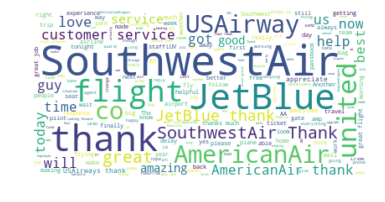

In [0]:
# Import the word cloud function 
from wordcloud import WordCloud 

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

- Define the default list of stop words and update it.
- Specify the stop words argument in the WordCloud function.

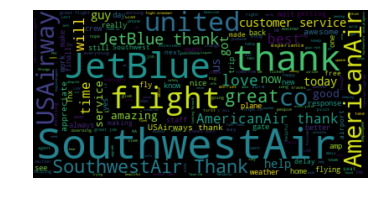

In [0]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 

# Define the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

#### Airline sentiment with stop words

In this exercise, you will create a BOW representation but will account for the stop words. Remember that stop words are not informative and you might want to remove them. That will result in a smaller vocabulary and eventually, fewer features. Keep in mind that we can enrich a default list of stop words with ones that are specific to our context.

In [0]:
tweets_df = pd.read_csv("Tweets.csv")
print("tweets df dimension: ", tweets_df.shape)
tweets_df.head()

tweets df dimension:  (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [0]:
tweets_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [0]:
tweets = tweets_df[['airline_sentiment', 'text']]
tweets = tweets[:1001]

In [0]:
print("tweets df dimension: ", tweets.shape)
tweets.tail()

tweets df dimension:  (1001, 2)


,airline_sentiment,text
996,negative,@united I'm trying to get to my final destinat...
997,negative,@united that guy really has no customer servic...
998,positive,@united he has no priority and Iove it
999,positive,@united Pleased to be a Premier Platinum
1000,negative,@united how can you not put my bag on plane to...


You are given a dataset, called tweets, which contains customers' reviews and sentiments about airlines. It consists of two columns: airline_sentiment and text where the sentiment can be positive, negative or neutral, and the text is the text of the tweet.

- Import the default list of English stop words.
- Update the default list of stop words with the given list ['airline', 'airlines', '@'] to create my_stop_words.
- Specify the stop words argument in the vectorizer.

In [0]:
# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS 

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000114  000419  ...  zfqmpgxvs6  zone  zsuztnaijq  zv2pt6trk9
0   0    0       0       0  ...           0     0           0           0
1   0    0       0       0  ...           0     0           0           0
2   0    0       0       0  ...           0     0           0           0
3   0    0       0       0  ...           0     0           0           0
4   0    0       0       0  ...           0     0           0           0

[5 rows x 2867 columns]


#### Multiple text columns

In some situations, you might have more than one text column in a dataset and you might want to create a numeric representation for each of the text columns. 

Your task is to build BOW representations for both columns and specify the required stop words.

In [0]:
# dataset not available

A data set tweets has been imported for you.

Here, besides the text column, which contains the body of the tweet, there is a second text column, called negativereason. It contains the reason the customer left a negative review.

In [0]:
# Import the vectorizer and default English stop words list
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS 

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
vect1.fit(tweets.text)
vect2.fit(tweets.negative_reason)

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names()[-15:])
print(vect2.get_feature_names())

### Capturing a token pattern


#### Specify the token pattern

Your task is to vectorize the object column using CountVectorizer. You will apply different patterns of tokens in the vectorizer. Remember that by specifying the token pattern, you can filter out characters.

In [0]:
# dataset not available

In this exercise, you will work with the text column of the tweets dataset. 

1. Build a vectorizer from the text column, specifying the pattern of tokens to be equal to r'\b[^\d\W][^\d\W]'.

In [0]:
# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names()))

2. Build a vectorizer from the text column using the default values of the function's arguments.
3. Build a second vectorizer, specifying the pattern of tokens to be equal to r'\b[^\d\W][^\d\W]'.

In [0]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

#### String operators with the Twitter data

Your task is to turn the text column into a list of tokens. Then, using string operators, remove all non-alphabetic characters from the created list of tokens.

- Import the word tokenizing function.
- Create word tokens from each tweet.
- Filter out all non-alphabetic characters from the created list.

In [0]:
# Import the word tokenizing package
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

#### More string operators and Twitter

You need to construct three new lists by applying different string operators:

a list retaining only letters
a list retaining only characters
a list retaining only digits

In [0]:
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

In this exercise, you will apply different string operators to three strings, selected from the tweets dataset. A tweets_list has been created for you.

- Create a list of the tokens from tweets_list.
- In the list letters remove all digits and other characters, i.e. keep only letters.
- Retain alphanumeric characters but remove all other characters in let_digits.
- Create digits by removing letters and characters and keeping only numbers.

In [0]:
# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


### Stemming and lemmatization


#### Stems and lemmas from GoT

Remember that stems reduce a word to its root whereas lemmas produce an actual word. However, speed can differ significantly between the methods with stemming being much faster. In Steps 2 and 3, pay attention to the total time it takes to perform each operation. We're making use of the time.time() method to measure the time it takes to perform stemming and lemmatization.

- Import the stemming and lemmatization functions.
- Build a list of tokens from the GoT string.

In [0]:
GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

In this exercise, you are given a couple of sentences from George R.R. Martin's Game of Thrones. Your task is to create stems and lemmas from the given GoT string.

In [0]:
# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

# Tokenize the GoT string
tokens = word_tokenize(GoT) 

In [0]:
tokens[:5]

['Never', 'forget', 'what', 'you', 'are']

- Using list comprehension and the porter stemmer you imported, create the stemmed_tokens list.

In [0]:
import time

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0006880760192871094
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


- Using list comprehension and the WNlemmatizer you imported, create the lem_tokens list.

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import time

# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for lemmatizing in seconds:  1.7312216758728027
Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


#### Stem Spanish reviews

In this exercise, you will first detect the languages in the non_english_reviews and then select only those in Spanish. 

In [0]:
non_english_reviews[:5]

,score,review,n_words,language
1249,1,Il grande ritorno!: E' dai tempi del tour di ...,171,it
1259,1,La reencarnación vista por un científico: El ...,37,es
1260,1,Excelente Libro / Amazing book!!: Este libro ...,114,es
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,50,es
1639,1,El libro mas completo que existe para nosotra...,40,es


- Import the language detection package.
- Iterate over the rows of the non_english_reviews using the len() method and range() function.
- Use detect_langs() to detect the language of each review in the for loop.

In [0]:
# Import the language detection package
import langdetect

# Loop over the rows of the dataset and append  
languages = [] 
for i in range(len(non_english_reviews)):
    languages.append(langdetect.detect_langs(non_english_reviews.iloc[i, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]
# Assign the list to a new feature 
non_english_reviews['language'] = languages

# Select the Spanish ones
non_english_reviews = non_english_reviews[non_english_reviews.language == 'es']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
languages[:5]

['it', 'es', 'es', 'es', 'es']

In [0]:
non_english_reviews[:5]

,score,review,n_words,language
1259,1,La reencarnación vista por un científico: El ...,37,es
1260,1,Excelente Libro / Amazing book!!: Este libro ...,114,es
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,50,es
1639,1,El libro mas completo que existe para nosotra...,40,es
1745,1,Excelente!: Una excelente guía para todos aqu...,56,es


In the second step, you will create word tokens from the Spanish reviews and will stem them using a SnowBall stemmer for the Spanish language.

In [0]:
# Import the required packages
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish")

# Create a list of tokens
tokens = [word_tokenize(review) for review in non_english_reviews.review] 
# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in tokens]

# Print the first item of the stemmed tokenss
stemmed_tokens[0]

['la',
 'reencarn',
 'vist',
 'por',
 'un',
 'cientif',
 ':',
 'el',
 'prim',
 'libr',
 'del',
 'dr.',
 'weiss',
 'sig',
 'siend',
 'un',
 'gran',
 'libr',
 'par',
 'tod',
 'aquell',
 'a',
 'quien',
 'les',
 'inquiet',
 'el',
 'tem',
 'de',
 'la',
 'reencarn',
 ',',
 'asi',
 'no',
 'cre',
 'en',
 'ella',
 '.']

#### Stems from tweets

In this exercise, you will work with an array called tweets. It contains the text of the airline sentiment data collected from Twitter.

Your task is to work with this array and transform it into a list of tokens. After that, iterate over the list of tokens and create a stem out of each token.

In [0]:
#@title
tweets = np.array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it",
       "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
       '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
       '@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP',
       "@virginamerica Well, I didn't…but NOW I DO! :-D",
       "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",
       '@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24',
       '@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D',
       "@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p",
       "@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn",
       '@VirginAmerica Thanks!',
       '@VirginAmerica SFO-PDX schedule is still MIA.',
       "@VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo",
       "@VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!",
       'I ❤️ flying @VirginAmerica. ☺️👍',
       '@VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.',
       '@VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???',
       '@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA',
       '@VirginAmerica I love the hipster innovation. You are a feel good brand.',
       '@VirginAmerica will you be making BOS&gt;LAS non stop permanently anytime soon?',
       '@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet',
       "@VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response.",
       "@VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat anything for next 6 hrs #fail",
       "@VirginAmerica do you miss me? Don't worry we'll be together very soon.",
       "@VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS",
       '@VirginAmerica LAX to EWR - Middle seat on a red eye. Such a noob maneuver. #sendambien #andchexmix',
       "@VirginAmerica hi! I just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during Flight Booking Problems 😢",
       '@VirginAmerica Are the hours of operation for the Club at SFO that are posted online current?',
       '@VirginAmerica help, left expensive headphones on flight 89 IAD to LAX today. Seat 2A. No one answering L&amp;F number at LAX!',
       '@VirginAmerica awaiting my return phone call, just would prefer to use your online self-service option :(',
       '@VirginAmerica this is great news!  America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via @Pacificbiznews',
       'Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP',
       '@VirginAmerica Moodlighting is the only way to fly! Best experience EVER! Cool and calming. 💜✈ #MoodlitMonday',
       '@VirginAmerica @freddieawards Done and done! Best airline around, hands down!',
       '@VirginAmerica when can I book my flight to Hawaii??',
       '@VirginAmerica Your chat support is not working on your site: http://t.co/vhp2GtDWPk',
       '@VirginAmerica View of downtown Los Angeles, the Hollywood Sign, and beyond that rain in the mountains! http://t.co/Dw5nf0ibtr',
       "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
       '@VirginAmerica plz help me win my bid upgrade for my flight 2/27 LAX---&gt;SEA!!!  🍷👍💺✈️',
       "@VirginAmerica I have an unused ticket but moved to a new city where you don't fly. How can I fly with you before it expires? #travelhelp",
       '@VirginAmerica are flights leaving Dallas for Seattle on time Feb 24?',
       "@VirginAmerica I'm #elevategold for a good reason: you rock!!",
       '@VirginAmerica  DREAM http://t.co/oA2dRfAoQ2 http://t.co/lWWdAc2kHx',
       '@VirginAmerica wow this just blew my mind',
       '@VirginAmerica @ladygaga @carrieunderwood After last night #tribute #SoundOfMusic #Oscars2015 @ladygaga! I think @carrieunderwood agree',
       '@VirginAmerica @ladygaga @carrieunderwood All were entertaining',
       '@VirginAmerica Is flight 769 on it\'s way? Was supposed to take off 30 minutes ago. Website still shows "On Time" not "In Flight". Thanks.',
       '@VirginAmerica @ladygaga @carrieunderwood Julie Andrews all the way though @ladygaga was very impressive! NO to @Carrieunderwood',
       '@VirginAmerica wish you flew out of Atlanta... Soon?',
       '@VirginAmerica @ladygaga @carrieunderwood Julie Andrews. Hands down.',
       '@VirginAmerica Will flights be leaving Dallas for LA on February 24th?',
       "@VirginAmerica hi! i'm so excited about your $99 LGA-&gt;DAL deal- but i've been trying 2 book since last week &amp; the page never loads. thx!",
       '@VirginAmerica you know it. Need it on my spotify stat #guiltypleasures',
       "@VirginAmerica @ladygaga @carrieunderwood  I'm Lady Gaga!!! She is amazing! 😊",
       '@VirginAmerica @ladygaga @carrieunderwood - Carrie!',
       '@VirginAmerica New marketing song? https://t.co/F2LFULCbQ7 let us know what you think?',
       "@VirginAmerica @ladygaga @carrieunderwood Julie Andrews first but Lady Gaga wow'd me last night. Carrie? Meh.",
       "@VirginAmerica I called a 3-4 weeks ago about adding 3 flights from 2014 to my Elevate...they still haven't shown up...help!",
       '@VirginAmerica @ladygaga @carrieunderwood all are great , but I have to go with #CarrieUnderwood 😍👌',
       '@VirginAmerica @LadyGaga @CarrieUnderwood Sorry, Mary Martin had it first!',
       "@VirginAmerica @ladygaga @carrieunderwood  love all three but you really can't beat the classics!",
       '@VirginAmerica Flight 0736 DAL to DCA 2/24 2:10pm. Tried to check in could not. Status please.',
       '@VirginAmerica heyyyy guyyyys.. been trying to get through for an hour. can someone call me please? :/',
       "@VirginAmerica Hi, Virgin! I'm on hold for 40-50 minutes -- are there any earlier flights from LA to NYC tonight; earlier than 11:50pm?",
       '@VirginAmerica Congrats on winning the @Travelzoo award for Best Deals from an Airline (US) http://t.co/kj1iljaebV',
       '@VirginAmerica everything was fine until you lost my bag',
       '@virginamerica Need to change reservation. Have Virgin credit card. Do I need to modify on phone to waive change fee? Or can I do online?',
       '@VirginAmerica I emailed your customer service team. Let me know if you need the tracking number.',
       '@VirginAmerica hi I just booked a flight but need to add baggage, how can I do this?',
       '@VirginAmerica your airline is awesome but your lax loft needs to step up its game. $40 for dirty tables and floors? http://t.co/hy0VrfhjHt',
       "@VirginAmerica not worried, it's been a great ride in a new plane with great crew. All airlines should be like this.",
       '@VirginAmerica awesome. I flew yall Sat morning. Any way we can correct my bill ?',
       '@VirginAmerica Or watch some of the best student films in the country at 35,000 feet! #CMFat35000feet http://t.co/KEK5pDMGiF',
       '@VirginAmerica first time flying you all. do you have a different rate/policy for media Bags? Thanks',
       '@VirginAmerica what is going on with customer service? Is there anyway to speak to a human asap? Thank you.',
       '@VirginAmerica what happened to Doom?!',
       "@VirginAmerica why can't you supp the biz traveler like @SouthwestAir  and have customer service like @JetBlue #neverflyvirginforbusiness",
       "@VirginAmerica I've applied more then once to be a member of the #inflight crew team...Im 100% interested. #flightattendant #dreampath -G",
       "@VirginAmerica you're the best!! Whenever I (begrudgingly) use any other airline I'm delayed and Late Flight :(",
       '@VirginAmerica I have no interesting flying with you after this. I will Cancelled Flight my next four flights I planned.#neverflyvirginforbusiness',
       '@VirginAmerica it was a disappointing experience which will be shared with every business traveler I meet. #neverflyvirgin',
       '@VirginAmerica I’m having trouble adding this flight my wife booked to my Elevate account. Help? http://t.co/pX8hQOKS3R',
       "@VirginAmerica Can't bring up my reservation online using Flight Booking Problems code",
       "@VirginAmerica Random Q: what's the distribution of elevate avatars? I bet that kitty has a disproportionate share http://t.co/APtZpuROp4",
       '@VirginAmerica I &lt;3 Flying VA But Life happens and I am trying to #change my trip JPERHI  Can you help.VA home page will not let me ?',
       '@VirginAmerica Why is the site down?  When will it be back up?',
       '@VirginAmerica "You down with RNP?" "Yeah you know me!"',
       '@VirginAmerica hi, i did not get points on my elevate account for my most recent flight, how do i add the flight and points to my account?',
       '@VirginAmerica I like the TV and interesting video . Just disappointed in Cancelled Flightled flight when other flights went out to jfk on Saturday .',
       '@VirginAmerica just landed in LAX, an hour after I should of been here. Your no Late Flight bag check is not business travel friendly #nomorevirgin',
       '@VirginAmerica why is flight 345 redirected?',
       "@VirginAmerica Is it me, or is your website down?  BTW, your new website isn't a great user experience.  Time for another redesign.",
       "@VirginAmerica I can't check in or add a bag. Your website isn't working. I've tried both desktop and mobile http://t.co/AvyqdMpi1Y",
       '@VirginAmerica - Let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable',
       "@virginamerica What is your phone number. I can't find who to call about a flight reservation.",
       '@VirginAmerica is anyone doing anything there today?  Website is useless and no one is answering the phone.',
       '@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM',
       '@VirginAmerica why must a traveler miss a flight to Late Flight check a bag?  I missed my morning appointments and you lost my business. #sfo2lax',
       '@VirginAmerica check out new music http://t.co/maRcnOCWzn',
       "@virginamerica how's a direct flight FLL-&gt;SFO have unexpected layover in Vegas 4 fuel yet peeps next to me bought for Vegas flight. #sneaky",
       '@VirginAmerica your no Late Flight bag check just lost you my business. I missed flight and AM apt. Three other people on flight had same exp.',
       "@VirginAmerica - amazing customer  service, again! 💕💕 RaeAnn in SF - she's the best! #customerservice #virginamerica #flying",
       '@VirginAmerica called your service line and was hung up on. This is awesome. #sarcasm',
       "@VirginAmerica your site is tripping. I'm trying to check in and I'm getting the plain text version. I am reluctant to enter any card info.",
       '@VirginAmerica I was scheduled for SFO 2 DAL flight 714 today. Changed to 24th due weather. Looks like flight still on?',
       '@VirginAmerica has getaway deals through May, from $59 one-way. Lots of cool cities http://t.co/tZZJhuIbCH #CheapFlights #FareCompare',
       '@VirginAmerica has getaway deals through May, from $59 one-way. Lots of cool cities http://t.co/RPdBpX3wNd #CheapFlights #FareCompare',
       '@VirginAmerica has getaway deals through May, from $59 one-way. Lots of cool cities http://t.co/B2Xi4YG5T8 #CheapFlights #FareCompare',
       '@VirginAmerica has getaway deals through May, from $59 one-way. Lots of cool cities http://t.co/QDlJHslOI5 #CheapFlights #FareCompare',
       '@VirginAmerica Have a great week 🌞✈',
       '@VirginAmerica come back to #PHL already. We need you to take us out of this horrible cold. #pleasecomeback http://t.co/gLXFwP6nQH',
       '@VirginAmerica should I be concerned that I am about to fly on a plane that needs to be delayed due to a "tech stop"?',
       '@VirginAmerica is the best airline I have flown on.Easy to change your reservation,helpful representatives &amp; a comfortable flying experience',
       '@VirginAmerica and again! Another rep kicked butt! Naelah represents your team so beautifully!! Thank you!!!',
       '@VirginAmerica your beautiful front-end design is down right now; but it was cool to still book my ticket b/c all your back-end was secure.',
       '@VirginAmerica Love the team running Gate E9 at LAS tonight. Waited for a delayed flight, and they kept things entertaining',
       "@VirginAmerica Use another browser! 2015 &amp; a brand with a reputation built on tech response doesn't have a cross-browser compatible website?",
       '@VirginAmerica And now the flight Flight Booking Problems site is totally down. Folks, what is the problem?',
       '@VirginAmerica I like the customer service but a 40 min delay just for connecting passengers seems too long. VA370',
       '@VirginAmerica thanks to your outstanding NYC-JFK crew who moved mountains to get me home to San Francisco tonight!',
       "@VirginAmerica you have the absolute best team and customer service ever.  Every time I fly with you I'm delighted.  Thank you!",
       '@VirginAmerica Do you provide complimentary upgrades to first class, if there are available seats?',
       '@VirginAmerica i need to change my flight thats scheduled in 9 hours and 120 min wait time on phone. Im calling intern. Help!!',
       '@VirginAmerica completely awesome experience last month BOS-LAS nonstop. Thanks for such an awesome flight and depart time. #VAbeatsJblue',
       '@VirginAmerica How can I watch the #Oscars2015 on my JFK-&gt;SFO flight?',
       '@VirginAmerica is flight 882 Cancelled Flightled and what do I do if it is?',
       '@VirginAmerica you are failing your customers because your check in process does not link to TSA pre-check.',
       '@VirginAmerica @FiDiFamilies us too! Terrible airline! Just gave us a hotel hotline number and said sorry',
       '@VirginAmerica has flight number 276 from SFO to Cabo San Lucas arrived yet?',
       '@VirginAmerica @ChrysiChrysic your assistance yesterday when u Cancelled Flightled our flight was to give us a hotel hotline  Shame on you!',
       '@VirginAmerica Another delayed flight? #likingyoulessandless',
       '@VirginAmerica I need to register a service dog for a first class ticket from SFO &gt; Dulles. The phone queue is an hour or longer. Pls advise',
       '@virginamerica you ROCK for making it so I can watch #Oscars on my flight!! #redcarpet #oscars #oscars2015',
       '@VirginAmerica, @reallytallchris dropped a track on you... https://t.co/zv2pt6TRK9',
       '@VirginAmerica always!!! Xoxo',
       "@VirginAmerica why can't we book seats on your flights when we buy them or even during check in? Creates so much anxiety! #frustrated",
       "@VirginAmerica You'd think paying an extra $100 bucks RT for luggage might afford you hiring an extra hand at @sfo #lame",
       '@VirginAmerica best customer service rep in the world! #irmafromDallas takes the cake!!!',
       '@VirginAmerica Can you find us a flt out of LAX that is sooner than midnight on Monday? That would be great customer service 😃',
       "@VirginAmerica please provide status for flight 769.  I cant imagine it's on time as the Web indicates  dude to weather here and/or Dallas",
       '@VirginAmerica you have amazing staff &amp; super helpful as I just ran the @WaltDisneyWorld #PrincessHalf they have spoiled me with comfort!!!',
       '@VirginAmerica I paid the premium to fly you across the country, you Cancelled Flight my flight and offer no check fee or upgrade love? Sad face :(',
       "@VirginAmerica question: is it not possible to book a seat for an infant under 2? It's not giving me the option but we want a seat for him.",
       "Always have it together!!! You're welcome! RT @VirginAmerica: @jessicajaymes You're so welcome.",
       "@virginamerica #flight home to #dc #sunset #globe in' #backtowinter back to #work! #refreshed http://t.co/VX9vBCTdLf",
       ".@VirginAmerica I don't understand why you need a DM to give me an answer on if you have a damaged luggage policy.",
       ".@VirginAmerica does that mean you don't have a policy for destroyed luggage?",
       '@VirginAmerica is there special assistance if I travel alone w/2 kids and 1 infant? Priority boarding?',
       '@VirginAmerica thank you for checking in. tickets are purchased and customer is happy ;-)',
       '@VirginAmerica is your website ever coming back online?',
       '@VirginAmerica  - Is Flight 713 from Love Field to SFO definitely Cancelled Flightled for Monday, February 23?',
       '@VirginAmerica Is flight 0769 out of LGA to DFW on time?',
       '@VirginAmerica my drivers license is expired by a little over a month. Can I fly Friday morning using my expired license?',
       '@VirginAmerica having problems Flight Booking Problems on the web site. keeps giving me an error and to contact by phone.  phone is 30 minute wait.',
       '@VirginAmerica How do I reschedule my Cancelled Flightled flights online? The change button is greyed out!',
       '@VirginAmerica I rang, but there is a wait for 35 minutes!! I can book the same ticket through a vendor, fix your site',
       '@VirginAmerica got a flight (we were told) for 4:50 today..,checked my email and its for 4;50 TOMORROW. This is unacceptable.',
       "@VirginAmerica our flight into lga was Cancelled Flighted. We're stuck in Dallas. I called to reschedule, told I could get a flight for today...(1/2)",
       "@virginamerica why don't any of the pairings include red wine?! Only white is offered :( #redwineisbetter",
       '@VirginAmerica is the website down?',
       '@VirginAmerica - Your site seems a little wonked right now. May want to have a look. Tried on two browsers. No CSS? http://t.co/8qsQMM7KF2',
       "@VirginAmerica I'm disappointed that the agent at the designated silver status check in line @Dulles_Airport closed to assist all pasengers",
       '@VirginAmerica Plans to Include Austin to its Dallas Route - TopNews Arab #Emirates http://t.co/aqZWecOkk2',
       '@VirginAmerica Is it normal to receive no reply from Central Baggage #baggageissues #smh',
       '@VirginAmerica at Logan airport and waiting to checkin for my 9am flight. Checkin desk not open !!!!! Why?!',
       '@VirginAmerica to jump into the Dallas-Austin market - @Dallas_News http://t.co/EwwGi97gdx',
       "@VirginAmerica Beats EPS Views, Takes On #SouthwestAir VA LUV - Investor's Business Daily http://t.co/FLwmGDAHxu",
       '@VirginAmerica Lister to my show my on Monday 1230 130',
       '@VirginAmerica to begin Dallas-Austin #flights in April - 88.9 KETR http://t.co/SSUVWwkyHH',
       '@VirginAmerica congrats, you just got all my business from EWR to SFO/LAX. Fuck you @united fl1289 SFO/EWR was the clincher...',
       "@VirginAmerica  I applied over 2 weeks ago. Haven't heard back and I'm flying this week #disappointed",
       "@VirginAmerica I'd love to know what your policy is for damaged luggage.",
       '@VirginAmerica Thank you for the follow',
       "@VirginAmerica - too many apologies! You r the worse airlines! Don't even respond to your cudtomers",
       '@VirginAmerica shame on VA for making people spend money in stranded cities when other airlines are landing at JFK! Who will reimburse me?',
       '@VirginAmerica @TTINAC11 I DM you',
       '@VirginAmerica can you please have flights in  SJC ? I have no choice but to fly Southwest to Vegas 😩😭',
       '@VirginAmerica too bad you say it takes 10 to 14 days via YOUR confirmation email. When I inquired after 3 weeks you claim 6 to 8 weeks!',
       '@VirginAmerica Flight from BOS &gt; LAS tomorrow was Cancelled Flightled. No notification; wait times are 1+ hour. Will you rebook on another airline?',
       '😎 RT @VirginAmerica: You’ve met your match. Got status on another airline? Upgrade (+restr): http://t.co/RHKaMx9VF5. http://t.co/PYalebgkJt',
       '@VirginAmerica Only way to fly! #Elevate #Gold',
       '@VirginAmerica If only you guys had flights from CMH.',
       '@VirginAmerica a lot of "apologies" being thrown out to customers from what I can see.Very sad. Thanks for nothing. Worst airline ever.',
       '@VirginAmerica  for all my flight stuff wrong and did nothing about it. Had #worst #flight ever',
       '@VirginAmerica Having an issue finding a missing item on a plane. Can you help me find which airport my plane headed to next?',
       '@VirginAmerica you will match my #AmericanAirlines status? Cool!',
       "“@VirginAmerica:You've met your match.Got status on another airline? Upgrade : http://t.co/H952rDKTqy” @asarco_ES_ar ? 🙉",
       "@VirginAmerica trying to book a flight with you guys and your website won't let me... about to lose my business",
       '@VirginAmerica you suck!', '@VirginAmerica thanks!',
       "@VirginAmerica Just DM'd. Same issue persisting.",
       "@VirginAmerica Because we never rec'd Cancelled Flightlation notice we were left w no options to fly out of PS. Driving to LA for a red eye Mon w kids",
       '@VirginAmerica trying to book a flight &amp; your site is down 😁',
       "@VirginAmerica You have any flights flying into Boston tomorrow? I need to be home and you Cancelled Flightled my flight and didn't do anything",
       '@VirginAmerica you stink. Flight Cancelled Flighted from PSP to JFK and no notification or ability to rebook #disappointed.  #expected better',
       "@VirginAmerica I love your guy's song! We're dancing to it for our high school dance revue",
       "@VirginAmerica Your website is down and I'm trying to check in!",
       '@VirginAmerica done! Thank you for the quick response, apparently faster than sitting on hold ;)',
       '@VirginAmerica nervous about my flight from DC to LAX getting Cancelled Flightled tomorrow! Just sent you a DM to help me!',
       '@VirginAmerica cool picture of another VirginAmerica plane off our wing. What a site! http://t.co/5B2agFd8c4',
       '@VirginAmerica Keep up the great work :)',
       '@VirginAmerica my goodness your people @love field are amazing under pressure ❤️from Texas #beatstheothers in crisis Please fly me to NY',
       '@VirginAmerica Thanks for a great flight from LA to Boston! Pilots did a great job landing in the snow. Can we go back to LA now? #seriously',
       '@VirginAmerica can you please get me to the new york area before monday afternoon',
       '@VirginAmerica Thanks so much for the awesome support, you guys rock!',
       "@VirginAmerica seats in Row 8 don't recline should mention that on your website #soreback",
       '@VirginAmerica flight 404 delayed 2 hours in LA due to mechanical problems. Handle like pros but you could have tossed us a free drink.',
       '@VirginAmerica why Cancelled Flight flights today? No precipitation to be scared of!  ❄️❄️❄️',
       '@VirginAmerica twitter team. you guys killed it for rescheduling me asap. thank you!',
       "@VirginAmerica You guys charged me $100 to reschedule a flight that was then Cancelled Flighted and are now refusing to refund it. What's the deal?",
       '@VirginAmerica can’t access your website from Safari on iPhone 6. Seems to work on Mac and iPad. Need iPhone to add Passbook.',
       '@VirginAmerica on iPad and iPhone, clicking the CHECKIN link in the email I received at 24hrs before flight',
       '@VirginAmerica your mobile site is broken, shows \n"{{header.elevateUser.numOfPointsAvailable || \'0\' | number}} Points", won\'t let me checkin',
       '@VirginAmerica I was really looking forward to my flight. can you let me know when it will be rescheduled? #diehardvirgin',
       '@VirginAmerica why Cancelled Flight flight VX413? One sec its delayed, on my to airport, the next its Cancelled Flightled?Gonna email or call me to reschedule?',
       '@VirginAmerica I did it but there was a problem in the link from the email for check-in. thanks',
       '@VirginAmerica had to change to another airline to get to DC today ... Why is @united able to land in DC but not you? Cost me $800 ...ugh',
       '@VirginAmerica I was so looking forward to my first flight with you today but it was Cancelled Flightled along with the subsequent one ...',
       '@VirginAmerica when are you putting some great deals from PDX to LAS or from LAS to PDX show me your love! http://t.co/enIQg0buzj',
       '@VirginAmerica wish I can afford to fly with you next Friday  going back home.. love everything  about your airline',
       '@VirginAmerica  how are you gonna have a deal from Dallas to DC but no deal from DC to Dallas? #sad',
       '@VirginAmerica it’s just a bug report, guys',
       '@VirginAmerica hold times at call center are a bit much',
       '@VirginAmerica Like http://t.co/VPqEm31XUQ',
       '@VirginAmerica Site down? #help',
       '@VirginAmerica You have the best flight attendant ever!!! http://t.co/PxdEL1nq3l',
       'Awesome! RT @VirginAmerica: Watch nominated films at 35,000 feet. #MeetTheFleet #Oscars http://t.co/DnStITRzWy',
       '@VirginAmerica thanks so much!',
       '@VirginAmerica Trying to reset my password, email never arrives. Help?',
       "@VirginAmerica, the only airline based in Silicon Valley! #disruption #FCmostinnovative #incubator  @FastCompany's http://t.co/wU3LbCNcr9",
       '@VirginAmerica Very nicely done. 👏',
       '@VirginAmerica I’m looking forward to watching the Oscars on my flight home tomorrow. I might even get something bubbly to drink! ;)',
       '@VirginAmerica What is the reason  for the delay of the departure of VX 413 from JFK this afternoon?',
       '@VirginAmerica is todays flight from Palm Springs, Ca to JFK in NY Cancelled Flightled?',
       '@VirginAmerica hahaha 😂@VirginAmerica YOU GUYS ARE AMAZING. I LOVE YOU GUYS!!!💗',
       '@VirginAmerica sounds like fun !',
       '@VirginAmerica any updates on flight 413 from Jfk &gt; Lax',
       '@virginamerica spruce moose!',
       '@VirginAmerica the CSS on your site is a 404 right now, please fix. Site unusable.',
       "@VirginAmerica We're on flight 910 Vegas to Boston today, checked in online but our bag count didn't register. Can I fix that somehow?",
       '@VirginAmerica classiq, luv Virgin America. Greetingz',
       "@VirginAmerica Hi, I'm trying to do check-in but the website is not working. I tried 3 different browsers and the problem continues",
       '@VirginAmerica Thanks for your great customer service today &amp; for helping me get all my travel sorted out!',
       '@VirginAmerica thanks guys! Sweet route over the Rockies #airplanemodewason',
       '@VirginAmerica love the 90s music blasting at gate in #Boston while waiting for flight to #SanFrancisco. Only if I could get an iced coffee!',
       "@VirginAmerica - the passenger in 7D, Flt 338 that assaulted me shouldn't have flown. I trust he's banned. Crew filed report to @FAANews",
       '@VirginAmerica current bug on website shows ‘select departure city’ when selecting destination city http://t.co/SLLYIBE2vQ',
       "@VirginAmerica luggage was severely dented/missing wheel coming off baggage claim in SAN. Luggage agent Miranda (I think) wasn't any help.",
       '@VirginAmerica thank you for the easy itinerary shift for impending weather. Quick, painless &amp; free.',
       "@VirginAmerica If you'd love to see more girls be inspired to become pilots, RT our free WOAW event March 2-8 at ABQ. http://t.co/rfXlV1kGDh",
       '@VirginAmerica Thanks! Good times there and back! #Vodkatonics the entire flight🍸#sfo',
       '@VirginAmerica beats expectations, shares take off - Santa Cruz Sentinel http://t.co/qm9dQbai6G',
       '@VirginAmerica any plans to start flying direct from DAL to LAS?',
       '@VirginAmerica BIG Love/gratitude.mpower w/ http://t.co/1AGR9knCpf weRin #OSCARS2105 VIPswagbags@ #AvalonHollywood http://t.co/ybMbGs0dHn',
       "@VirginAmerica, you're doing a great job adding little luxuries/aesthetics that improve the air travel experience. Thank you. Keep it up!",
       '@VirginAmerica requested window seat and confirmed window but got stuck in middle seat. Not a good way to treat silver member😒',
       '@VirginAmerica Grand Budapest Hotel #OscarsCountdown',
       '@VirginAmerica This is what you missed @NewsVP. Next trip to the 407.',
       '@VirginAmerica #wtf I paid for direct flight on purpose not to have to stop for fuel exhausted frequent flier and nothing for inconvenience!',
       '@VirginAmerica there is something wrong with you website in Safari iPhone',
       '@VirginAmerica thanks for gate checking my baggage on your full flight dfw-lax 883 and giving me early boarding too #sweet',
       '@VirginAmerica Already checked in so the page expired :X',
       '@VirginAmerica Boo for a not refunding a seat upgrade fee I did not want to buy in the first place!',
       '@VirginAmerica shares rise on Q4 financial results - USA TODAY http://t.co/lFS4PEFE6y',
       '@VirginAmerica Adds Pillows Instead of Lie-Flat Seats in First Class Arms Race http://t.co/rGYwJBbhm4',
       '@VirginAmerica I see what you did there ;)',
       '@VirginAmerica way to take advantage of #MayweatherPacquiao :)',
       "@VirginAmerica you know I'm flying virgin for the fight #MayweatherPacquiao",
       '@VirginAmerica your inflight team makes the experience #amazing!',
       "@VirginAmerica cutest salt and pepper shaker ever. Just when I think you guys can't get any better you just do! http://t.co/vC6Keulg2J",
       '@VirginAmerica moved my seat with no notice. "Better seat" is cabin select not behind the row I selected👎 #DISAPPOINTED',
       '@VirginAmerica shares up on 4Q results - @iol http://t.co/XZ6qeG3nef',
       '@VirginAmerica fav airline',
       '@VirginAmerica we have a hot female pilot! Sweet! DCA to SFO! :-)',
       "👍👍✈️✈️💗 When are you guys going to start flying to Paris? @VirginAmerica: @LizaUtter You're welcome.”",
       '@VirginAmerica what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.',
       '@VirginAmerica already contacted Central Baggage &amp; sent DM. @RenttheRunway is charging me for the dress that was in the lost suitcase #help',
       '@VirginAmerica Thank you!!',
       "@VirginAmerica Is there anything going on with the website? I've been getting a lot of errors past 30 minutes.",
       '@VirginAmerica I think i left something on the plane yesterday. who do i call...ah!',
       '@VirginAmerica I need you to follow back in order to DM.',
       '@VirginAmerica Need to start flying to @KCIAirport .  😊😀😃😄',
       '@VirginAmerica they told to check with the airline regulation first so that is why I contacted you.',
       '@VirginAmerica @VirginAtlantic I have just checked in flight to SFO from LAX &amp; been told as Atlantic Flying Club Gold I get no benefits?!',
       '@VirginAmerica husband and I ordered three drinks via my screen and they never came. Awesome!',
       '@VirginAmerica soooo are you guys going to leave the seatbelt light on all flight? You can barely call this turbulence :-)',
       '@VirginAmerica what is your policy on flying after surgery?',
       '@VirginAmerica posts second consecutive full-year net profit - @ATWOnline http://t.co/tvB5zbzVhg',
       '@VirginAmerica Funny story, your website is broken, you have missing javascript and stylesheets on the checkin process. I dislike this!',
       '@VirginAmerica would love to do more for virgin just like I do for @GoPro',
       '@VirginAmerica Results Handily Exceed Forecasts - @NYTimes http://t.co/gonmRwEM6I',
       '@VirginAmerica I applied for a position in @flyLAXairport ,and I was wondering if you guys received my application.',
       '@VirginAmerica achieves a second year of profitability despite revenue pressure ... - @CAPA_Aviation http://t.co/zSuZTNAIJq',
       '@VirginAmerica gives positive outlook, but sees increased competition - @Reuters http://t.co/jEu7Od3eYJ',
       "@VirginAmerica I'm trying to check into my 10:50AM CT flight tmm on the desktop website and it's not working (some sort of caching bug) SOS",
       '@VirginAmerica weather delays &gt; next few weeks ;) #JFK #BOS #DCA',
       '@VirginAmerica @madbee95 check the website before you go to the airport!',
       '@VirginAmerica Do you guys know your check-in links from emails are broken? http://t.co/2npXB6oBMr',
       '@VirginAmerica pilot says we expect a choppy landing in NYC due to some gusty winds w/a temperature of about 5 degrees &amp; w/the windchill -8',
       "@VirginAmerica loved it. Can't wait for Monday's return flight... Mostly just to watch the inflight safety video again. #sorrynotsorry",
       "@VirginAmerica lost my luggage 4 days ago on flight VX 112 from LAX to IAD &amp; I'm calling every day, no response.Please give me back my stuff",
       '@VirginAmerica The Flight Booking Problems section of your website seems to be broken on Chrome. Might wanna look into that.',
       '@VirginAmerica Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more!',
       "@VirginAmerica I mean. Probably inappropriate while on board.. But, it's on!",
       "@VirginAmerica happy to spend the day together. Let's do this!",
       '@VirginAmerica is saving my sanity right now: http://t.co/ELtBOLjUl9',
       '@VirginAmerica missed my flight. How does standby work?',
       '.@VirginAmerica They were very understanding and helped me out.  Thx! #Comps',
       '@VirginAmerica brought it all the way across the country today I see http://t.co/TKaUyGcPmS',
       '@VirginAmerica thank you! I absolutely will 😎',
       '@virginamerica Looks like a broken link for your assets https://t.co/OArDjjGrrD',
       "@VirginAmerica are you ready!? Let's say it together.. 'Noooo turbulence today!' 😘",
       '@virginamerica the manage itinerary section of your website seems to be broken for me https://t.co/2pUJvCElNg',
       "@VirginAmerica can't check in, your site looks like this every time it loads http://t.co/kAcY2AwDbW",
       '@VirginAmerica can u help this 👸 @FreyaBevan_Fund needs urgent treatment in🇺🇸2y old battling cancer could u help with flights 💗#freyasfund',
       '@virginamerica may start service to Hawaii from #SanFrancisco this year http://t.co/yPo7nYpRZl #biztravel',
       '@virginAmerica Other carriers are less than half price for a round trip fare. I am stunned. http://t.co/UKdjjijroW',
       '@VirginAmerica WTF is happening in PDX Late Flight March such that one way from SFO is ~$550?',
       "@VirginAmerica add DTW and I'm sold!",
       '@VirginAmerica How about some free drinks on the flight back for the free promo?',
       '@VirginAmerica @SSal thanks!',
       '@VirginAmerica momma I made it! 😁😁😁',
       '@VirginAmerica please contact me about portfolio left on flight VX 27 from JFK to SFO tonite seat 7AM. Need it returned. Call 914-329-0185.',
       '@VirginAmerica help. I was On  Flight  27 from JKF tonight. seat 7C left portfolio. Need it back!!',
       "@VirginAmerica @shrinerack Seattle bound. Wifey got me the duffle for vday. She's a keeper!!! Holla!!! http://t.co/JlOIbLnair",
       "@VirginAmerica my luggage is gone. I've filed my paperwork, promised a call/email. Still no resolution or response from central luggage.",
       '@VirginAmerica Debbie Baldwin gave a #rockstar performance of the safety demo this evening on VX919 #LAS2SFO #BestCrew #SheRocks',
       '@VirginAmerica Thanks!',
       '@VirginAmerica thanks for taking care of @SuuperG on her flight!! #rockstars #travel',
       '@VirginAmerica Thanks for the lovely soft views! #travel #SAN to #SFO http://t.co/CnctL7G1ef',
       "@VirginAmerica I requested a mileage challenge for status several weeks ago online but haven't heard back. How do I get help with this?",
       "@VirginAmerica Just trying to book tickets to NYC and facing super fun broken styling. Don't worry, I'll keep trying :)",
       '@VirginAmerica Many Thanks for the Follow.\n#ourprincess #freyasfund #USA #Bandie \nLooking for Any Help😍\n💗🇬🇧💗🇺🇸💗\n🎀🌏🎀 http://t.co/UJfS9Zi6kd',
       '@VirginAmerica Nice, Lofty View @flyLAXairport. #SilverStatus http://t.co/F4Tp0dAwbd',
       '@VirginAmerica Applied for Status Match on Feb 1. Got confirmation email same day. Still no news though. You guys have dropped ball Late Flightly 😥',
       '@VirginAmerica is my new go to airline',
       '@VirginAmerica @VirginAtlantic @GMA @AmericanAir \nCan You Help #ourprincess in need of some help in #USA \n🎀🇬🇧🎀🇺🇸🎀 http://t.co/778AzTDaer',
       '@VirginAmerica I adore you, and am so looking forward to my flight to Austin in two weeks.',
       '@VirginAmerica I was so glad it was mentioned. I took my first virgin flight a few years back and it was a transformative experience.',
       '@VirginAmerica Flight Booking Problems flight to uphold my status match.  Do taxes on ticket count as earned status points?  #statusmatch #virginamerica',
       '@VirginAmerica trying to check-in...but looks like your site is down?',
       '@VirginAmerica spending my birthday night with you, DAL-DCA. Get me home!',
       '@VirginAmerica Sent a couple messages to the email you provided but to no avail. Will try again next year. Cheers.',
       '@VirginAmerica first time flying Virgin, went to #SanFrancisco .Thanks for the smooth ride. Easily my new fav airline!',
       '@VirginAmerica seriously, though. will there not be direct flights from SFO-FLL in may???',
       "@VirginAmerica It's fine. Already done with my purchase. But you should try it. Just go most of the way through then go back 3",
       '@virginamerica not really the experience I was hoping 4, I ws forced 2 check in a small carry on, w/ nothing but empty cabin space on board',
       '@VirginAmerica\nwjere is our luggage #so slow at lax',
       '@VirginAmerica to jump into the #Dallas #Austin market http://t.co/SzR0pioA21',
       '@VirginAmerica I spoke with a representative that offered no solution, I am a loyal customer who flies on @VirginAtlantic as well',
       '@VirginAmerica I am deeply disappointed that your birthday promo was not applied to a trip I booked mere days before I received the email',
       '@VirginAmerica what happened to direct flights from SFO-FLL? Looking in May, only see connecting #help #dontdothistome',
       '@virginamerica.. Can you help? Left my blazer in. Kooples jacket bag at 3rd row second seat from right gate 36 T3 lax.. Flight to sfo',
       '@VirginAmerica partners with @Visa Checkout as mobile payment method to help boost mobile conversion rates #etailwest #payments #visa',
       '@VirginAmerica just promoting the product is all, had a problem with southwest and recommend noneother than the best! http://t.co/tFaNXBh1Cf',
       '@VirginAmerica love you guys, but pls get some direct routes LAS to AUS!',
       '@VirginAmerica i would like help with some flights please.',
       'Bruh “@VirginAmerica: @giannilee Turn down for what. #VXSafetyDance”',
       "@VirginAmerica of course! I work for @VirginAtlantic and I'm obsessed with the entire Virgin family!!",
       '@VirginAmerica ok! first time flying with you tonight :)',
       '@virginamerica Digging the swanky pink mood lighting during the flight from NYC to SFO.  Just needs a cabaret singer.  Think about it!',
       '@VirginAmerica Done, but I need the receipt ASAP. Could you please help? #150219-000114',
       '@VirginAmerica I have 2d and 3d embossed badges and patches superior to the ones you are currently using. \nhttp://t.co/3fq3XElbOn',
       '@VirginAmerica on VX399 from JFK to LA - dirty plane - not up to your standards.',
       '@VirginAmerica on flight VX399 headed to LA from JFK - dirtiest VA plane I have ever been on. Sad for a great airline.',
       '@VirginAmerica got it squared away. Someone picked up as soon as I tweeted. Should have tweeted sooner. 😉',
       "@VirginAmerica your Avis rental continue button doesn't work on your website to book car. Tried 4 times on phone.  This sucks!",
       '@VirginAmerica delayed to10.30!!',
       '@VirginAmerica currently in minute 10 of being on hold with cust. service. Do I need to do anything to add a lap child to my reservation?',
       '@VirginAmerica Adds Pillows Instead of Lie-Flat Seats in First Class Arms Race \nhttp://t.co/SfjDuahx9Z by @skift',
       '“@VirginAmerica: @KarinSLee Of course. Have fun celebrating!” Thanks! Happy Chinese New Year!',
       '@VirginAmerica  Flight Booking Problems last second flight for next week from SFO- to SAN any chance you want to gift me a promo code since I love you guys',
       '@VirginAmerica Comenity Bank is a joke!  Please change.  Nothing but constant problems with this bank',
       '@VirginAmerica I just did, how can I DM? Do u have to also add me?',
       "@VirginAmerica For my Grandma Ella's 80th, she would &lt;3 a bday greeting from your flight crew! She was a stewardess for Eastern Airlines.",
       '@VirginAmerica Just bought tix for ATX - Dallas route - thanks for adding that! Love yr airline &amp; yr website is BEST transactional site EVER',
       '@VirginAmerica Anytime, sugafly.',
       "@VirginAmerica gave a credit for my Late Flight flight yesterday. Great service !!!! That's a Wow moment! Unexpected gesture!",
       '@VirginAmerica I need a receipt for a flight change. Can you send one?',
       '@VirginAmerica, I submitted a status match request a while back and still haven’t heard! I’m flying on Monday. Can you look / accelerate?',
       '@VirginAmerica had me at their safety video . . . http://t.co/CqMm7nuE9m  LOVED my first cross country flight. #livewelltraveled #sytycd',
       "@VirginAmerica that doesn't look to fat to me! It looks yummy!",
       '@VirginAmerica CEO says #Southwest &amp; #jetblue have strayed from low cost model.\nhttp://t.co/96Sctomh29',
       '@VirginAmerica a brilliant brisk am in Boston in cue for vx363 http://t.co/rMZNIVGmg6',
       '@VirginAmerica Atlantic ploughs a lone furrow in the #MiddleEast http://t.co/FVUdmh27pF @TheNationalUAE',
       '@VirginAmerica Atlantic ploughs a lone furrow in the #MiddleEast http://t.co/DCoBoKN7EE @TheNationalUAE',
       '@VirginAmerica Atlantic ploughs a lone furrow in the #MiddleEast http://t.co/vw4P4T4tLh @TheNationalUAE',
       '@VirginAmerica omg omg😍😍 nonstop Dallas to Austin on virgin✨😱✈️',
       '@VirginAmerica Your planes are really pretty. Just thought u should know that. :)',
       '@VirginAmerica when are you flying to hawaii',
       "@VirginAmerica I'm pulling my hair out trying to book a flight with u. Your site doesn't work on iPhone or iPad.don't have a computer #help",
       '@VirginAmerica thank you',
       "@VirginAmerica Can I get some help with a support ticket? It's been 15 days.... Incident: 150202-000419 Thank you!",
       '@VirginAmerica good to be home #texas #moodlighting http://t.co/N3BVZTY3zI',
       '@VirginAmerica I cannot even open my laptop in seat 4C and I paid a premium for this?!!   Let me out of here!',
       '@VirginAmerica I am in seat 4C and I cannot even open my laptop; and I paid extra for this seat!!',
       '.@VirginAmerica If only you guys were starting those flights at the end of the month! Guess I’m still road tripping on Feb 27…',
       "@VirginAmerica thanks for that. Been needing a way to make those Austin trips from DCA, and now you've come through!",
       '@VirginAmerica announced New Route to Austin w/fares from $39/way. \nhttp://t.co/gA8pbamu0C',
       "@VirginAmerica Really? Sprint? I thought you guys were 'kewl'! 0_0",
       '@VirginAmerica this is too cool!  Never been on ur planes but now I will!!',
       '@VirginAmerica you should have 39 dollar LAX-Las fares!!!',
       '@VirginAmerica great. Well deserved.',
       "@VirginAmerica FYI the info@virginamerica.com email address you say to contact in password reset emails doesn't exist. Emails bounce.",
       '@VirginAmerica Status match - 2 weeks have gone by and no news.Flt next week - hope flt will count towards requirement.  Cust Svc no help!!!',
       '@VirginAmerica your website sucks donkey dicks. Just thought you should know. All best.',
       '@VirginAmerica You should still develop an app - then you will be my favorite airline.',
       '@VirginAmerica all crap channels which is why I pay to watch UK tv',
       '@VirginAmerica got it. All set - Thanks!',
       "@VirginAmerica no A's channel this year?",
       '@VirginAmerica Only thing I see on passbook is Virgin Mobile Mexico. How do I integrate?',
       '@VirginAmerica Giants and Virgin America. A match made in heaven.',
       '@VirginAmerica thank goodness!! Also, see you friday, nwk&gt;sf.. BOOM!',
       "@VirginAmerica how come you don't have an iPhone app? Still using and making me waste paper.",
       '@VirginAmerica Your back of seat entertainment system does not accept credit cards that  have an apostrophe in the surname. #apostrophefail',
       '@VirginAmerica When will VX use all 6 LGA slots instead of 4 today? Adding AUS makes this less likely :(',
       '@VirginAmerica is helping me step up my @Tinder game! #TinderTips #tinderchamp http://t.co/jBmVVha63A',
       "@VirginAmerica I luv ur people and product! 1 thing is y do u charge for herbal tea but not black tea? I'm not a caffeine drinker",
       "@VirginAmerica thank you! See y'all soon! I'm excited to see the expansion of destinations. Spread those wings!",
       '@VirginAmerica announces new nonstop connecting @AUStinAirport &amp; @DallasLoveField, $39 intro: http://t.co/qXnOaQtYN8 http://t.co/JK7qmdfqgf',
       '@VirginAmerica adds Austin-Dallas Love Field route. http://t.co/XWJoL55FLH http://t.co/Y8AOrMfkaC',
       '@VirginAmerica sad to learn you no longer fly SFO &gt; PHL. Hope it returns!',
       '@VirginAmerica - can you tweet me the Cancelled Flight/chng fee for a flight? or can I rebook under one of your affiliates? If so, who are afiliates?',
       "@VirginAmerica has the most INCREDIBLE customer service I've ever experienced! So refreshing!",
       '@VirginAmerica Now, when will we see VirginAmerica come to Philadelphia (PHL).',
       '@VirginAmerica , am I dreaming? Did you really just open up a route between Dallas and Austin?! And does this mean Houston might be next?',
       '@VirginAmerica OMG FINALLY',
       '@VirginAmerica to start 5xweekly #A319 flights from to #Dallas @DallasLoveField #Austin on 28APR #avgeek',
       "@VirginAmerica Nice to see you expanding in Texas but don't forget about us here in #SanDiego. I would love to see more flights out of here!",
       "@VirginAmerica kinda sucked my earphone jack didn't work on my flight. They may want to look into that for future passengers",
       '@VirginAmerica Very poor experience. First computer problem now seat malfunction. Stuck. Missing meeting in San Diego.',
       '@VirginAmerica to battle @SouthwestAir on @DallasLoveField-@AUStinAirport route \nhttp://t.co/6RLz0EBk2X via @usatoday',
       '@VirginAmerica #thankyou the DAL-AUS route makes my day!!!!',
       '@virginamerica awesome deals DAL-AUS for only $39 each way! https://t.co/xCVQXYkg49',
       '@VirginAmerica I miss the #nerdbird in San Jose',
       '@VirginAmerica love it, taking @SouthwestAir on in their backyard! Consumers win when biz competes.',
       '@VirginAmerica \u200b is flying from Love to Austin now. That is most excellent news.',
       '@VirginAmerica can we make every VX plane with #nerdbird? Why should Austin be the only one getting nerd love?',
       '@VirginAmerica please add more frequency to PDX Portland',
       '@VirginAmerica Congrats VX on the new route! ✈️🎉',
       '@VirginAmerica I tried that. You offered to charge me an additional $1k for a new ticket or be stranded until Thurs. 1st time, last time.',
       '@VirginAmerica @AmericanAir can u help with flights to get a 2y old battling cancer who needs treatment in 🇺🇸 @FreyaBevan_Fund 💗 🎀 💗',
       '@VirginAmerica Never had a bad experience before, but this one took the cake. Now extortion for carry on items as well?',
       "@VirginAmerica Had to spend 5 hours worrying that items in carryon would be broken/stolen since I couldn't carry them on plane or lock bag.",
       '@VirginAmerica All of group E was told there was no more room in the bins. when I got on the plane, was room for at least 4 bags in my row!',
       '@VirginAmerica Thanks for making my flight from LAX to JFK a nightmare by forcing me to check my carry on bag at the gate. (1)',
       "@VirginAmerica I have lots of flights to book and your site it not working!!!! I've been on the phone waiting for over 10 minutes..........",
       '@VirginAmerica I am all about the in flight artisanal cheese and wine pairing.',
       '@VirginAmerica does Virgin America fly direct from Seattle to NYC or Boston?',
       "@VirginAmerica That's classy.",
       "@VirginAmerica I'm sure a lot of your 747 and 777 JFK-LHR flights go a lot faster than 513mph with a strong tailwind.",
       "@VirginAmerica now it's just t-minus 32 minutes until my Elevate a Silver upgrade window opens . #FreeNeverSucks 😃👍",
       '@VirginAmerica save some for 871 tomorrow AM!',
       '@VirginAmerica Why is it taking 12 years to fly home to Dallas? Get your shit together.',
       '@VirginAmerica @JezzieGoldz club Virgin is bumping in New York http://t.co/HaQc7GDg7c',
       '@VirginAmerica @JezzieGoldz would have been a rough trip but LUCKILY we were on a #virginamerica flight. #weather',
       '@VirginAmerica is that #thestarter??😁',
       '@VirginAmerica ...Please come to Minneapolis St. Paul!',
       '@VirginAmerica YES FYI  MY BFF',
       '@VirginAmerica another perfect flight.   How come on your planes,  the sun visors can stay down?  Other carriers make you raise them?',
       'Nice RT @VirginAmerica: The man of steel might be faster, but we have WiFi – just saying. #ScienceBehindTheExperience http://t.co/FGRbpAZSiX',
       '@VirginAmerica I love the dancing little richard. cool beans.',
       '@VirginAmerica I don’t use Passbook =/ I still love you though &lt;3 :) I’ll just use my email in the future.',
       "@VirginAmerica thanks for the free birthday points! y'all are ALL RIGHT with me!",
       '@VirginAmerica do you have an application for iOS? Was looking and only saw Virgin Mexico :( &lt;/3',
       '@VirginAmerica Man of steel flies to more cities though...and with more frequency too.',
       '@VirginAmerica thanks so much for sharing. Just added it to my site http://t.co/TsviBTvT8h',
       '@VirginAmerica Good point!',
       '.@VirginAmerica I heard he has a virgin mobile hotspot ;)',
       '@VirginAmerica you got cheese pLate Flights too.',
       '@VirginAmerica On all your flights?',
       '@VirginAmerica Dad on Segway is the best part of this whole infographic!',
       '@VirginAmerica Are there any plans for a short haul airline in Europe? Would defiantly fly with you guys :)',
       '@VirginAmerica wifi AND better seating.',
       "@VirginAmerica how come ABC is the only one of the network channels you don't have?",
       '@VirginAmerica started my flight with a scolding for using an overhead bin that was then offered to the person seated next to me.',
       ".@VirginAmerica not only was it great, but you return my calls the day after. Couldn't ask for more. #myVXexperience",
       "@VirginAmerica While other airlines weren't Cancelled Flighting flights into BOS, and helping their customers get home, Virgin was saying Good luck!",
       "@VirginAmerica Dear Virgin customer, while you're stranded in SF for 3 days &amp; $1000cost- we'll do the very least we can to accommodate you!",
       '@VirginAmerica should use this in their next airline commercial lol :: http://t.co/pXEXIlSjBs',
       '@VirginAmerica Grouping Virgin in with the others now. BOS weather has exposed their actual Cus Serv model. Never Flight Booking Problems with Virgin again!',
       "@VirginAmerica As one of the travelers affected by the Boston storm, I'm shocked at Virgin's complete apathy toward their customers.",
       '@VirginAmerica Umm so no reason as to why this is? Is there someone different I should contact (or contact me) to get a definitive answer?',
       '@virginamerica Trying to make the change in advance (not just 24 hours prior)…tried it online earlier and it wanted $300 in change fees.',
       "@VirginAmerica so loyal that I'm driving to #NYC from #PA, to fly Virgin,  since you cut #Philly flights ;)",
       '@virginamerica Any way to change from Main Cabin to Main Cabin Select (on same flight) without paying a change fee penalty?',
       '@VirginAmerica you guys are perfect as always! &lt;3 #WeRVirgin',
       "@VirginAmerica thanks! Y'all have some of the best customer service left in the industry.",
       '@VirginAmerica Can you give me Silver Status for 12 months?',
       "@VirginAmerica really wish you'd fly out of #Fargo @fargoairport those fares are amazings",
       '@VirginAmerica mood lighting on point🙌 Reclining my seat, kickin up my feet💤',
       '@VirginAmerica my flight (6000) scheduled for 1pm departure still says on time but no plane at gate. Any update on how long of a delay?',
       "@VirginAmerica my group got their Cancelled Flightlation fees waived but I can't because my ticket is booked for 2/18? Your reps were no help either 😡",
       '@VirginAmerica Are there any sign up bonuses to enroll in Elevate?',
       '@VirginAmerica just got on the 1pm in Newark home to LA. Your folks at EWR are incredible #letsgohome',
       '@VirginAmerica morning. If I have a question regarding elevate points &amp; flights can I DM you?',
       '@VirginAmerica still waiting to see  @Starryeyes_Dev_  😞',
       "@VirginAmerica was wondering if you guys recieved my dm and we're able to potentially respond asap",
       '@VirginAmerica Flying LAX to SFO and after looking at the awesome movie lineup I actually wish I was on a long haul.',
       '“@VirginAmerica: Book out of town with fares from $59/way (+restr). http://t.co/xRdTOV7nl8 http://t.co/4Y78byAckc” @JenniferDawnPro',
       '@united thanks',
       '@united Thanks for taking care of that MR!! Happy customer.',
       "@united still no refund or word via DM. Please resolve this issue as your Cancelled Flightled flight was useless to my assistant's trip.",
       "@united Delayed due to lack of crew and now delayed again because there's a long line for deicing... Still need to improve service #united",
       "@united thanks -- we filled it out. How's our luck with this? Is it common?",
       '@united Your ERI-ORD express connections are hugely popular .. now if only we could have an ERI-EWR hop! :)',
       '@united even on international flight Glasgow to the U.S.? Then what about orlando to Newark? All 90 mins?',
       '@united you think you boarded flight AU1066 too early? I think so.',
       "@united I understand, but it's tough when there is no way to get to the airport w/o serious risk of an accident. It's a steep price.",
       '@united Gate agent hooked me up with alternate flights. If you have a way to PREVENT the constant issues, that would rock.',
       '@united flying gla-mco in a few weeks. How long do we have to be at airport for before departure for both international and domestic? Ta',
       '@united thanks', '@united Thanks. It is on the same ticket.',
       '@united why not? Is it a law or a policy?',
       '@united is the worst. Nonrefundable First class tickets? Oh because when you select Global/FC their system auto selects economy w/upgrade.',
       "@united @CheerTymeDad So I can buy tix 3 days before flight but can't transfer the tix.  Flawed security logic. Flawed customer service",
       '@united I did start a claim but 8-10 weeks is unrealistic, am I really supposed to go that long with out a car seat for my child.Ridiculous!',
       '@united follow me please this airline is beautifull ♥',
       "@united no I don't, but I'm sure United have my info on its system.",
       "@united if the car seat is lost @united should just reimburse me for a new one, this is not a pair of shoes, it's a necessity for my child",
       '@united Just submitted my response on the link you sent.',
       '@united yes, David Allan send an email with this number (KMM24999563V99860L0KM) and case#8719519',
       '@united @highbuddyyy that totally sucks my cousin worked at PHL said @united',
       '@united just wanted to let you know how wonderful Rosetta the gate agent was working flight 6457 Dan to Ase. Let her know she wasappreciated',
       '@united yes, a paper voucher that I got on January 26th 2015',
       '@united beginning of Feb I called United they said they would send another voucher by mail. Never got anything. #tiredofwaiting',
       '@United the internet is a great thing.  I am emailing executives in your company, maybe they will respond to me in a timely manner.',
       '@united Do I need to use a Chase United Club pass for my 8yr old son, or can he come in with me on my pass?',
       '@united and what am I suppose to do with that number?',
       '@united thats weak. See ya 👋\nHey @VirginAmerica !!',
       '@united I flew back w other company since United didnt have an earlier flight',
       '@united I lost a voucher that I was given in Miami aeroport on jan 26. I did not use it.',
       '@united I am trying to book awards for September and need flights on @aegeanairlines but they will not show even w/ many award seats availab',
       "@united I sure did.   I had to drive a total of 3 hours to get my own bag.  I'd like to explain that debacle but no one wants to talk to me.",
       "@united @CheerTymeDad Gee that's like almost caring about ppl more than $$.  Think I'm more int in having a trusted adult w/ daughter .",
       '@united See? We were told repeatedly that the pilot was Late Flight and kept getting Late Flightr.  After we boarded, there was a defibrillator issue.',
       "@united why no preferred security line anymore. My TSA pre-check didn't pull on my @SilverAirways partner flight! #Platinum #spoiled",
       "@united #Newarkliberty Airport need to indicate different gate#'s for terminals A&amp;C. #Flyingainteasy",
       '@united yes please! I am newly married and trying to update my last name on a preexisting international flight! It seems so easy, but...',
       "@united How does United refuse to reissue a $400 lost voucher when their plane didn't take off due to mechanics? #badcustomerservice",
       '@united also during the run I was instructed to do, I shattered my computer. http://t.co/oAflfr7WXB',
       "@united yes, we've been with the agents for the last 50 minutes. One of the agents have been very rude, but thankfully Ladan has been nice.",
       "@united that's right- with an overnight Miami.",
       '@united Have clients with an 11 hr layover at IAH (during the day). Will they have to claim &amp; recheck luggage. Or will it be taken care of?',
       '@united I am trying to find out if the loaner seat is new or used, a used car seat is illegal according to safety regulations',
       '@united i DMed you the details',
       '@united iah to charlotte. Baggage claim rep latrice h. #customerservice non existent, Ignored customer then inappropriately touched customer',
       '@united Kewl. Will also let them know the overhead bin over my row was "Inop". I love a good abbreve.',
       '@united - thanks for your help...got me what I need, but its an issue with @_austrian . I guess I sit awhile longer.',
       '@united @UCtraveladvisor - I would have loved to respond to your website until I saw the really long form. In business the new seats are bad',
       '@united A refund and flight vouchers or another flight on a different airline at your expense for today. 8 hour drive is very inconvenient',
       "@united then why have I not received my call back its been 3 days...it's an infant car seat how am I supposed to go anywhere with my child",
       '@united thanks again for your concern. I will contact customer care upon our return from Australia.',
       "@United well sitting on the ground 'on time' but waiting for a gate....again #tiredofthis",
       '@united "Airport snow removal method #22..."\nKeep up the good work folks, this is where Cessna\'s become 747\'s! http://t.co/9v8tMUsJvU',
       "@united No, I need you guys to not over book planes. It's not a concern, I'll just travel with someone else moving forward.",
       '@united A measly $50 e-certificate is not how you appreciate loyal customers after they wait 3hrs on the tarmac during UA1116. #unacceptable',
       "@united When will email address/username sign-on be available? It's been a while.",
       '@united Thank you for that. Am I able to claim any interim expenses or is the cost of the stuff up on me?',
       '@united rude rude',
       "@united - Why can't I get a boarding pass for my Austrian Airlines codeshare flight. Rebook incls a 6 hour layover &amp; I am stuck outside sec",
       '@united. ..I received on other flights. #united  truly breaks guitars. #unitedbreaksguitars #wantmymoneyback',
       "@united just flew to #TelAviv paid $100 from a third suitcase which didn't even make it on the plane! Besides for the impolite service...",
       '@United  My bag is still in Colo Springs. I am disabled and have to search an unfamiliar airport and look for my bag. Not a good outcome',
       "@united Shame that there's no flex to tickets transfer rules.  Even calling from Neurosurgery ICU isn't enough!",
       "@united No. Denver said they don't handle baggage that made it to Colo. Springs.  They gave me an 800 number to call. No help there either.",
       '@united you guys need some serious training in customer service. Too many better options to put up with the way you guys handle ur mistakes',
       '@united 6533 ORD to DCA',
       '@united once he found out we had a problem he avoided me like the plague. Was told "we can\'t find a supervisor."',
       "@united ZCC82U Cancelled Flight flight 16h in advance??? Need connect flight reschedule so the link isn't helping. Help!? Gf waited months to see me.",
       '@united I will not be flying you again',
       "@united in addition, my first flight was delayed an hour and I'm arriving at my destination 8 hrs Late Flight.",
       "@united Cancelled Flighted our flight, didn't rebook us on added flight, now have to drive from a Denver to KC....thanks!",
       '@united your announcement for pre boarding only addresses mobility. My disability requires me to travel with a lot of stuff. Do I preboard?',
       '@united I flew United last month and the experience was AWESOME!',
       '@united our travel booked thru United group dept. Okc ticket agent less than willing to help with our connection in LAX.',
       '@united v upset with your disability  "services". When I told one of your employees I was carrying medical equipment she was very rude.',
       "@united thnx for quick reply but don't think you can assist. Our intl grp will be put to considerable inconvenience today.",
       "@united wont transfer flight ticket to accompany an 11 yr old who's active military mom had to have emergency brain surgery? WOW!!",
       '@united @getmeontop 7 WEEKS Late FlightR AND I STILL HAVE NOT RECEIVED MY MILES FROM THE MileagePlus Gift Card $150 STARBUCKS CARD I HANDED OVER!!!',
       "@united as a 1k, I'm always hoping for improvement.",
       '@united not yet. I complained about the guy who checked my luggage in as he was throwing the bags around. Unfortunate coincidence I hope?',
       "@united OKC ticket agent Roger McLarren(sp?) LESS than helpful with our Intl group travel problems Can't find a supervisor for help.",
       "@united mobile apps need construction from the ground up for each OS category.  It's expensive to get right .",
       '@united another fail for the United ticket agents in OKC. LESS than helpful and could care less about our problems. American here we come.',
       '@united 441, which also had 1 working WC in coach. Good thing this bird landed ahead of schedule. I have to use the WC stat.',
       "@united the os isn't controlled by me but rather @VerizonWireless .  App is new.",
       '@united I just sent an email to Customer Care, telling them I may have to break up with you 😢. I sincerely hope they can help me!!',
       "@united silly I'm flying delta today. Your united club staff and attendants are surly and unhelpful and always seem bothered by pesky folk",
       "@united What is your phone number. I can't find who to call about a flight reservation.",
       "@united well, you can't fix me missing my buddies 30th bday because of negligence but you can attempt to make up for it.",
       "@united why am I to believe they will help when customer service couldn't? Like I said, I want a number to someone who can fix what you did.",
       '@united they helped me at the baggage service desk.  Said bc TSA screening was down in FLL not all bags made it but bag will be in EWR @ 12',
       '@united Mobile boarding pass disappeared from phone while standing in line to board. Second time this week... Hmm.',
       '@united for the record- Rozana at Newark was lovely and helpful. #choosekind',
       "@united It was last night's 1235/ORD-LGA.",
       '@united thx for update', '@united thank you !',
       '@united dm these nuts',
       '@united Had to explain to a very over eager flight attendant trying to ask about my vision that my @ccicanine was not a guide dog!',
       "@united what's the point of asking for details about a #servicedog when you book if your flight crew doesn't read them? (Continued)",
       '@united I tried but no one was available in bogota and everyone was rude in Houston. I was stuck for 35 hours because of you guys',
       '@united #worst2unitedflightsever UA 236 LAS to IAD 2/24 mechanical problems again - took off - had to land for fix - delayed again #wtfodds!',
       '@united despite my bag not making it to Newark good informative email tracking updates help!',
       "@United. What's going on with UA 236?  outbound flight last thurs was delayed 4hrs How long will this delay be? #worst2unitedflightsever",
       '@united #worst2unitedflightsever UA1429 IAD to LAS 2/19 mechanical problems - switched aircraft delayed 3.5 hours!',
       '@united crashed trying to check in.',
       '@united Wow. What a deal. Again, 30+ plus seats available. Easy change to make a customer happy.',
       '@united thanks for the info I already knew...',
       '@united Airline trouble this winter &amp; not getting good customer service? contact http://t.co/aQjn4HwNaC  we negotiate resolutions for You!',
       '@united on 768 to Logan - boarding gong show due to lax carry on enforcement. Bins full of coats = no room for bags. U need a better system!',
       '@united Thank you.',
       '@united Blackmailed me into paying £130 extra or having my return ticket nullified in San Francisco Airport. Terrible service from rep #scam',
       '@united is there an email address I can reach? Too long for a DM.',
       '@united disappointed that u didnt honor my $100 credit given to me for ur mistakes. Taking my business elsewhere  ✌️out.',
       '@united ua1673 still waiting! Supposed to depart 9:08',
       '@united it was credit from my last trip that never came in the mail!',
       "@united ok it's now been 7 months waiting to hear from airline. I gave them quite a bit more than the 30 days requested! Terrible service",
       '@united does this process ever end? Still waiting for the reply since 2 months #pathetic #customerservice',
       "@united What's going on with your website? I'm Flight Booking Problems three tickets today and I've been booted off the system umpteen times.",
       '@united how do I get my account number if your website says email is unavailable?',
       '@united So do I need to book two one ways in order for her to fly as an unaccompanied minor?',
       '@united I received 1 bag last night, I am still missing the other one.',
       "@united @simonroesner you'll need to upgrade the seats too, even in economy plus it's like sitting on a concrete bench.",
       '@united Pls Help Baby Hannah get the life saving surgeries she requires.She needs your help.Pls Donate/RT http://t.co/kQnrrP86A5',
       '@united bet you wont honour them, like mine ey',
       '@united 2nd flight also delayed no pilots! But they boarded is so we can just sit here! #scheduling',
       "@united I guess that's too much ask, huh?",
       "@united but it's hard to stay upset at someone when they at least TRY to show remorse.",
       "@united By the way, a simple apology goes a long way, even if it's a hollow one. It's obvious that you don't care about me or my well-being,",
       "@united This isn't a one time thing either! It's a shocking pattern of repeated neglect and disrespect.",
       '@united Fingers crossed &amp; its all intact. Very disappointed with this experience as before this we were actually saying we enjoyed using you',
       "@united It's an incredibly easy fix, but you would rather stay in your comfort zone, while I get forced out of mine.",
       '@united ours in July. You have ZERO excuses for this. You have an out-of-date system that causes problems like this.',
       '@united Everyone around us is sitting with their friends and family members. They booked their tickets in October and December. We bought',
       '@united Not sure what you are talking about. She is going on nonstop flights. SNA to SFO and then SFO to EWR.',
       ".@united it will be because I'm moving to @AmericanAir because of @united talk, no service",
       '@united please be good to me this weekend!',
       '@united I asked a legitimate question about systemwide vs. localized problems, and got back an unreLate Flightd copy/paste. You can do better.',
       '@united what time? Who can I call. I need my skis. I will go to the airport and get them. No more faith in United.',
       '@united I see you guys are at it again. Amazing how one company continually makes mistakes yet fails to be held accountable for their error',
       '@united A Tourist Wonder: Super Tides and Tide of the Century at French and U.K coasts: http://t.co/gXdqORtsS0',
       "@united Yeah sorry but there's always a problem with United. And you have an international reputation for having problems.",
       '@united yall should probably work on that.',
       '@united but then again, maybe the @BBBNE_SD_KS_IA would care more to hear what went on than whoever listens to issues you caused',
       '@united I wonder if sharing all this on FB and insta would produce a number. 140 characters really limits my story telling.',
       "@united so you're telling me there is no number to call after being left in an airport because of a negligent pilot and staff?",
       '@united Could this email be resent as it doesnt appear to have arrived.',
       '@united yes please! Trying to get to POP- in Newark now....',
       '@united you have to follow me in order for me to DM...come on now',
       '@united $25 United coupon to make up for broken entertainment system on a 9-hour flight, seriously? #Ridiculousness #learncustomerservice',
       "@united So they didn't drop my bag overnight &amp; now I'm leaving for a week. This is why you were supposed to hold on to the bag....",
       '@united I did DM the details but still no response. I have to book today.',
       '@united I know this is probably a no but is there a way to get a cheaper airfare ticket if the flight is leaving in a few hours? 🙏',
       '@united can someone please explain the process of of what happens to property found on a plane after passengers leave at Heathrow ?',
       '@united not able to DM you my confirmation number',
       "@united I've sent the message, let me know if you got it. I'm not very twitter-literate. Also, is he REALLY going to be stuck for 18hrs?",
       '@united very unhappy at no response to complaint emailed on 2nd Feb ref.8441639. Awful customer service!',
       '@united DM does not work what do I do?',
       "@united private jet would have been cool! Do does not work. I'll try again",
       '@united we were not given the option of using our United TravelBank in a recent Flight Booking Problems! Any help in using or recouping these funds? Thanks!',
       "@united common!! keep your paper work ready and don't delay our flights(#1585)and meetings @ChooseChicago",
       '@united how about 3659 YUL-ORD?',
       "@united yep that's correct, I got an email at 12:30 am that the flight was Cancelled Flightled, doesn't matter now flight into atl is delayed, thx",
       '@united 1k and had problem getting out of FLL to IAH  sent DM to you about making my connection  please let me know',
       '@united Done and done', '@united thanks, just sent :)',
       "@united I'm grounded in Montreal with ua3659. I am missing my connection ua3417 to St. Louis. Can you help,Do you have a private jet for me?",
       "@united I'm so frustrated and nervous because of this.",
       '@united are the ones who make it difficult for me.',
       "@united I'm not a child. I'm someone who has an issue with flying and prepares ahead of time to reduce the distress caused by planes. You",
       '@united how does it get Cancelled Flightled 10 hours before take off?',
       '@united This ALWAYS happens with you guys, and it makes traveling incredibly stressful and uncomfortable. Is that good business to you?',
       "@united So what does someone with severe anxiety do when the one person who can help him isn't next to him?",
       "@united I'm seeking to go 2 client. B/c u cant get me there I need refund. I filled out form not confident it works if past is an indication",
       ".Thnx for the response @united bot. It seems this 'improvement' could be easily attained. Is your 1st Class service really only worth $50?",
       '@united has unrivalled access to #California with flights to the U.S. from 7 UK airports, with nonstop or one-stop connections year-round',
       "@united booked award tix on ThaiAirways but I'm not seeing a conf# for them, just the United Flight Booking Problems#. Can you get get the Thai# for me?",
       '@united Luckily I made my flights this time but was so disappointed with the lack of communication :(',
       '@united checking to see why flight 3466 (atl-ord) got Cancelled Flighted?',
       "@united service so far has been horrid. We wanted to end the trip on a high note. Guess that's not an option.",
       '@united Booked a flight home over 7 months ago and requested seats together for my fiancée and I. We got 2 middle seats. UNACCEPTABLE. The',
       '@united YOU GUYS ARE HORRIBLE.', '@united thnx for the info',
       '@united Why do I have to pay $ 17 for wifi with an international business ticket?  #pennypincher',
       "@united ok. To top things off, you've lost my luggage. Could you get ANY worse??? #UnitedAirlines",
       '@united kudos for not Cancelled Flightling flights from DFW this morning.   United usually first to panic...',
       '@united AND my luggage has been broken!! #youcouldntmakethis up #brokenwheel',
       '@united is flight 587 from DFW to ORD currently on-time? I see an advisory that DFW may be affected by weather',
       "@united maybe one day you'll be the one quoted on http://t.co/mJkpgVXmPC",
       '@United flight delayed-no one remembered to turn the heat on flight 559 leaving ORD-seriously???',
       '@united another awesome new plane flight 1584 and extremely nice Captain Steve Connolly.',
       '@united to speak to a real person to get this resolved politely and efficiently. (2/2)',
       "@united I hadn't filed a refund claim as I was told there was no charge by your DM. This is disputed by my bank, hence why I would like(1/2)",
       "@united did  bags make it on the flight out of iad? second day without clothes is pretty inconvenient. We're pretty curious #UnitedAirlines",
       "@united Every United flight between Saipan and Guam is an adventure! You never know when @CapeAir's old plane will be operational :)",
       "@united hence why I've been asking for the customer service phone number so I can speak to a real person to get this sorted out",
       '@united did our bags leave Washington yet? That would be convenient seeing as we left there a day ago. #UnitedAirlines #lostluggage',
       "@united so if I'm flying 1st class just one leg to Chicago but not on my long flight to China am I still able to use the lounge in Chicago",
       "@united according to your DMs, I'm not owed a refund. please may I be provided with a contact number before I go to my bank to file claim",
       '@united about 3 hours ago. I need to work out if my bag can make it to my hotel here in time or if it will need to go elsewhere.',
       '@united Okay thank you',
       "@united I've filed the claim but have no way of calling for updates. Is there another way to do this?",
       '@united pls properly train your agents. Requested to speak to 1k customer service &amp; was transferred to a dead end. Not even open at this hr',
       '@united Thanks for remembering to load my bag onto my connecting flight. Oh wait you forgot. Iceland should be fun with no clothes....',
       '@united Thank you for the cheese platter and abundance of entertainment options. Time just flew by.',
       '@united customer service is atrocious! You have disrupted my travel plans, you have lost my luggage and it is impossible to TALK TO A HUMAN',
       "@united terminal at MIA should have food open before 5am esp when there are flights at 6am. Two hours early like recommended. Can't eat.",
       "@united it was UA flight 1001! Now I'm currently stuck in Portland because I missed my ride because of the 3 hour delay. #GetMartyHome",
       '@united has not responded to my various requests for contact numbers, does anyone know the UK customer service number for #UnitedAirlines',
       '@united how we looking on getting those bags to Lusaka',
       "@united Could you update me on the suitcase please? The online and phone tracking told me nothing. I was told I'd have it back yesterday!",
       '@united thank you. Been trying for two days to set this up.',
       "@united just 1 last thing. U guys shouldn't be charging $ for drinks on a transatlantic flight",
       '@united LHR arrival lounge #fail. Waited 20 mins for shower then left to find hotel. U know how many passengers u carry. Planning???',
       "@united Any luck with finalizing my reservation? I DM'd information to you. Please let me know what else you need. Want to confirm ASAP. Thx",
       "@united completed form but doubt it's any use. UA doesn't care. 6 day vacation will now be 5. Sure UA won't feel responsibility for that...",
       '@united Definitely a compliment! I really thought my bag was lost after it was sent on to another airport. In the end I am a happy customer',
       '@united thanx so much. You followed through and emailed me a $1000 ticket voucher. #unitedairlines they do care',
       '@united this will definitely be a trip to remember EWR-STI second of the season, first on seat 35A because it pays to be loyal!',
       '@united nope, they told us it was time for them to go home and to sleep at the airport. Even though they assured us we would get a room...',
       '@united keep me updated. Let me know that the bags make the flight to j-burg',
       '@united ..back for the expensive holiday, he worked all year to pay for, that you RUINED! We want compensation &amp; his original case back!',
       '@united thanks United I understand that. But he would actually like his own bag back! What have you done with it?! He also wants the money..',
       '@united frankly worse customer service ever. Problems will happen, how you deal defines a company. Never again United.',
       "@united It's still a valid flight. Just seems strange to delay for Late Flight inbound crew,  7 hours from now, when the plane is already here.",
       '@united Thanks for the lack of help and the canned response from the 1K desk!',
       "@united   It's too bad UA has had another unforeseeable operational issue on my return flight.",
       "@united I would like to know what's going on before his current flight lands.",
       '@united if I pay you $25 and $35 for my luggage to be delivered when I arrive. Why should I have to wait 3 additional days for its delivery?',
       "@united so 8 hotels for 32 people but feel like we are being held hostage because someone has our boarding passes so we can't leave! #FAIL",
       '@united you are one great airline ❤️',
       '@united Outbound 2 bags 70 lbs bags Returning home 1 bag 50 lbs. What is your logic? And WHY? Am I writing to a Machine? Human HELP required',
       "@lindaSWC @united:  We don't like to hear you had a poor experience. Please share details w/our Customer Care team http://t.co/HIsc4NdMgZ.",
       '@united no Cancelled Flightn just left us to fend for ourselves when flt came in Late Flight. Getting runaround for 3 hrs. Each employee blaming  previous 1.',
       '@united This is NOT a local UNITED number for Malaysia   0011 800-55558000. What is your local United Airlines here in Kuala Lumpur ( KUL )?',
       '@united okay ase24766m. Find our luggage.',
       '@united The agent that met us at the gate said any issues w/delays on UA1116 would have to be taken up online...',
       '@united I send you an urgent message via eservice@united.com.  BG0KWM   Narayanan. Please respond ASAP. Also, NO local United Tel # @ KUL',
       '@united thanks! Will you guys be getting the A380s anytime soon?',
       '@united But they are not... lady one phone says its in tel aviv. Tel Aviv united says its in Newark. No one knows and I have nothing...',
       "“@united: @MelanieSpring We'll see what we can do. ^KN” We are running! Most of this plane is running. Thanks for the help!",
       '@united yes, but still now answers. Many have not had their luggage for 3 days! Unacceptable!!',
       '@united what is that going to do for you? Nothing just like you always do',
       '@united I sent in my feedback.  Thank you.',
       '@united plus what about food? And taxis?',
       '@united you are offering us 8 rooms for 32 people #FAIL',
       '@united 32 people getting pretty tired about no action on solving the problem plus missing a day of vacation and skiing',
       "@united The bright side would be keeping the promise that was made to me. Hope you're having a good night. Thanks.",
       '@united yes I do.',
       '@united I take back the comment about your team here working hard to help us A so far no solution for a hotel or food or anything #fail',
       '@united on 4124 arriving two hours Late Flight into CLT. Now sitting on the tarmac while they move a plane from the gate. Unhappy customer.',
       '@united airlines is the absolute worst. They have no idea what they are doing. #neveragain #UnitedAirlines',
       '@united Thanks; might want to fix this line: "Our Customer Care team is currently responding to most inquiries within 7-10 business days."',
       "@united we just flew with United from AUS (Austin Bergstrom) to Cancun Intl. Best flight ever! The 737's are not too big... Not too small!",
       "@united it's frustrating, as a frequent flyer, loyal since Continental. Upgrade equals paying 3 times or more on top of purchase ticket.",
       '@united Deep Vein thrombosis',
       "@united at its worse. Can't figure how to pack plane, screws up connectns then claims no hotl rooms in San Fran for stranded pax. Way to go!",
       '@united 4 passengers after a 2 hour delayed flight left with no hotel at the end of the night @ hou airport. Wtf??!! http://t.co/ZfqMpGXVS6',
       'Hey @united why does the flight from IAH to POS leave so Late Flight, and the one back to IAH so early? I rather get to POS earlier',
       "@united Lost bag process is broken. Agent promised they'd call &amp; hold my bag when found. Now they're waking me at 3am w/ delivery. #fail",
       '@united the people at the counter have been very helpful. As you can see nobody is there. Flight to Austin 10:55 and still sitting here.',
       '@united unfortunately still on the Tarmac at @fly2ohare and definitely missing my ride from @flypdx #GonnaBeALongNight',
       '“@united: @Darquenloveli We regret to hear this. Please let us know if you need assistance. ^KN” I was finally able to secure my seat. Thx',
       '@united what time does check in open for flight no UA80 from Manchester to Newark today ?',
       '@united good to know you will open the closed doors for "premier passengers" after safety briefings on delayed flights. #annoyed.',
       '@united DM sent',
       "@united yea get me to phoenix already. Delays all day with you people. It's bullshit.",
       "@united If it's any consolation, your staff was stellar. Just not the hour+ delays I encountered with every one of my 4 flights.",
       "@united flight ua3576, gate b1. And tell ray I somehow made it on to the 736 flight out of IAH and didn't have to wait for the 917 one. :)",
       "@united that's unfortunate. The @Tumitravel was an xmas gift and it looks like a razor ripped right through the front pocket in the picture",
       '@united But thanks for asking',
       '@united Lost bags. Cancelled Flightled flights. Delhi call centers. Poor United staff spread thin and stressed. You name it.',
       "@united Yes. Doesn't make that mistake any less absurd. Doesn't change the fact that I'm very inconveniently missing my luggage tonight.",
       "@united I'm constantly having challenges with upgrades &amp; charges. In order to prevent DVT I have to pay an addtl $180 http://t.co/xC6jQ70r7B",
       '@united In ORD, waited 20 min after crew members left before gate items came. Flight attendant sarcastically said good luck and walked away.',
       "@united Follow me back, please, and I'll happily DM you the link because I'd rather not share my travel plans publicly.",
       '@united you too!', '@united is my favorite airline.',
       '@united seriously #fail on making strangers share a room',
       "@united @luke_mcintosh68 nah you wouldn't",
       "@united we needed them here asap. Will they make it on today's flight?",
       "@united agent split up my reservation? Now can't Cancelled Flight and refund credit for 2wks? Why",
       "@united Our vacation's going to be ruined w/ 3 days of rain. : ( The change fee for 2 of us is nearly cost of original flight. Can you help?",
       '@united I sent the message. Let me know ASAP.',
       '@united why would they make me share a room?',
       "@united tried calling too, but w/25 min phn wait means we'd miss options anyway",
       '@united can you ask your guys with flight 1146 to BWI to wait for us to get off a delayed flight from San Diego? Pretty please?',
       "@united we're still waiting to find out your rep is working hard - most upset about having to wait to tomorrow pm to get to mammoth",
       '@united for an early flt, I think a call is appropriate. Yes, reviewed and nada avail until next day. Expect full refund',
       '@united i understand, thanks',
       '@united again I ask, who can I call to get this fixed? Tweeting me BS questions to stall only makes things worse. Phone number please.',
       '@united Yo yo yo stuck on the tarmac for over 2 hours at @fly2ohare ... Going to miss my ride at @flypdx help please! #HelpImStuck #United',
       "@united it's highly unprofessional for you to overbook a flight by 12 seats &amp;feel that I should rearrange my schedule for your mismanagement",
       "@united well, considering every agent before claimed they were unable to help with everything else, why waste more time to hear 'call corp'",
       "@united man I can't wait to book my ticket now! Thanks JP you're a life sabe",
       '@united Ice, which I totally understand. But when a large number of us are facing 15+ hours of time and overnight Cancelled Flightations it seems like',
       '@united flt 1249 Cancelled Flightled and I get email @3:30 AM? What happened to courtesy phn call? Had to book diff airline &amp; city',
       "@united tag numbers 0016 964012, 0016 964077, 0016 964078 - let's find these bags.",
       '@united better train your support staff with appropriate decorum, consider revisiting your terrible "provide a death certificate\' policy',
       '@united Well the bar is set low! You guys are really good at the apology game! What will change? When will u guys learn?',
       "@united My post was just more of disappointment.  I'm a frequent United flyer, it was a simple ??.  1 bad apple doesn't spoil the bunch.",
       '@united you guys continue to impress me in Houston. http://t.co/cIh1qNllcM',
       '@United I have no way of making phones calls... Need to handle via Twitter/email/web. Thank you!',
       '@united Please help... I am in Ethiopia adopting a two year old child. Have an existing confirmation #. Need to add child to reservation.',
       '@united question:are there onboad 110 volt outlets in all planes? If so, where?',
       '@united Your website deserves a new design. #html5 FTW!',
       "@united thanks for effing up our holidays - we're missing a full day of skiing due to your baggage team's incompetence at @FlyYOW",
       "@united Twitter isn't letting me DM you..",
       '@united I hope so too',
       '@united agent helps the person in front of me.  Finishes up with them and then walks away.  The guy behind me is as shocked as I am.',
       '@united Connection at ORD was on the exact same plane again. Checked carry-on was apparently taken off &amp; left in Chicago. Pretty ridiculous.',
       "@united Not encouraged that I'll have my CPAP tonight.",
       '@united Yes. Did file a claim as soon as the carousel stopped without my bag on it. Got an email that its found but not sched for delivery',
       '@United an idea: monitor mileage members travel patterns enough to know when they change jobs/lose status...and make the transition easier.',
       '@united  Delay DEN-CLE because they have to manually enter baggage tags? Really? Worst cust service day for this 1ker. #friendlyskies??',
       "@united Why tell us flight is delayed, then tell us it's on time again with 20 min to spare? Don't say it's delayed unless you're sure!",
       '@united yes in Lusaka, Zambia. My guess is the bags never made the plane at IAD.',
       '@united where is my flight voucher?',
       "@united Late Flight to Denver, Late Flight to Newark...let's not even get into the disaster that was checking bags. Unacceptable.",
       "@united has once again let me down. Don't think I've ever flown with them and not had problems. Worst airline period.",
       '@united yes I filed a claim &amp; hope to receive by luggage by 2am. Ridiculous as I had to purchase items to go to sleep &amp; no reimbursement.',
       '@united UA938 ORD-LHR.  bags are being loaded 30min Late Flight. Frigid air into cabin! Plane feels like falling apart! Upgrade long haul fleet!',
       '@united Flight attendant never served me my beverage (tea), and not once checked up on me. What gives? #ua6076 #notcool',
       '@united load balancing system apparently down #systemwide - major impact on all #united airlines flights. Was this a #cyberattack?',
       '@united After our unscheduled refueling stop and missing 2 connecting flights we r home n looking 4ward to our bed and a big PB&amp;J sandwich.',
       '@united @AmericanAir spent hundreds to rectify the situation and you guys go quiet',
       '@united UA276 sitting at EWR nearly an hour after sked.  Pilot says computers down but no clue when we will leave.  Can you help?',
       "@united @AmericanAir so that's it? It just ends there? Come on! I traveled for literally an extra day and a half because of this!",
       '@united Made the upgrade list. Will fly 1st tomorrow (for 40 min) for the first time ever! 🙌 #StatusMatchPaidOff http://t.co/ATfRKp6goY',
       '@united not just refunded, but for those of us who are on vacation to get a free room night to make up for making us sleep in DIA',
       "@united Thanks for the reminder. It's been a fun ride. http://t.co/pPVA4Rch9f",
       "@united I received my luggage that also looked to be left in the snow when I arrived. I'm asking for all 50 people to be refunded.",
       "@united updated A320 aircraft has wifi and device entertainment but no outlets. I don't get it. How can I charge devices?",
       '@united was no one between the scan and inside the plane. I just asked the people in line around me where the plane was going',
       '@united 5 gate changes, two delays.  Even the crew thinks the airline sucks',
       "@united I'm very frustrated and have wasted 2 days now due to your equipment failures.",
       "@united computers are down but you stopped giving updates and took my flight info off the app. That's just ridiculous keep people updated!",
       "@united Soooo, it's been 15 days and you've offered no response. So I assume poor treatment by gate agents is the norm now?",
       '@united Terrific. Many thanks. Looking forward to being back on UA tomorrow. Had a great flight up to Vancouver.',
       '@united Calls to 800# resulted in 2hrs of hold time &amp; 2day wait to check suspect code share fare. Nothing investigated—my time wasted (2/2)',
       "@united It's taken ~3 weeks for Cust Care to respond to Case #8477733, requesting a refund for wi-fi not working. Where can I get an update?",
       '@united I appreciate your efforts getting me home!',
       "@united That's correct—I've spent hours trying to book online only to receive an error when clicking final purchase button. (1/2)",
       '@united Today was not your finest. All could have been prevented by one gate agent advising 200 passengers.',
       '@united  what is the real deal with the delay on flight UA 1032 from Denver to Vegas?',
       '@united UA63 from Madrid arrived no agent mass confusion we sent to and fro by 3 UA employees. MaryJo was rude and unhelpful.',
       "@united system failure again = bad trend.  Software projects are like flying an airplane; there's no such thing as an emergency takeoff.",
       '@united lots of reports of system failures delaying flights over the last week. Currently sitting on the tarmac at OGG for over an hour.',
       "@united rebooting Chicago dispatch system, need @pivotalcf as I'm tired of sitting on planes",
       "@united despite shaky connections, looks like I'll get home tonight. Great job, @united - was touch and go for a while..",
       '@united http://t.co/hj5kq82Chn, however, is completely under your control—the price was and still is displayed on http://t.co/hj5kq82Chn.',
       '@united the aircraft closest to gate was for the other flight and the one closest to our gate was going to Chicago.',
       '@united can you tell me how to file a claim for clothing that had to be purchased?',
       '@united comically on the return flight from ASE there were two United flights boarding at adjacent gates and not clear which plane to board',
       '@united GRK13575M is the file reference',
       '@united we would...how do I contact you to discuss? A few poor experiences with customer service but would give it a shot!',
       '@united UA 746. Pacific Rim and Date Night cut out. Not constantly or randomly, but one spot, repeatably.',
       '@united Been trying since 1230 to file a report.',
       "@united I send an email about my bad experience and you send back a generic response.  Yet another reason why I'll never fly with you again.",
       '@united My mom left her Kindle on flight 1544 today. Burgundy case with a light. Seat 27D. Did anyone find it?',
       '@united here is the ticket # 0162424965446 please refund my unnecessary upgrade fee',
       "@united is horrible!! They lost our carseat and expect us to use a loner carseat, safety regulations say it's illegal to use a used car seat",
       '@united thank you.',
       "Decisions Decisions @MandarinJourney @united:  We'd love for you to try our service. We offer status match too. http://t.co/xbQqqbRgVF ^KP”",
       "Need more info on that! @united: @momsgoodeats We have great amenity kits. PJ's not included. We status match AA. ^KP”",
       '@united: I don\'t care that a @thehipmunk link showed me a "wrong" price on your site—it\'s your site &amp; responsibility to ensure correctness.',
       '@united Do you have any flights with lie flat seating from STL to PDX around the date of March 5?',
       "@united He needs to get to home the 24th, they're telling him it'll be the 25th @ night. Is there compensation or anything that can be done?",
       "“@united: @mllovelace The baggage fee is waived for Premier members. Please see http://t.co/u6Duw27mDE. ^JP” what's the point of membership?",
       '@united wonderful bag claim people - finally have my bag. But why did I catch earlier flight? Original flight just landed. #wastedtime',
       '@united Dmed you. Thank you', "@united thanks we'll be in touch!",
       "@united Thanks to Karen Salisbury at IAH for amazing customer service!  Found my daughter's bag lost on UA1516.  Made her day!",
       '@united 3 days Late Flightr and my bag has not left IAD, United is not helping at all. Everyone tells me a different story',
       "@united @RenoAirport hi, when do direct flights from Houston to Reno begin?  Don't see any days in March?",
       "@united like continental's chicken feat fairs",
       '@united can you assist with current flight status for flt# 1016 out of DFW tomorrow at 6:55am?',
       '@united I left my comment with customer care. Thanks for contacting me.',
       '@United how do you lose a gate checked bag DEN to ORD? Direct flight. Ugh.',
       "@united caught earlier flight to ORD. Gate checked bag, and you've lost it at O'Hare. original flight lands in 20minutes. #frustrating!",
       "Yes!! Thanks so much!!! 💜“@united: @whitterbug We see you spoke with our Reservations team and they've reinstated the flight. Thanks. ^EY”",
       '@united captain "on behalf of the front office, welcome on board.".... Never heard that before. I laughed...hard.  #funnycaptain',
       '@united Can you please follow for a Dm on a missing bag?',
       '@united to be clear on my luggage comment, I am referencing the photo attached. Flight 6232 to JAC http://t.co/PnBajfkmHG',
       '@united These are great fares!!!!!',
       '@united i left an item on the plane and have been calling non stop and no one has been answering can you please help',
       "@united awesome I'll book my next Christmas vacatinn this December any other ways you want to devalue mileage plus.",
       "@united what's a good number to call to speak with someone about how you can fix what you did to 50 people and their luggage on Saturday?",
       '@United THANK U! Secured room for the night Thx to VERY helpful customer service rep N. Dorns.. I thanked her.. Can u 2? #goodenoughmother',
       "@united where's my damn bag??",
       '@united well someone should tell that to the employees at the Denver baggage claim. Still no bag!!!!',
       '@united Greetings. UA Club member here. Any idea if I can use the Air Canada Lounge at YVR. Flying UA tomorrow.',
       '@united how is Mexico not international from the us?',
       "@united diverted and missed our connecting flight. Was just told that my bag is on it's way to MSY. If you only had people that cared",
       "@united Male agnt in LAS threatens Canadian cust when cust takes pic of him at gate after agents announce can't help rebook. #friendlyskies?",
       '@united @Apollochplayers we just want to go home tonight - why did you Cancelled Flight the last leg of our reserv. w/out our permission??! #PH6RPS',
       '@united  Stressed and rude agents. Overwhelmed by delyd flight LAS-DEN 1657. Yelling at several people. Not pretty. This is #friendlyskies??',
       '@united landed in Boston at 9 last night.  The 15 hours of traveling was rough tho.',
       '@united FAIL You Cancelled Flightled our flight frm GJT and then used our reserv home to IAH (from SEA) for reFlight Booking Problems w/out OUR PERMISSION!! #PH6RPS',
       'Just sent thank u RT @united: @goodenufmother Please DM your confirmation number if reFlight Booking Problems is needed. Thank you. ^EY',
       '@united has made my no fly list. Other airlines wait when connector Late Flight. Stuck in IAH.',
       '@United so what’s the deal? Do u provide voucher for overnight or am I cozy on the floor at #OHare ? #gross #HelpMePlease #AnyoneThere',
       '@united also, the mere fact that I have to go online to issue a statement vice calling and talking to some directly is one good example.',
       '@united thank you. I flew into Newark from Vail/Eagle.',
       '@united  i have a weekend of dealing with your company that would say otherwise.',
       '@United now what?!? http://t.co/5hpSqVRjK8 flight was gone when I got off plane! #BusinessTravel #goodenoughmother',
       "@united the proper response: sorry for your wait, what flight # were you on so we can look into the issue. That's how @Delta would handle.",
       '@united your customer service is terrible! Stood inline 3 hours no flights and 4 hours Late Flightr still no bag#disgutedindenver',
       '@united please upload the March on-demand entertainment listing on your website! ✈️',
       '@united So you are inadequate by accident?',
       '@united @reebok @rockinwellness @ Denver International Airport https://t.co/tKVmHBkeC3',
       '@united Thank you for responding so quickly with a helpful tool! @dustyob',
       '@united boarding time shows 35 min and your gate agent started at 45. showed up at 4:00 and they had to check bag. http://t.co/zCBJyo6lsN',
       "@united Agent in LAS letting 20 customers know they can't help them rebook delayed flight to DEN #unfriendlyskies http://t.co/QuzVmK2rTR",
       '@united empathizes w/ my disappointment that 1stClass flight w/nonworking entertainmnt is worth $50. #UnFriendlySkies http://t.co/lOecO4gmvd',
       "@united ...and when that doesn't work...",
       '@united did you have seen my message today?? About a mcdonnell Douglas dc 10 model?? I will hear it if you read it, Goodnight now',
       "@united searched for mileage tickets to BOM couldn't find a single one is saver awards - I see how you play.  Earn miles but can't use them.",
       '@united flight arrives 30 minutes early, but then have we to wait for an hour for our bags.',
       "@united That's not the issue. The fact that no one even called (despite promises) to confirm the bag's location is.",
       "@united what's a girl gotta do to get a flight name change when SHE bought one for a mean ex boyfriend and needs a girl's trip stat?!",
       '@united thank you. We are signed up for notifications. We shall watch and wait! ❄️❄️',
       '@united still waiting to hear back. My wallet was stolen from one of your planes so would appreciate a resolution here',
       '@united I would love if someone could get me back to Austin tonight and I do not wish to wait til tomorrow morning.',
       '@united or @flysaa has lost my baggage… heard different things from different employees of @united. @flysaa has said nothing.',
       '@united cs thinks that miles can repair the damage done, it will be interesting if they travel in @united and exp the worst flight ever!',
       '@united I have a 0530 flight out of DFW on Tuesday. How far in advance will you give notice if Cancelled Flightled?',
       '@united I am signed up for notifications. This is the first trip I was not updated on. Not sure why this happened.',
       "@united Thank you. Took care of everything and made it right. That's the experience I'm used to. Opened the app to find flight changed.",
       "@united that is not in line with your responses here. And now I'm waiting until tomorrow morning because all the flights are overbooked.",
       '@united I took the exact same aircraft in to LAX 3 days ago. It fit, no problem. The agent today told some nonsense about a policy change',
       '@united your helpful agents in Club helped.  I am just out baggage fees and a night of my life.stop doing business with @SilverAirways',
       '@United never heard of this? http://t.co/QDebyaHqfM',
       '@SouthwestAir doesn\'t charge ticket change fees. Do they not incur the same mysterious "costs" that you incur, @united?',
       '@united Exhausted &amp; frustrated! Link to a FB post abt my travel issue https://t.co/LaRKC8vc4s',
       "@united I was denied getting on the plane w/o getting the chance to prove it fits. I'm not a rookie. Read my bio.",
       "@united that's exactly the point. It fits. I'm premier access. Boarding group 2. This was a return ticket. I've been doing this for 15 yrs",
       "@united I've never experienced worst customer service. Placing blame on codeshare partners and not assuming responsibility is unacceptable",
       '@united currently on board so not now. Check in was terrible. Staff rude. Expensive luggage thrown around etc.',
       '@United fucked up, then voided my ticket, and KEPT MY MONEY.  Not even an apology. I will never fly with your airline again. #UnitedAirlines',
       "@united has the WORST customer svcs! This Kevin rep at call center must be investigated. My baggage's lost and there's no help but argument!",
       '@united should NOT sell tickets for @SilverAirways on http://t.co/onhXHCO6bK.  has terrible service and UA staff cannot reach Silver',
       '@united Just got demoted from Gold cuz my hubby got 100% of the PQD, tho there were enuf $ spent for 4 Golds.#spousal.discrimination/angry.',
       '@united Thank you!',
       '@united When will direct flights from Belfast Intl to Newark resume from their winter break? Thanks.',
       '@united My favorite way to travel! Thank you! http://t.co/vGN2X1ckg0',
       '@united yes, after this awful weather it appears I can get home',
       '@united yes lots. You have terrible customer service at Newark and despite raising a complaint there we were ignored hence the tweet',
       '@united Lovely new plane from LGA to ORD but no power outlets?',
       "@united but if i tweet the ID number, won't that reveal my home address to anyone on the web?",
       '@united I filed a delayed bag report on Saturday! my flight was Cancelled Flightled and I never went anywhere!',
       '@united the person is currently bettween gates 71A and 73 in LAX',
       '@united i need it there before she lands so she can have the EWR baggage claim file to have it sent but the employee has not droppeditoffyet',
       '@united rarely ceases to amaze...for the worse.  i hope this is the last time i "have" to fly with you.',
       '@united thank you for the quick response but I cannot dm you until you follow me as well',
       '@united iCloud it is not there yet -- PLEASE HELP 917 703 1472',
       '@united I need the phone number to baggage claim in LAX, my mom left her phone and someone called saying they would put it there but on',
       '@united I did... no response back',
       '@united this is atrocious customer service.',
       '@United will not have to honor absurdly low mistake fares.\nhttp://t.co/2Z3Jv73IlW vía @usatoday',
       '@united #albanyairport delayed departure to check bags at gate claiming space filled and walk on to open spaces a delay #poorcustomerservice',
       '@united you Cancelled Flighted our flights for no reason &amp; now we have been on the phone for AN HOUR on our vacation. Why?',
       "@united @dfpietra THAT'S your response?  Shaking my head back and forth with a tsk. You can do better-from customer service to your apology",
       "@united thanks! It's 35K miles from RTB to Europe, to do a multiple destination so we could stop over in US on way/way back- mileage diff?",
       '@united of course I did. The bag should be here by now :( #frustrated',
       '@united you are the worst. I will avoid you like the plague.',
       '@united is the worst airline in the world.',
       '@united someone needs to DM me and resolve this correctly. Extremely disappointed with the service I received. Terrible management.',
       '@united Premier Gold desk changes flight. Waives fees. Gives me wrong flight. Now Jana Acosta in Salt Lake refuses the same service. Angry.',
       '@united I will give you one thing, you are consistent but unfortunately you are consistent at not doing your job well #AlwaysDelayedOnUnited',
       "@united I will but right now I'm to angry",
       '@united first time flying with United. Also last time. #terrible back to @VirginAtlantic for me. #branson #virginatlantic #UnitedAirlines',
       '@united I used to be a committed #ContinentalAirlines flyer until merger. I remember now why I switched to @SouthwestAir #CommunicationFail',
       '@united the least you could do is offer me a ticket in coach instead of just Cancelled Flighting my reservation because of your glitch!!! #notfair',
       "@united I'm saying I made the flight but with poor/non-communication, unaccounted for lost time &amp; lots of frustrated flyers standing around",
       '@united I think DM would be better',
       '@United gate announcement states delay due to maintenance yet app says Late Flight arriving aircraft  tell the truth! @unfriendly',
       "@united you are easily the worst company I have ever experienced. You have lost someone's personal possessions &amp; you couldn't care less!....",
       '@united how can your app show arriving aircraft is early but departing flight is delayed due to Late Flight arriving aircraft? @unfriendly',
       '@united already did that at the airport and 12 hrs Late Flightr its still not here! you guys are really killing me today. trying to stay positive..',
       "@united once united's service levels reaches those of Etihad or lets be more realistically Lufthansa then ill consider it again",
       '@united really?  Someone called in sick and then someone FORGOT to call a replacement?!  Now an hour Late Flight to take off. #theworst',
       '@united Asked Flight attendant what typical compensation would be &amp; says we might get free TV. #Unacceptable',
       '@united done',
       '@united Thank you, ^JH, appreciate the prompt responses--me and other passengers will be doing so.',
       '@united has been such a disappointment today. Simply put. Rather unpleased with things currently. Flight delayed; cant wait to just get home',
       '@united During the same round trip, my NON-English speaking friend was stranded TWICE for 12+ hours each time! Most staff members were rude.',
       '@united  found a group of people who actually hates people more than ISIS, thats right United Airlines.',
       '@united Nope. Walked up &amp; down the ORF terminal, &amp; not a United agent to be found. Showed up @ last minute to board us. Many panicked people',
       '@united thank you',
       '@united by the time I finally get to Dallas I could have driven with less frustration and cheaper.',
       "@united I'm trying to get to my final destination, we need compensation. Just about 2hrs of personal time wasted.",
       '@united that guy really has no customer service clue.Could have spent effort clearing bins for rollerboards instead of art projects in mine!',
       '@united he has no priority and Iove it',
       '@united Pleased to be a Premier Platinum',
       '@united how can you not put my bag on plane to Seattle. Flight 1212. Waiting  in line to talk to someone about my bag. Status should matter.'],
      dtype=object)

print("length of tweets: ", len(tweets))

length of tweets:  1001


- Import the function we used to transform strings into stems.
- Call the Porter stemmer function you imported.
- Using a list comprenshion, create the list tokens, which should contain all the word tokens from the tweets array.
- Iterate over the list of tokens and apply the stemming function to each item in the list.

In [0]:
# Import the function to perform stemming
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(tweet) for tweet in tweets]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
# Print the first element of the list
stemmed_tokens[0]

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']

###TfIdf: More ways to transform text


#### Your first TfIdf

Your task will be to work with this dataset and apply the TfidfVectorizer() function. Recall that performing a numeric transformation of text is your first step in being able to understand the sentiment of the text. The Tfidf vectorizer is another way to construct a vocabulary from our sentiment column.

-- Import the function for building a Tfdif vectorizer from sklearn.feature_extraction.text.
- Call the TfidfVectorizer() function and fit it on the annak dataset .
- Transform the vectorizer.

In [0]:
# Import the required function
from sklearn.feature_extraction.text import TfidfVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

In [0]:
# Call the vectorizer and fit it
anna_vect = TfidfVectorizer().fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result 
print(anna_tfidf.toarray())

[[0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.30151134 0.         0.30151134
  0.         0.30151134 0.30151134 0.30151134 0.30151134 0.60302269
  0.30151134]]


#### TfIdf on Twitter airline sentiment data

In this exercise, you will utilize what you have learned in previous lessons and remove stop words, use a token pattern and specify the n-grams.

The final output will be a DataFrame, of which the columns are created using the TfidfVectorizer(). Such a DataFrame can directly be passed to a supervised learning model.

1. Import the required package to build a TfidfVectorizer and the default list of English stop words, ENGLISH_STOP_WORDS.
2. Build a TfIdf vectorizer from the text column of the tweets dataset, specifying uni- and bi-grams as a choice of n-grams,tokens which include only alphanumeric characters, and the stop words should correspond to the ENGLISH_STOP_WORDS.
3. Transform the vectorizer.
4. Specify the column names in the DataFrame() function.

In [0]:
tweets_df = pd.read_csv("Tweets.csv")
print("tweets df dimension: ", tweets_df.shape)
tweets_df.tail()

tweets df dimension:  (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [0]:
# update dateset
tweets = tweets_df.iloc[:1001]
tweets = tweets[['airline_sentiment', 'text']]
print("dataframe dimension: ", tweets.shape)
tweets.tail()

dataframe dimension:  (1001, 2)


,airline_sentiment,text
996,negative,@united I'm trying to get to my final destinat...
997,negative,@united that guy really has no customer servic...
998,positive,@united he has no priority and Iove it
999,positive,@united Pleased to be a Premier Platinum
1000,negative,@united how can you not put my bag on plane to...


You will now build features using the TfIdf method. You will continue to work with the tweets dataset.

In [0]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1,2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)
 
X_txt[:5]

<5x100 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [0]:
# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:     agent  airline  airport       amp  austin  ...  wait  way  website  work  yes
0    0.0      0.0      0.0  0.000000     0.0  ...   0.0  0.0      0.0   0.0  0.0
1    0.0      0.0      0.0  0.000000     0.0  ...   0.0  0.0      0.0   0.0  0.0
2    0.0      0.0      0.0  0.000000     0.0  ...   0.0  0.0      0.0   0.0  0.0
3    0.0      0.0      0.0  0.633849     0.0  ...   0.0  0.0      0.0   0.0  0.0
4    0.0      0.0      0.0  0.000000     0.0  ...   0.0  0.0      0.0   0.0  0.0

[5 rows x 100 columns]


#### Tfidf and a BOW on same data

In this exercise, you will transform the review column of the Amazon product reviews using both a bag-of-words and a tfidf transformation.

Build both vectorizers, specifying only the maximum number of features to be equal to 100. Create DataFrames after the transformation and print the top 5 rows of each.



In [0]:
reviews = pd.read_csv("amazon_reviews_sample.csv")
print("review df dimension: ", reviews.shape)
reviews.head()

review df dimension:  (10000, 3)


,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


- Import the BOW and Tfidf vectorizers.
- Build a BOW and a Tfidf vectorizer from the review column and limit the number of created features to 100.
- Transform the vector representations to DataFrames.

In [0]:
# Import the required packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review)

In [0]:
vect1

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=100, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
vect2

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=100,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)
# Create DataFrames from the vectorizers
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names())
print('Top 5 rows, using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows, using BOW: 
    about  after  all  also  am  an  ...  will  with  work  would  you  your
0      0      0    1     0   0   0  ...     0     1     0      2    0     1
1      0      0    0     0   0   0  ...     0     0     0      1    1     0
2      0      0    3     0   0   1  ...     0     0     1      1    2     0
3      0      0    0     0   0   0  ...     0     0     0      0    0     0
4      0      1    0     0   0   0  ...     0     0     0      0    3     1

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all  also  ...      work     would       you      your
0    0.0  0.000000  0.138970   0.0  ...  0.000000  0.306757  0.000000  0.175024
1    0.0  0.000000  0.000000   0.0  ...  0.000000  0.139101  0.106279  0.000000
2    0.0  0.000000  0.285009   0.0  ...  0.139218  0.104853  0.160223  0.000000
3    0.0  0.000000  0.000000   0.0  ...  0.000000  0.000000  0.000000  0.000000
4    0.0  0.174214  0.000000   0.0  ...  0.000000  0.000000  0.328184

# 4. Let's Predict the Sentiment

We employ machine learning to predict the sentiment of a review based on the words used in the review. We use logistic regression and evaluate its performance in a few different ways. These are some solid first models!

#### Logistic regression of movie reviews

In the video we learned that logistic regression is a common way to model a classification task, such as classifying the sentiment as positive or negative.

In [0]:
movies = pd.read_csv("IMDB_sample.csv")
movies.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [0]:
subset_movie = movies.iloc[:7501]
subset_movie.shape

(7501, 3)

In [0]:
label = subset_movie[['label']]
label.head()

,label
0,0
1,0
2,1
3,1
4,0


In [0]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=201)
# Fit the vectorizer
vect.fit(subset_movie.review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=201, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
# Transform the review column
X_review = vect.transform(subset_movie.review)

# Create the bow representation
movies_rev = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(movies_rev.head())

   10  about  acting  action  actors  ...  would  years  you  young  your
0   0      0       0       0       0  ...      1      0    0      0     0
1   1      0       1       0       1  ...      2      0    3      0     2
2   0      0       0       0       0  ...      0      0    0      1     0
3   0      0       0       1       0  ...      0      0    1      1     0
4   1      0       0       1       0  ...      0      0    0      0     0

[5 rows x 201 columns]


In [0]:
movies_rev.columns

Index(['10', 'about', 'acting', 'action', 'actors', 'actually', 'after',
       'again', 'all', 'also',
       ...
       'will', 'with', 'without', 'work', 'world', 'would', 'years', 'you',
       'young', 'your'],
      dtype='object', length=201)

In [0]:
movies_rev = pd.DataFrame(movies_rev.iloc[:, 1:])
movies_rev.head()

,about,acting,action,actors,actually,after,again,all,also,an,and,another,any,are,around,as,at,back,bad,be,because,been,before,being,best,better,big,both,br,but,by,can,cast,character,characters,comedy,could,did,didn,director,...,things,think,this,those,though,thought,through,time,to,too,two,up,us,ve,very,want,was,watch,watching,way,we,well,were,what,when,where,which,while,who,why,will,with,without,work,world,would,years,you,young,your
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,2,1,0,1,0,0,0,0,0,0,1,0,...,0,0,3,0,0,1,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0,3,1,1,11,0,0,3,0,3,4,1,0,1,0,0,0,1,0,1,1,0,12,2,0,3,0,0,0,2,0,0,0,0,...,1,0,3,0,2,0,0,2,6,0,0,2,1,0,0,0,2,0,0,0,0,0,0,1,1,0,2,0,0,0,2,7,1,0,0,2,0,3,0,2
2,0,0,0,0,0,1,0,0,0,1,7,0,0,1,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,2,1,0,0,1,0,2,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,3,0,0,8,1,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,10,1,1,0,0,0,0,0,2,0,0,0,...,0,0,2,1,0,0,0,1,4,1,0,0,0,0,3,0,1,0,0,0,0,2,1,0,1,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0


In [0]:
movies = pd.concat([label, movies_rev], axis=1)
movies.head()

,label,about,acting,action,actors,actually,after,again,all,also,an,and,another,any,are,around,as,at,back,bad,be,because,been,before,being,best,better,big,both,br,but,by,can,cast,character,characters,comedy,could,did,didn,...,things,think,this,those,though,thought,through,time,to,too,two,up,us,ve,very,want,was,watch,watching,way,we,well,were,what,when,where,which,while,who,why,will,with,without,work,world,would,years,you,young,your
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,2,1,0,1,0,0,0,0,0,0,1,...,0,0,3,0,0,1,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,3,1,1,11,0,0,3,0,3,4,1,0,1,0,0,0,1,0,1,1,0,12,2,0,3,0,0,0,2,0,0,0,...,1,0,3,0,2,0,0,2,6,0,0,2,1,0,0,0,2,0,0,0,0,0,0,1,1,0,2,0,0,0,2,7,1,0,0,2,0,3,0,2
2,1,0,0,0,0,0,1,0,0,0,1,7,0,0,1,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,2,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,2,1,0,0,1,0,2,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,3,0,0,8,1,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,10,1,1,0,0,0,0,0,2,0,0,...,0,0,2,1,0,0,0,1,4,1,0,0,0,0,3,0,1,0,0,0,0,2,1,0,1,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0


In [0]:
# sanity check (match to datacamp dataset)
movies.shape # (7501, 201)

(7501, 201)

In this exercise, you will work with the movies reviews dataset. The label column stores the sentiment, which is 1 when the review is positive, and 0 when negative. The text review has been transformed, using BOW, to numeric columns.

Your task is to build a logistic regression model using the movies dataset and calculate its accuracy.

In [0]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression

# Define the vector of targets and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

In [0]:
X.head()

,about,acting,action,actors,actually,after,again,all,also,an,and,another,any,are,around,as,at,back,bad,be,because,been,before,being,best,better,big,both,br,but,by,can,cast,character,characters,comedy,could,did,didn,director,...,things,think,this,those,though,thought,through,time,to,too,two,up,us,ve,very,want,was,watch,watching,way,we,well,were,what,when,where,which,while,who,why,will,with,without,work,world,would,years,you,young,your
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,2,1,0,1,0,0,0,0,0,0,1,0,...,0,0,3,0,0,1,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0,3,1,1,11,0,0,3,0,3,4,1,0,1,0,0,0,1,0,1,1,0,12,2,0,3,0,0,0,2,0,0,0,0,...,1,0,3,0,2,0,0,2,6,0,0,2,1,0,0,0,2,0,0,0,0,0,0,1,1,0,2,0,0,0,2,7,1,0,0,2,0,3,0,2
2,0,0,0,0,0,1,0,0,0,1,7,0,0,1,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,2,1,0,0,1,0,2,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,3,0,0,8,1,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,10,1,1,0,0,0,0,0,2,0,0,0,...,0,0,2,1,0,0,0,1,4,1,0,0,0,0,3,0,1,0,0,0,0,2,1,0,1,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0


In [0]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: label, dtype: int64

In [0]:
# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

Accuracy of logistic regression:  0.7852286361818425


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Logistic regression using Twitter data

You will evaluate the accuracy of the model using the two different approaches from the slides.

In [0]:
tweets_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [0]:
tweets_df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [0]:
# dataset not available

In this exercise, you will build a logistic regression model using the tweets dataset. The target is given by the airline_sentiment, which is 0 for negative tweets, 1 for neutral, and 2 for positive ones. So, in this case, you are given a multi-class classification task. 

- Build and fit a logistic regression model using the defined X and y as arguments.
- Calculate the accuracy of the logistic regression model.
- Predict the labels.
- Calculate the accuracy score using the predicted labels.

In [0]:
# Define the vector of targets and matrix of features
y = tweets.airline_sentiment
X = tweets.drop('airline_sentiment', axis=1)

In [0]:
# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

# Create an array of prediction
y_predict = log_reg.predict(X)

# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(y, y_predict))

### Did we really predict the sentiment well?


####Build and assess a model: movies reviews

In this problem, you will build a logistic regression model using the movies dataset. The score is stored in the label column and is 1 when the review is positive, and 0 when negative. 

- Import the function required for a train/test split.
- Perform the train/test split, specifying that 20% of the data should be used as a test set.
- Train a logistic regression model.
- Print out the accuracy of the model on the training and on the testing data.

In [0]:
# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the vector of labels and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

In [0]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.7861666666666667
Accuracy on test set:  0.7521652231845436


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Performance metrics of Twitter data
You will train a logistic regression model that predicts the sentiment of tweets and evaluate its performance on the test set using different metrics.

In [0]:
# dataset not available

A matrix X has been created for you. It contains features created with a BOW on the text column.

The labels are stored in a vector called y. Vector y is 0 for negative tweets, 1 for neutral, and 2 for positive ones.
Note that although we have 3 classes, it is still a classification problem. The accuracy still measures the proportion of correctly predicted instances. The confusion matrix will now be of size 3x3, each row will give the number of predicted cases for classes 2, 1, and 0, and each column - the true number of cases in class 2, 1, and 0.

In [0]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)
 
# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

#### Build and assess a model: product reviews data

Your task is to build a logistic regression model and calculate the accuracy and confusion matrix using the test data set.



In [0]:
reviews = pd.read_csv("amazon_reviews_sample.csv")
print("review df dimension: ", reviews.shape)
reviews.head()

review df dimension:  (10000, 3)


,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [0]:
reviews = reviews.iloc[:, 1:]
reviews.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [0]:
reviews.shape

(10000, 2)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=200)
# Fit the vectorizer
vect.fit(reviews.review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=200, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
reviews_rev = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(reviews_rev.head())

   about  after  again  album  all  ...  written  year  years  you  your
0      0      0      0      0    1  ...        0     0      0    0     1
1      0      0      0      0    0  ...        0     0      1    1     0
2      0      0      0      0    3  ...        0     0      1    2     0
3      0      0      0      0    0  ...        0     0      0    0     0
4      0      1      0      0    0  ...        0     0      0    3     1

[5 rows x 200 columns]


In [0]:
y = reviews.score
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: score, dtype: int64

In [0]:
X = reviews_rev
X[:5]

,about,after,again,album,all,also,am,amazon,an,and,another,any,anyone,are,as,at,author,back,bad,be,because,been,before,being,best,better,book,books,boring,bought,but,buy,by,can,cd,characters,could,did,didn,do,...,those,thought,through,time,times,to,too,two,up,use,used,ve,version,very,want,was,waste,watch,way,we,well,were,what,when,where,which,while,who,why,will,with,work,world,worth,would,written,year,years,you,your
0,0,0,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,2,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
2,0,0,0,0,3,0,0,0,1,4,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,3,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,2,0
3,0,0,0,0,0,0,0,0,0,9,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1


In this exercise, you will build a logistic regression using the reviews dataset, containing customers' reviews of Amazon products. The array y contains the sentiment : 1 if positive and 0 otherwise. The array X contains all numeric features created using a BOW approach. 

- Import the accuracy score and confusion matrix functions.
- Split the data into training and testing, using 30% of it as a test set and set the random seed to 42.
- Train a logistic regression model.
- Print out the accuracy score and confusion matrix using the test data.

In [0]:
# Import the accuracy and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
X_train[:5]

,about,after,again,album,all,also,am,amazon,an,and,another,any,anyone,are,as,at,author,back,bad,be,because,been,before,being,best,better,book,books,boring,bought,but,buy,by,can,cd,characters,could,did,didn,do,...,those,thought,through,time,times,to,too,two,up,use,used,ve,version,very,want,was,waste,watch,way,we,well,were,what,when,where,which,while,who,why,will,with,work,world,worth,would,written,year,years,you,your
9069,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2603,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
7738,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1579,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5058,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: score, dtype: int64

In [0]:
# Build a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Predict the labels 
y_predict = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of test data: \n', confusion_matrix(y_test, y_predict)/len(y_test))

Accuracy score of test data:  0.7886666666666666
Confusion matrix of test data: 
 [[0.40233333 0.10366667]
 [0.10766667 0.38633333]]


### Logistic regression: revisted


#### Predict probabilities of movie reviews

Train the model on the training data. Instead of predicting classes, predict the probabilities that each instance in the test set belongs to each of the two classes.

In [0]:
movies.shape # (7501, 201)

(7501, 201)

In [0]:
# Define the vector of labels and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

In this problem, you will build a logistic regression using the movies dataset. The labels are stored in the arrayy and the features in X.

- Split the data into training and testing set.
- Train a logistic regression model.
- Predict the probabilities of class 0 and of class 1.

In [0]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]

print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [0.862014   0.90319914 0.60802501 0.15828532 0.8646638  0.87877098
 0.61070118 0.78898425 0.44494327 0.30825622]
First 10 predicted probabilities of class 1:  [0.137986   0.09680086 0.39197499 0.84171468 0.1353362  0.12122902
 0.38929882 0.21101575 0.55505673 0.69174378]


#### Product reviews with regularization

You will need to train two logistic regression models with different levels of regularization and compare how they perform on the test data. 

*Remember that regularization is a way to control the complexity of the model. The more regularized a model is, the less flexible it is but the better it can generalize. Models with higher level of regularization are often less accurate than non-regularized ones.

In [0]:
score = reviews['score']
reviews = pd.concat([score, reviews_rev], axis=1)
print("vectorized review matrix dimension: ", reviews.shape)
reviews.head()

vectorized review matrix dimension:  (10000, 201)


,score,about,after,again,album,all,also,am,amazon,an,and,another,any,anyone,are,as,at,author,back,bad,be,because,been,before,being,best,better,book,books,boring,bought,but,buy,by,can,cd,characters,could,did,didn,...,those,thought,through,time,times,to,too,two,up,use,used,ve,version,very,want,was,waste,watch,way,we,well,were,what,when,where,which,while,who,why,will,with,work,world,worth,would,written,year,years,you,your
0,1,0,0,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,2,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
2,1,0,0,0,0,3,0,0,0,1,4,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,3,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,2,0
3,1,0,0,0,0,0,0,0,0,0,9,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1


In [0]:
# Define the vector of labels and matrix of features
y = reviews.score
X = reviews.drop('score', axis=1)

In this exercise, you will work once more with the reviews dataset of Amazon product reviews. A vector of labels y contains the sentiment : 1 if positive and 0 otherwise. The matrix X contains all numeric features created using a BOW approach.

- Split the data into a train and test sets.
- Train a logistic regression with regularization parameter of 1000. Train a second logistic regression with regularization parameter equal to 0.001.
- Print the accuracy scores of both models on the test set.

In [0]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.794
Accuracy of model 2:  0.7525


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Observation:**

Did you notice how the model with higher degree of penalization(low C) has lower accuracy than the one with very little penalization(high C)? We often sacrifice some accuracy when we regularize a model but the benefit is lower complexity and lower chance of overfitting.

#### Regularizing models with Twitter data

You will work with the Twitter data expressing customers' sentiment about airline companies. The X matrix of features and y vector of labels have been created for you. In addition, the training and testing split has been performed. You can work with the X_train, X_test, y_train and y_test arrays directly.

In [0]:
# dataset not available

In [0]:
# Build a logistic regression with regularizarion parameter of 100
log_reg1 = LogisticRegression(C=100).fit(X_train, y_train)
# Build a logistic regression with regularizarion parameter of 0.1
log_reg2 = LogisticRegression(C=0.1).fit(X_train, y_train)

# Predict the labels for each model
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

# Print performance metrics for each model
print('Accuracy of model 1: ', accuracy_score(y_test, y_predict1))
print('Accuracy of model 2: ', accuracy_score(y_test, y_predict2))
print('Confusion matrix of model 1: \n', confusion_matrix(y_test, y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

### Bringing it all together


#### Step 1: Word cloud and feature creation

You will work with a sample of the reviews dataset throughout this exercise. It contains the review and score columns. Feel free to explore it in the IPython Shell.





In [0]:
reviews = pd.read_csv("amazon_reviews_sample.csv", index_col=0)
reviews = reviews[:100]
print("review df dimension: ", reviews.shape)
reviews.tail()

review df dimension:  (100, 2)


,score,review
95,0,Very Not Worth Your Time: The book was wriite...
96,1,"Very fun and educational: Trains, shapes and ..."
97,0,Ludicrous and silly: I remember getting this ...
98,1,Artistry: I think that the Deodato concerts a...
99,0,"Caution!: These tracks are not the ""original""..."


In the first step, you will build a word cloud using only positive reviews. The string positive_reviews has been created for you by concatenating the top 100 positive reviews.

In [0]:
positive_reviews = ' Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\r\n  10 stars: This is one of the best video concerts ever. The sound, visuals and performances are top notch. It is a real joy. I have owned it a week and watched it 3 times already. Every performance is good. There are no dead spots during this concert and you get quite a number of them. A keeper. Memorable.\r\n  Informative: The book, although hard to get excited about in the begining, offers insight into confrontations that you experience any given day during your life. It\'s thorough and offers helpful ideas.\r\n  Book: Armed Response: A good book for Self-Defense folks. I was hoping for something new but it pretty much reiterated what we already know (preaching to the choir). Not a bad evening read.\r\n  Armed Response: This is a very good book for the person who plans to carry concealed firearms. The logic is clear and the recommendations are sound. Unfortunately, the proof reading is atrocious. In the early chapters paragraphs are repeated and there are other other problems. I lined out several sentences that were misplaced and had to tape in a loose page that came with the book. The book is sound and I would have given it a 5 if the proof reader had not messed it up.\r\n  EXCELLENT FOR NOVICE OR EXPERT: For 36 years I have instructed a wide variety of novices, experts and "so-called" experts. This book will take you from nothing - to all you really need to know (unless you are into "one-upsmanship" or trying to prove something about your masculinity or lack of it). For those (who are using this forum to display their resumes) if you are insecure then you will take your stack of books and your ego and look for anything that might have been left out. You might even list all the books you have, but the truth is, if you are really good at real-life situations, whether actual military combat, law enforcement or the usual combat games, ....all the book-learning in the world is no replacement. This book is well worth what you pay for it, and that\'s the point of these reviews, not better-than-thou cynicism from would be intellectuals.\r\n  Armed Response: is essential: If your looking for a great book that addresses the use of lethal force than this is it. A great place to start be it a beginner or old timer this is a must read. David Kenik not only wrote well but put it in a format that is understandable. Well thought out! This is a must have book for anyone who wants to understand what is needed to justify an armed response. It does not replace personal training or what can be learned in a class (interaction). It does however build a great foundation for what is needed to to understand in responding with lethal force. If you own a firearm for personal protection than you need to own this book.\r\n  A "must read" for any handgun owner: I ordered this on a recommendation from a coworker. He is a former Sheriff\'s Deputy and is thoughtful and level-headed. The information in the book is well reasoned and clearly explained and should be required reading for any new handgun owner or those considering a gun purchase for self-protection.\r\n  Read this if you carry concealed: This is an in-your-face, tell it like it is, discussion of the good and bad of carrying a concealed weapon. The snap decisions you might make under extreme pressure may have dire consequences unless you understand what you can and cannot do to defend yourself.Very enlightening. A quick read on a very serious matter.\r\n  Boring but useful: I must admit, this book is pretty lame in its organization and all. But there was still a load of stuff that I wouldn\'t have known, so there is some useful content here. (Heh...I couldn\'t have passed my test without it...)\r\n  Great for drivers awareness: I have read some of the reviews and it appears to me that the ones who don\'t like this book are the children who had to read it. First of all this book is not written for each state, so you will have to check on your own state or county laws along with this book. As for this book not helping you pass the "TEST". Responsible drivers know that their is much much more to driving then passing the "TEST", which this book goes into great detail letting its readers know. I\'ve been A police officer for almost 9 years and now work at a school and deal with children all the time and a lot of thing seem boring to them. But we as adults must continue the teach, and hope that some of what they read sinks in. When dealing with driving a vehicle, learning by experience a lot of times ends up to late. This book doesn\'t teach you how to pass the "TEST" it teaches you how to be a better driver, something we all need to be...\r\n  Difficult, but all-around enjoyable: Count Dracula has married Queen Victoria, and vampirism is the hip new trend for anyone who wants to be anyone. A mysterious killer is cutting down young vampire prostitutes in the streets, and the police have received a letter claiming credit from someone who calls himself Jack the Ripper. If you enjoy classic vampire stories, mysteries, Victorian London, or just a really good story, it\'s worth taking a look.My only complaint is that the tangled threads of multiple viewpoint characters get confusing. There are quite a few characters to keep track of, each with their own agendas. Most of them are familiar from other works (the good Dr. Jekyll inspects a recent murder victim; when he is visited for further questioning, he\'s consulting with his friend Dr. Moreau), and there\'s a healthy appendix at the end that lists historical and fictional references by chapter, but it\'s still a lot to keep track of.\r\n  Alternate History meets Classic Horror: Kim Newman\'s gothic horror novel, "Anno Dracula" is a fine riff of Bram Stoker\'s original masterpiece. Newman asks the reader a simple question: What if Dracula had won in his confrontation with van Helsing and the other protagonists from Stoker\'s novel? His ultimate objective, it appears, was to marry Queen Victoria and claim the British throne for himself. To cement his rule, the vampire spreads his curse to create a whole new class of subject, the undead. Within this mess Dr. Seward finds himself cast in the role of Jack the Ripper as he seeks to destroy the undead in his quest for vengeance. With a fine eye for literary satire Newman throws in plenty of Victorian characters from other great works just for kicks. If you liked Dracula and don\'t mind the occasional "What If" scenario then you might want grab a copy of this hard to find gem.\r\n  Enthralling: I\'m very glad to have discovered this original, complicated but enthralling book by Kim Newman. In this take-off of Bram Stokers Dracula, the Count survived execution and went on to become the consort of Queen Victoria in 1888. England is made up of the "un-dead" and the "warm," and when a killer \'Silver Knife\' begins murdering vampire prostitutes, they must work together to track him down. Many names from the original Dracula, as well as other literary works find this way into the story, which is fun.I had a little trouble sticking with this book at first--it is quite complex and with many characters--but once I got pulled in, I could not put the book down. I highly recommend this for fans of the original Dracula.\r\n  So glad Titan Books Reprinted this!!: It is 1888 and vampires are everywhere! From holding elite positions in the government to overwhelming the slums of Whitechapel, vampires have integrated into society. How would the presence of vampires change Victorian, England? This is exactly what Mr. Kim Newman tackles in his thriller novel \'Anno Dracula\'. Not only is Newman spot on in his depiction of London in 1888, but he also brings in a wide range of fictional characters from Victorian novels including their authors!Characters Charles Beauregard and Genevieve Dieudonne team up to be an unstoppable duo in search of Jack the Ripper. It is hard to put the book down once you\'ve started reading. So glad Titan Books reprinted this! I hope they continue with the sequel Anno Dracula: The Bloody Red Baron, which takes place in 1918, or I will have to get crafty and find an old copy myself!\r\n  Please make a reprint of this book.: For me, Steampunk started with this book. It brought to me the beauty and anachronisms of the Victorian culture mixed with the surprises and action of modern sci/fi. My wife, who loves vampire stories probably even more than I do, had never read the book and when I went about trying to find a copy of it for her, it seemed impossible. Thank god for the internet (and to a lesser extent, Amazon). I was finally able to get a used hardback for a sum that wasn\'t too insulting. My wife tore through it and loved the weirdness as much as I do. It is crazy that this book has not had a recent reprint. Who ever is responsible for that should be slapped once or twice.\r\n  Unique presentation of the vampire genre: This is a truly unique novel. Newman presents us with a London virtually taken over by the undead. Vampires have come out of hiding and are now fully "out". Living people (referred to as "warm") flock to be turned, and vampires are now found in every walk of life from government to shop keeper to prostitute. Newman is extremely detailed, and he introduces numerous characters while weaving in actual historical occurrences into the story. We get a glimpse of this London at the time of the Whitechapel murders; only this time, the Ripper preys on vamp prostitutes, and his identity harkens back to Stoker\'s DRACULA.All in all, this is a delightful and creative novel. It is a breath of fresh air amidst the Lestat wannabes. Keeping up with all the different characters can be a task, but if you give this novel a chance, you most definitely won\'t be disappointed. This is the first novel of a trilogy, and I\'m rushing to read the next in the series (BLOODY RED BARON).\r\n  Riveting: One of the best suspense books I have had the pleasure to read. The characters are a dynamic mix that make the story had to put down. You develop and understanding for the villian were you empathize with him while at the same time you feel for the hero and heroine to catch him. A must read for those who like suspense novels.\r\n  Aids in hands-free phone usage: I use this phone holder every day on my commute, in conjunction with an auto charger and hands-free earset. I find it indispensable in securely fastening the phone in place, yet easily removable. It makes one-hand dialing easy, and I don\'t have to worry about the phone sliding around because of sudden turns or stops. One word of note: it doesn\'t accept the use of oversize extended-life batteries.\r\n  Inside a Secret Nation: I bought this book on ebay, as it\'s been out-of-print for years. Don\'t bother with the movie; not only is the casting all wrong, but the reality was 100 times worse. Caranza Tene looked nothing like Judd Hirsch and was unbelievable violent. Steven Tene grew up in a culture where kids weren\'t allowed to go to school and had to beg and steal for their families. Girls were married off at age 11 and had to work, while their husbands did nothing. Loyalty meant giving all your earnings to your husband or father. If you made your fellow Gypsies angry, they\'d lie to the police to get you in trouble.I\'d like to see this book reissued, with a chapter on where they are now. Caranza Tene is definitely dead, and Steve Tene must be in his 60\'s. The telephone psychic industry probably cut into the market for fortune-tellers, so I wonder if the women now have regular jobs?\r\n  a new king: Steve Tene Bimbo was 25yrs old when his grandfather King Tene died. The grand father skipped over his son (a fat gross slob) to give Steve the medallion and the ring of kingship. This set off a war.Gypsies are mostly known for their grift, scams and cons but when called upon they can fight and kill too. Several attempts are made on his life but he survives. Read this book and see what happens.Steve tells author Peter Maas that he wants to change and he wants to change the way the gypsies live. The book ends there and we do not know if he was successful. The book is very very short. You can read it almost in 1 sitting. Some of the reviews are longer than the book.bbp okc ok2009\r\n  C\'est magnifique! il y a du vrai dans ce qui\'l dit.: Il y a des temps que Mr. Coello nous avons donné une histoire de honor et de mystère. Cet histoire étre publié en different langues. Je l\'ai li en anglais et en franais seulement. La histoire rendu étai fidèle, excellent, et grand. Il raconte du rve de un bon garon que cherche le monde pour trouver un inconnu trésor. Il l\'a réussi...mais... Je suis certain qui il a trouvé deux trésors... voila! vous devez lire la histoire maintenant pour découvrir le mystére; s\'il vous plait.\r\n  FRUSTRATING OMMISIONS: IT IS VERY DIFFICULT TO ACKNOWLEDGE THIS VIDEO COMPILATION AS PERFECT DUE TO A NUMBER OF INCREDIBLE OMMISIONS. ALONG WITH IGNORING THE TELEVISION PERFORMANCES FOR \'STARMAN\' AND \'REBEL REBEL\', THERE ARE NO VIDEOS BETWEEN THE YEARS 1973 AND 1977, A TIME IN WHICH BOWIE HAD MANY FANTASTIC SINGLES INCLUDING \'FAME\', TVC15\', \'GOLDEN YEARS\' AND \'SOUND AND VISION\'. HOWEVER, IT REMAINS A MUST FOR BOWIE FANS. HIGHLIGHTS: \'LIFE ON MARS\', BE MY WIFE\', BOYS KEEP SWINGING\', \'CHINA GIRL\' AND THE BEST VIDEO OF THE LOT- \'ASHES TO ASHES\'.\r\n  TRUE WORSHIP: Nomatter what I am going through, Darien and LW\'s music is always able to bring my back into focus. If you are looking for a true worship album, this is the ONE!! There are lots of "worshippers" and commercialized gospel singers out there doing the best they can, but you can tell when the focus goes away from the Lord. Darien\'s writing stays true to the reason we sing, and that is the Almighty King. You will fall down on your knees. You will dance and shout in praise! BUY THIS ALBUM - IT WILL BE THE BEST SPIRITUAL INVESTMENT YOU EVER MAKE (AFTER ACCEPTING CHRIST)!\r\n  Great CD: Love Regina\'s work, love Jazz. I am a violinist and love hearing the violin played in different genre\'s love what she does\r\n  LIFE CHANGINGING BOOK: THIS BOOK WILL CHANGE YOUR LIFE ( WORK,RELATIONSHIPS AT HOME,FRIENDS),IF YOU UNDERSTAND AND PRACTICE THE SKILLS DESCRIBED IN THE BOOK.IT CHANGED MY LIFE.MANY THANKS TO THE AUTHORS.\r\n  Crucial Confrontations: A must read for supervisors and managers. With outstanding proven approaches to knowing what you want from a conversaton, what the other wants, and watching out for the relationship. Found it useful at work as a reference book, plus a great read for personal relationship communications as well. Would suggest reading Crucial Conversations first to really get the full view.\r\n  TERRIFIC BOOK: I saved my job by reading this book. One of my co-workers and I were having a difficult time getting along. I loved my job, but this friction between the two of us was really starting to bug me and although the job market is tight right now, I had decided to float my resume around and see what was out there.BUt, I went to the bookstore and saw CRUCIAL CONFRONTATIONS. It had so much great advice on how to deal with confrontation in a positive way. By using the books advice, I was able to "confront" my co-worker and I realized we really were not that far apart in opinions...we just expressed them differently. It would be a stretch to say that we will be best friends, but I do think we have reached a common ground and I no longer feel the need to leave my job.Go buy this book if you are have difficulty in your job. marriage or family...It is worth every penny.\r\n  Cute book and a fast read: Absolutely charming book, great for all grade levels. I usually run for the gory, werewolfie or anne boleynesque books, but it was refreshing to pick up something sweet AND interesting for a change. Buy this for the MG reader in your life, but read it for yourself first!\r\n  Great if you have the RIGHT sound setup: I almost sent this item back because the sound was so uneven going back and forth between loud and soft for no reason. luckily I ran across a comment by someone who mentioned you had to use 5.1 or DTS in the sound setup to get it to work right. Sure enough, Doby sounds awful, but when I selected 5.1 the sound was perfect. After that I enjoyed a really great concert with some excellent cuts from Eric Clapton, Mark Knopfler-Dire Straits, Sting, Paul McCartney and many others. Brothers in Arms, Money for Nothing, Layla, Hey Jude and a great rendition of Kansas City with everyone joining in. If you think you might like this DVD you will, so buy it, just be sure you use 5.1 or DTS!\r\n  Great Music: This is a great music DVD I love it. Lot\'s of rock stars and loads of songs, I am very pleased. Money well spent, If you like this DVD you will love "A Concert For George" that was a ten plus+++++\r\n  Outstanding content: I have a $20,000 stereo with DTS, SACD 3100 watts. This is far and away one of the best content, musicians, songs etc... that I own. The sound quality is a 4 out of 5 but the songs and musicians more than make up for it. A definite must for any audiophile.\r\n  rare concert, awesome audio: I recently watched this at a friend\'s house. He has an excellent surround sound setup and this DVD has DTS. amazing.as a habit I don\'t like live concert video - rarely buy them.the guest artists are phenomenal - Paul McCartney at the end is lots of fun/great songs.How many times are you going to see Clapton and Knopfler playing together, filmed well and in DTS?you just can\'t go wrong with this DVD.\r\n  Excellent DVD: Music for Montserrat is an exceptional DVD. Every artist, Eric Clapton, Paul Mc Cartney, Elton John, just to name a few are wonderful and the sound is amazing. A great addition to anyone\'s DVD collection.\r\n  An Excellent DVD Concert: As a survivor of the Woodstock generation these artists play the music I love to hear. The musicians are in excellent shape, the line-up is superb, the selections are well-chosen and the DDS 5.1 mix is a showroom example of a proper live concert mix. Ambient and live but clear and focused. All in all an excellent sounding DVD of some top-flight musicians and songwriters strutting their finest stuff with Sir George Martin adding some very fine string embellishments to many of the songs. If you like these artists and their music this DVD will not disappoint you.\r\n  Excellent overview: This overview of the trio\'s songs is excellent, although if you own the Motown Hits anthologies, you already own 75% of the songs. Has rare mono mixes of Freda Payne\'s "Band Of Gold" and the Chairmen Of The Board\'s "Give Me Just A Little More Time." Informative liners notes.\r\n  THE CREAM OF THE CROP!!!!!!!!!!: The finest pop songwriters get a piece of their due with this three disc set. There were no finer writers than HDH during the second half of the twentieth century and this set is testimony to that. Sadly, most of these songs are available elsewhere and avid Motown fans will find this redundant. Great mono versions of a good chunk of their biggest hits but a second volume is called for with more of the post Motown output and a deeper look into the vaults for demos of some of the literally hundreds of top shelf songs these guys wrote. How did they do it? Don\'t have a clue but I sure do love these songs...\r\n  Riding in Cars or Boats with Kids: .Tom Bodett - the "We\'ll leave the light on" Motel 6 guy - wrote and performs this cautionary tale of respect for the whims of Nature for kids and their parents. Part "slice of life" in the Alaskan "bush," part sociology - can "bush" and "town" kids find common ground and interests? and also a warning on why kids should listen to grown-ups (all these years and we really HAVE learned something ;-), this captivating adventure will while away the hours whilst travelling.\r\n  Good book for young teens: Ok, the kids accused me of reading it because its full of boats, dories, fishing boats, rowboats, skiffs, mailboats etc and they are right. But I liked it most because it showed the kids thinking and the dangers of not trusting your brain when you are in trouble and the way out is not by getting into more trouble.The kids, before committing to read it, also wanted to know that no dogs die, and no one dies in the story. They are sick of stories where the main character or their dog dies. So there are dead people mentioned in the book, a dead mother, but she\'s long gone by the time the story starts.Anyway I liked it. The depiction of being out in the storm was very true to life, as was the actions of the kids.\r\n  Overall Good Book: Book was great and a nice read... but the cover was dirty, don\'t know why Amazon would sell a dirty book.\r\n  conversation tools: I liked the book and definitely picked up on tools for working thru violated expectations. Everyone could take away and use something from this book. Well worth the $s spent.\r\n  Great resource: I loved looking at this book. It covered a lot of variety of types of chests and provided interesting historical and culture facts, as well as personal stories for specific chests. The pictures to text ratio is perfect. I wish there was a little more information on consrtuction--there was some useful information on types of construction for the wood itself, but I would have liked to see information on materials/woods used, latches, locks, handles, and strapping/corners. Still, I am very happy with my purchase.\r\n  Admirable!: Based on her theosophic and new thought principles, these poems had tremendous influence on helping people to come into a sense of personal power and independence. Truly a most inspirational woman!\r\n  Uncovering the rage about Bettie Page: After years of seclusion, most of the secrets of, by and about Bettie Page are revealed in this well-composed and long overdue profile of the most photographed model in history.Ms. Page may still wonder at the inspiration and sensation (and consternation from members of Congress) she caused in the mid-1950\'s...what this book clearly does, is testify as to why her image is still sought after by fans and collectors.Easy, lively reading and plenty of pictures rates this as the best book available on the Page rage.\r\n  GREAT BOOK IN EVERY WAY: This is the ultimate book on Bettie Page. This book is for every true Bettie fan. Even contains an introduction from Bettie herself.If you really want to follow the history of legend, this is the ultimate book on Betty Mae Page!\r\n  4,5 stars Amazing album: If you like Slayer then this is a must album. The drums with Dave Lombardo are once again simply perfect. The songs are very rhytmic and aggressive. The sound of the guitars and the vocals are really great. Just buy this album .\r\n  great accessary: recently,I purchased a nikon camera.this is a great addition for my camera.I am able to see my pictures immediatly on the television.\r\n  NIkon EG-D2 Audio Video Cable for Nikon: This item is very well built, and works great with the Nikon Camera it was purchased to support. I recommend this item.\r\n  Can\'t get too much of a good thing.: In Crucial Confrontations these 4 author/practitioners continue on the Crucial Conversation path. They begin with definitions of terms, move to concrete examples and provide useful tools for improving dialogue in tough situations, in all aspects of life and work.The ability to have a tool for measuring your abilities in holding crucial confrontations is appealing as we all like to know where we stand. They also offer lots of tools on their website that supports this current work - www.crucialconfrontations.comThere are no absolutes for how we hold crucial confrontations and these 4 authors provide a template from which to work so that anyone can be successful. Authentic, Credible and great to know you are not alone in this navigation toward improved communications.\r\n  An excellent approach to interacting management: I had a wonderful time reading the book (and taking notes). It reminded me of the multiple occasions in which I have failed for lack of skills, but also showed me that there is a methodology to follow next time I have to confront a violated expectation (probably within the next five minutes)\r\n  Great job: I appreciate the books a great deal. They are wonderful tools for improving communication, which is something we all need, and especially when the stakes are high. Great book.\r\n  Regina Carter., Motor City Moments, I\'ll Be Seeing You, Paganini After A Dream.: I\'m reviewing all three Albums together as they are by the same artist; Regina Carter. Again I purchased these Albums on the basis of a 30 sec listen. They all lived up to my expectations. If anyone is familiar with Stephane Grapelli, Regina Carter\'s style is very similar. She really swings. I love these albums and play them over and over again.\r\n  amazing: "Motor City Moments" is Regina Carter\'s 4th CD and it is amazing to listen to. It opens with an uptempo, improvisational-like, number, "Don\'t Git Sassy" then settles into a contemplative, salsa tune "For Somoeone I Love," where Carter plucks her violin then make it laugh, weep and glide all in one song. I haven\'t heard the Milt Jackson version, but it would be interesting to hear the original to see how this interpretation is different. There also some interesting selections like "The Love Theme from Spartacus." Carter\'s lamenteous violin is softly accompanied by Marcus Belgrave\'s flugelhorn. In some instances, the two instruments merge into one sound. But the ultimate gem in this CD is Carter\'s version of Chattanooga Choo Choo. It should be a standard violin piece much like Mozart\'s Sonatas. It sounds like it was written for the violin and Carter is in absolute command here, with such fire and fluidity, I\'m definetly impress! One should buy this CD just for this number alone.\r\n  An Unfound Gem: This band has a straight forward approach to music that is sturdy, simple, aggressive and a little annoying, in a good way. The often frenetic lead guitar is right up front to create a classic rustic American sound. This band must like Blind Willie McTell as they cover Dying Crapshooters Blues and mention Mctell in their original track Down at Danny\'s. If you are looking for something different with a classic American roots music sound - this is a nice find.\r\n  Zelia Duncan: This is an excellent DVD. The music is fantastic, the singer is great and the musicians are the best. I highly recommend it!\r\n  good value: if you are a construction guy a straight edge is critical, they are sometimes hard to find at a good price/quality. this one fit the bill and fits [tightly] in my stabilla 8\' case with a level.\r\n  best book I\'ve read in past 5 years: scholarly, well-researched, often humorous look at development of human notions of what is sacred and how it became so.\r\n  Godd film for when you\'re in the mood for hotties!: No one in this film would ever win an academy award for anything, no would the film itself. That aside, you\'d have to look long and hard to find a film with more T&A (good stuff) than this ones got. The movie itself and the dumb plot are childishly enjoyable. One of the most hillarious elements is the carwash owner who seems to be immune to any type of testosterone attacks despite the fact that he\'s got scantily clad(or not!) women running around all over the place waiting for the chance to have sex! One hillarious film.\r\n  Great CD!: I think that this is a great album. My personal favorite song on it is "Like I Love You." Probably the most popular song on it is "Takes a little time." My friend is crazy about that song! You should buy this CD!\r\n  Odd that this is my favorite...so you know it has to be good: I\'ll keep it short since I want to go eat my lunch. Out of the hundreds (at least) of CDs I\'ve listened to, this is my favorite of ALL TIME. Which is weird, because I don\'t have any other Amy Grant albums, and I\'m actually not interested in any other albums by her. So you know there has to be something great about it. I heard this album, and promptly went out to buy it. I went on a cross-country train trip by myself last summer, and this CD was a great one to have while I looked out at America flying past my window and thought about life. I don\'t mean to sound dramatic or over-the-top, but this CD affects me in a way that VERY few other albums do. It trancends the normal music world.\r\n  Refreshing new material by Amy Grant: Behind the Eyes is slightly different from Amy\'s two previous releases; BTE is more mature and it gets better and better the more one listens to it. "Turn This World Around" is my favorite on the CD, but the rest of the material is also great.\r\n  One of Amy\'s best pop albums...: This is a sad and thoughtful album, indeed, and Amy writes one of the saddest songs on this album (Missing you). Many of the songs are about unrequited love, marriage, and hardships in life. This album def. reflects Amy\'s feelings on her marriage to Gary Chapman, and her love for Vince Gill. It is a beautiful, heartfelt album from a beautiful singer. Buy it if you like Amy\'s previous pop albums, or if you like sad songs (Which I do!)Choice tracks:Nobody homeCry a river,Leave it all behind,Missing you,The feeling that I had,Somewhere down the road.\r\n  Behind the Eyes Amy Grant: Hello, this CD has some good songs on it too. I like she sounds on this one. It has some happy songs on it.\r\n  Behind the Eyes: A darker side of Amy. Probably written and recorded when her marriage was falling apart. Very insiteful.\r\n  Bike Basket: Good quality overall. The braket for the stem didn\'t fit my application, so I improvised, and mounted it behind the seat over the rear fender and low. Holds stuff.\r\n  Stunning!: Zelia and her crack band celebrate a yearlong alliance by recording one of their "rehearsals" at the Cultural Center in Rio. Beautifully filmed and edited (except for some frontal shots of Zelia where the camera seems to shake), this DVD was recorded one years after the CD of the same name. It\'s fascinating to hear how the songs evolved after a year of working together. So many highlights, I can\'t even begin...but will simply mention that Zelia is in top form and wearing a beautiful dress!Just check it out--you\'ll be glad you did! Maravilhosa!!!Beleza, Zelia!!!!!\r\n  Dell E207WFP Monitor: This monitor, when it first came out, received rave reviews and I have not been disappointed. Since first buying it a few years ago, I have since added two additional ones as well. I would recommend this monitor to anyone looking for a older model that performs well.\r\n  Fantastic. Up close and personal. Scripturally accurate.: Doesn\'t get much better than this. What a blessing I have recieved from Pink\'s expositional approach to this great King\'s life.\r\n  David: In this unique conbination of biography, commentary, & devotional, Arthur Pink offers an intimate view of the many sides of David. The shepherd, the soldier, the king and the sinner are revealed in a way that cuts to the heart of life\'s greatest problems.\r\n  POID review: The book was new and in perfect condition. The price was well below that of many competitors. It was sent in a timely manner. I would gladly buy from this company again.\r\n  Quality Product: Pro - Product is of the highest quality. Con - I\'m looking for rivets to fit this unit and can\'t find them!! Amazon do not carry them.\r\n  magic under a microscope: After reading Schoemperlen\'s Language of Love I couldn\'t wait to read her new book. I was NOT disappointed. All of the magic and insight and wonder and irony is there. Later when I took a walk on the beach, everything seemed magnified. The sun and a grain of sand were suddenly about the same size and equally amazing.\r\n  cuts to the heart: It seems the earned province of Canadian women writers to cut to the heart of gender, race, and class privilege. In the title piece (I would not call it a story in the traditional character/plot sense) Schoemperlen explores a series of intangibles, among them faith, prayer, and hope, and very subtly weaves them into an indictment of middle class privilege. In a later story, "Count Your Blessings (a Fairy Tale)" Schoemperlen, in a twist reminiscent of the best Roald Dahl stories, cuts the heart out of the woman who has everything and is still unhappy. These stories are well-written, and are accompanied by clever old woodcut clip art. But unlike many short story collections, this is not an "easy" book, for the reader, and I suspect, for the author as well. The book jacket describes her work as "electric"--the prospective reader would do well to remember that electricity can shock as well as enlighten.\r\n  A must read for barn lovers....: I was enchanted with this fascinating book on barn conversions. Barns are great relics from our past, conveying a sense of history, but many have been ruined by weather, time, and neglect. I didn\'t realize how many creative architects and owners have made barns useful for both residential and commercial use through renovation and restoration. The intrinsic character of these old barns brings an integrity and charm rarely seen in new construction. In many gorgeous illustrations, Rooney describes the history of barns, their adornment (who knew that it was all because of a 9th century pope that there are so many roosters on weathervanes?), and their use as gorgeous residences and fascinating commercial and establishments - including an architectural office, inns, and even a funeral chapel. One entrepreneur even used several to develop an office complex. If you love barns and if you like to see the past preserved in the present, you will love this book.\r\n  FABULOUS! A MUST FOR ANASTACIA FANS!: FABULOUS FABULOUS FABULOUS!! This CD has all the songs I love from miss Anastacia. She is so fantastic and deserves more recognition in the US. SPROCK ON ANA!!any USA Anastacia fans please contact me at Anastacia.The_Voice@yahoo.com\r\n  Anastasia Rocks: The CD is great. Every song has its own personality and that makes the entire CD very diverse. I especially love the mixes on the second disc.\r\n  the best of anastacia: this would be a good time for america to wake up and embrace this tremendously talented singer. how this woman is not as successful in the usa as she is in europe is beyond me. so many great songs here. from the dance/pop/r+b of her first two albums, to the rock influenced hits from her third album. this is a great way to catch up if you\'ve missed out on anastacia.also includes "everything burns" with ben moody from evanesence and her gorgeous duet with italian superstar eros romazotti, "i belong to you"\r\n  DELL E207WFP 20.1" Digital/Analog TFT Flat Panel Monitor: Just a grea product from Dell! I never regret purchasing this lcd monitor though my 17 inch CRT which this replaced was truly sharp. This lcd is totally comparable in sharpness which is a plus when editing your digital pictures. It being flat makes you take back very much needed space, of course. If you only have analog connector on your pc you will still find this lcd okay. I installed a pc card with digital connector on my pc thus allowing its signal to stay digital (versus the pc converting its signal to analog so you could use your crt monitor which is of course analog). With this size, I tend to watch my dvds here than on my 50 inch Regza flat TV.\r\n  The King sits on his 70\'s Throne and I LOVE IT!!!: I\'ve always LOVED this LP and it is one of my All Time Favorites! Lots of Great Soul Music: In The Name, Green Power (MUST HEAR), Dancing In The Street. Some Solid Rockers: Title Track, Midnight Special. Plus a couple of Richard\'s Over The Top Monologues: Joy To The World (++MUST HEAR++)and Born On a Bayou. In addition, ther is a couple nifty covers: The Way You Do The Things You Do, Brown Sugar, and the magnificent - I\'m So Lonesome I Could Cry -. I just think this album is FUN. "King Of Rock and Roll" gets alot of medicore/negative reviews and I think folks just miss the boat... Would I start my LR Collection here? No. Is it over-produced? Yes. Does it at time sound "cartoony"? Yes, but if you dig the wild/crazy Little Richard of the 70\'s - you will eat this album up!!!\r\n  Colorful Overview of the Islands: What a pleasure to read such a high-quality book... It introduces each of the islands in a colorful and vivid way. The book includes many pictures, and provides a fine insight into the culture and character of the islands and touches on history, people, travel, activities, sights, nature, and a lot more.However, if you are looking for a book with accurate travel information, e.g. hotels, restaurants, prices/dates, how to get there, etc., this book is on the weaker side. Use it together with the Frommer\'s Caribbean guide for a combination that is hard to beat. Despite this weakness, it\'s still a five star on my bookshelf.\r\n  The Safe Place: This story broke my heart. I could not put this book down until I read the whole story. I am amazed at what this child had to go through before someone recognized that she was dyslexic and needed help in order to learn to read. It made me wish that every child had a place they could go where they felt safe and cared about, where no one would make fun of them because they could not read or write or do math, skills that most children take for granted. It made me realize that schools should provide every child a place to go where they felt safe and cared about, a place such as the resource room and teacher as described in this story. It also made me realize how important it is that teachers learn to recognize signs of dyslexia in children in their classrooms and bring it to the attention of appropriate school personnel. This is a wonderful book that I would highly recommend for teachers, parents, and educational/school psychologists to read.\r\n  In Nomine Patris et Filii: I love everything on this album. Every song is perfect, the guitars are raw like a rusty chainsaw, and Vikernes sings like he was about to kill someone the second after. Standout tracks: the first song and the 25 mins atmospheric one.If you\'re a catholic or a believer this is a must.5/5\r\n  The sinking of the Carl D. Bradley (SHIPWRECK ON LAKE MICHIGAN: I notice the other reviews of this double book ( two books under one title) concern the FIRE AT PESHTIGO. Just is important is the SHIPWRECK ON LAKE MICHIGAN portion. Essentialy this is one of the better accounts of the sinking of the Carl D. Bradley limestone carrier in Northern Lake Michigan November 18, 1958.Author Davenport picks up the story and moves towards the climax from different angles. One aboard a nearby salty freighter, another on board the soon to be doomed ship and still another in the home port of Rogers City Michigan.As a reader of Great Lakes History this accoount is one of the very best. It may be hard to find a copy as it had been over 25 years since it was in print.\r\n  Egyptian technique: This is a wonderful video. Teachings egyptian technique and combos- I love it. It has helped me become a better dancer.\r\n  Outstanding movie!: This is an excellent film, with more twists and turns in the plot than a snake in a pretzel factory. Highly recommended!\r\n  A tight, interesting thriller.: Timothy Hutton plays a Science Fiction author who, although he has written many novels, is best known for his first book about a song that haunted him. The song returns with a vengeance in the film and it is up to him to find a way to stop it from killing others. This was a nice tight thriller with fine acting by Hutton and David Kelly who may be familiar from Charlie and the Chocolate factory or Waking Ned Devine. It kept me guessing until the end (which is fairly hard to do). The background of beautiful Mediterranian locations make this a great movie to help escape from the summer heat.\r\n  Cool, man!: My friend had a PET except it was blue. It is unbelievable!!! The only bad thing about it is that u have to shake it 15 minutes to even fight a virus! I want red which is the "#2" PET. U should get it. My friend said that he made up a chip called the "sinqule chip." He made this "dementional area" to do this special power. It\'s called "down fusion." He says that it wastes all off your energy, but in one shot... it defeats the guy your versing! He says only one guy has it. HIM!!!!!! I think he\'s lieing. But remember... get it!\r\n  cool!!!!!!!!: the pet is preety cool its a nice sise and also if u want great game exp. buy more battlechips i cant give this toy 5 stars becuse when u die u need to shake it which is retadrded when i bought it at first i thought it would be a load of crap now i know that and if u buy it i want u to know\r\n  Megaman PET: This toy is so cool its the best toy I have ever had and i\'m 11I think evryone should get one so there would be alot of kids you could battle with\r\n  Possibilities in the Future: Although the PET\'s are an interesting concept, perhaps you (the customer) should wait until something more hi-tech such as one with a laser pointer acsess and the Net Nabby actually communicates with you. There would also de much better graphics. This computing power isn\'t feesable now, but if you wait it\'ll be worth it.\r\n  A delighted Teen: Hey,Jake here. I\'ve watch all the Megaman series from the time I was 6. When the new Megaman NT Worrior series came out I had to watch at least one episode. After that I was hooked. Ever since then I\'ve been waiting for a PET to come out. This toy is the coolest. It lookes exactly like the ones on the show. The battle chips are great too. The only thing I can say is bad is that it olny comes with three chips and as of now there is no way of getting any, unless u buy a figure (...), you can get 1 battle chip per figure. Other than that this is one of the best toys I\'ve seen in a while.\r\n  Real Tight: A real tight C.D. In my opinion two times better than his original with better production and better lyrics. A couple of tracks were sleepers but without a doubt worth picking up when you see it.\r\n  Dark and rich: Dickens\' shortest novel is an attack on utilitarianism, the squelching power of schools and factories to eliminate joy from life among the rich and poor alike. (Dickens perhaps prefigures Orwell with his Coketown of horror.) While some of the business about labor unions is unsuccessful, the love/despair story of Louisa Gradgrind is superbly rendered. A very good novel for those unsure of themselves in life!\r\n  Alittle More Of This and Alittle less of That: Bad Azz is dope and getting better everytime i hear him, however in my opinion its his beats and track selection that will halt his progress in terms of album sales and flava. His first album was good but suffered the same as this album in the fact that there are too many tracks that sound the same because they are so laid back and really lacking alittle liveness or crunkness even though this maybe the style of beat Bad Azz chose because he describes ghetto struggle so well. The best tracks are \'Streetz Illustrated\', \'Wrong Idea\' and \'How We Do It\' with afew others close behind. If Bad Azz can include afew more tracks like these on his albums then he will start to really shine. Buy this album still, because the good tracks are Phat!!!\r\n  Nice Album from West Coast!: Good Production,With tons of most loved West Coast Gangsta Rapper support,Snoop Dogg, DPG, RBX, Ras Kass, Kokane, Suga Free Ice Cube....etcStrong West Coast Line up!!!All songs is very good!One of the album that you should purchase for you west coast collections!\r\n  Great!: This game is awesome! If you are looking for a really nice and very addicting playstation 2 game that will never make you bored! I would highly recommend this game! The 3d action, and great quality makes this game outstanding, and for Amazon\'s very low price, this is a must have!\r\n  Better then the last.: It had more challenges and characters then the 1st Maximum Impact. The original Japanese language makes it better for the fans of the series.\r\n  Beautiful blouse!: I love this blouse! It\'s nicely cut and quality material. Unfortunately for me I ordered the wrong size and mine isn\'t available so I have to return it. I\'m usually very disappointed in quality when I order clothing online, but risked it and took another chance. I was happily pleased! Plus this is made in the USA, which is very hard to find. I received a little National catalog with the blouse, that I plan to use. Just sad I can\'t keep this beautiful red blouse...\r\n  Hard Times...: I liked the service and it got here very quickly, but the book itself really needs to be laminated almost if you actually want to use it, otherwise it looks very used, very soon.\r\n  A good, clean book: For my English class, I read Charles Dickens\' "Hard Times." I chose this book because I have read several of Dickens\' works, and I have enjoyed them. I find his works good, thought-provoking books that are free of cuss words, violence, and lusts. I think this book was a realistic account of what life was like in the early nineteen hundreds. I was glad that Mr. Gragrind came around in his thinking and realized it is okay to have fun. I am also glad of how the book ended. I was glad to see that justice was preserved. Overall, I think this is a good book, and I would suggest that you read it. I enjoyed it.\r\n'

print("positive_reviews loaded...")

positive_reviews loaded...


- Call and create a word cloud image using the positive_reviews.
- Display the generated image.

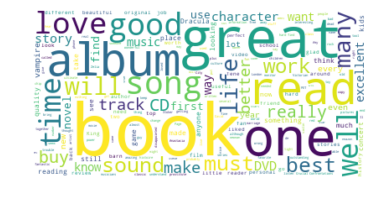

In [0]:
# Create and generate a word cloud image
cloud_positives = WordCloud(background_color='white').generate(positive_reviews)
 
# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

2. In the second step, you will create a new feature for the length of each review and add that new feature to the dataset.

- Tokenize each item in the review column.
- Iterate over the created word_tokens list and find the length of each item in the list. Append that length to the empty len_tokens list.

In [0]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]
word_tokens

In [0]:
# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 

In [0]:
reviews.head()

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


#### Step 2: Building a vectorizer

In this exercise, you are asked to build a TfIDf transformation of the review column in the reviews dataset. You are asked to specify the n-grams, stop words, the pattern of tokens and the size of the vocabulary arguments.

This is the last step before we train a classifier to predict the sentiment of a review.

In [0]:
reviews = pd.read_csv("amazon_reviews_sample.csv")
print("review df dimension: ", reviews.shape)
reviews.tail()

review df dimension:  (10000, 3)


,Unnamed: 0,score,review
9995,9995,1,A revelation of life in small town America in...
9996,9996,1,Great biography of a very interesting journal...
9997,9997,0,Interesting Subject; Poor Presentation: You'd...
9998,9998,0,Don't buy: The box looked used and it is obvi...
9999,9999,1,Beautiful Pen and Fast Delivery.: The pen was...


- Import the Tfidf vectorizer and the default list of English stop words.
- Build the Tfidf vectorizer, specifying - in this order - the following arguments: use as stop words the default list of English stop words; as n-grams use uni- and bi-grams;the maximum number of features should be 200; capture only words using the specified pattern.
- Create a DataFrame using the Tfidf vectorizer.

In [0]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS 

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(reviews.review)
# Create sparse matrix from the vectorizer
X = vect.transform(reviews.review)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

Top 5 rows of the DataFrame: 
    able  action  actually  ago  album  ...  writing  written  wrong  year     years
0   0.0     0.0       0.0  0.0    0.0  ...      0.0      0.0    0.0   0.0  0.000000
1   0.0     0.0       0.0  0.0    0.0  ...      0.0      0.0    0.0   0.0  0.208885
2   0.0     0.0       0.0  0.0    0.0  ...      0.0      0.0    0.0   0.0  0.152410
3   0.0     0.0       0.0  0.0    0.0  ...      0.0      0.0    0.0   0.0  0.000000
4   0.0     0.0       0.0  0.0    0.0  ...      0.0      0.0    0.0   0.0  0.000000

[5 rows x 200 columns]


#### Step 3: Building a classifier
This is the last step in the sentiment analysis prediction. 

Your task is to train a logistic regression to predict the sentiment. The data has been imported for you and is called reviews_transformed. The target is called score and is binary : 1 when the product review is positive and 0 otherwise.

In [0]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]
word_tokens
# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 

In [0]:
reviews.shape

(10000, 4)

In [0]:
reviews.head()

,Unnamed: 0,score,review,n_words
0,0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,1,The best soundtrack ever to anything.: I'm re...,109
2,2,1,Amazing!: This soundtrack is my favorite musi...,165
3,3,1,Excellent Soundtrack: I truly like this sound...,145
4,4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


In [0]:
temp = reviews[['score', 'n_words']]
temp.tail()

,score,n_words
9995,1,175
9996,1,153
9997,0,122
9998,0,33
9999,1,115


In [0]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS 

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), 
                       max_features=200, 
                       token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(reviews.review)
# Create sparse matrix from the vectorizer
X = vect.transform(reviews.review)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

Top 5 rows of the DataFrame: 
    able  action  actually  ago  album  ...  writing  written  wrong  year     years
0   0.0     0.0       0.0  0.0    0.0  ...      0.0      0.0    0.0   0.0  0.000000
1   0.0     0.0       0.0  0.0    0.0  ...      0.0      0.0    0.0   0.0  0.208885
2   0.0     0.0       0.0  0.0    0.0  ...      0.0      0.0    0.0   0.0  0.152410
3   0.0     0.0       0.0  0.0    0.0  ...      0.0      0.0    0.0   0.0  0.000000
4   0.0     0.0       0.0  0.0    0.0  ...      0.0      0.0    0.0   0.0  0.000000

[5 rows x 200 columns]


In [0]:
reviews_transformed = pd.concat([temp, reviews_transformed], axis=1)
print("vectorized dataframe dimension", reviews_transformed.shape)
reviews_transformed.head()

vectorized dataframe dimension (10000, 202)


,score,n_words,able,action,actually,ago,album,amazing,amazon,author,away,bad,beautiful,believe,best,better,big,bit,book,books,boring,bought,buy,buying,came,card,cd,character,characters,children,classic,come,couldn,cover,day,definitely,did,didn,different,disappointed,...,terrible,thing,things,think,thought,time,times,toy,tried,true,try,trying,understand,use,used,using,ve,version,video,want,wanted,wasn,waste,watch,watching,way,went,wish,won,wonderful,work,works,world,worst,worth,writing,written,wrong,year,years
0,1,87,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.274041,0.0,0.304063,0.0,0.213566,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,1,109,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.377272,0.0,0.0,0.248198,0.0,0.0,0.0,0.0,0.181679,0.0,0.0,0.0,0.22013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.219408,0.0,0.0,0.0,0.0,0.208885
2,1,165,0.0,0.0,0.0,0.0,0.0,0.382773,0.0,0.0,0.000000,0.0,0.000000,0.0,0.137636,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.132560,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.343647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292315,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192689,0.0,0.0,0.142935,0.0,0.0,0.0,0.160089,0.0,0.0,0.0,0.0,0.152410
3,1,145,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.135080,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.112422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.35871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,1,109,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.197209,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.164129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209418,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


You will use the dataset that you built in the previous steps. Namely, it contains a feature for the length of reviews, and 200 features created with the Tfidf vectorizer.

- Perform the train/test split, allocating 20% of the data to testing and setting the random seed to 456.
- Train a logistic regression model.
- Predict the class.
- Print out the accuracy score and the confusion matrix on the test set.

In [0]:
# Define X and y
y = reviews_transformed.score
X = reviews_transformed.drop('score', axis=1)

In [0]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: score, dtype: int64

In [0]:
X[:5]

,n_words,able,action,actually,ago,album,amazing,amazon,author,away,bad,beautiful,believe,best,better,big,bit,book,books,boring,bought,buy,buying,came,card,cd,character,characters,children,classic,come,couldn,cover,day,definitely,did,didn,different,disappointed,does,...,terrible,thing,things,think,thought,time,times,toy,tried,true,try,trying,understand,use,used,using,ve,version,video,want,wanted,wasn,waste,watch,watching,way,went,wish,won,wonderful,work,works,world,worst,worth,writing,written,wrong,year,years
0,87,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.274041,0.0,0.304063,0.0,0.213566,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,109,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.377272,0.0,0.0,0.248198,0.0,0.0,0.0,0.0,0.181679,0.0,0.0,0.0,0.22013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.219408,0.0,0.0,0.0,0.0,0.208885
2,165,0.0,0.0,0.0,0.0,0.0,0.382773,0.0,0.0,0.000000,0.0,0.000000,0.0,0.137636,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.132560,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.343647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292315,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192689,0.0,0.0,0.142935,0.0,0.0,0.0,0.160089,0.0,0.0,0.0,0.0,0.152410
3,145,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.135080,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.112422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.35871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,109,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.197209,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.164129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209418,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [0]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

,actually,album,amazing,amazon,arrived,audio,author,away,bad,barbie,batteries,bbc,believe,best,better,beware,big,bit,book,bought,box,buy,cable,cake,came,castle,cd,charger,chrono,clear,comes,compression,contacted,control,cookie,cookie mix,cross,daughter,day,deal,...,soulwax,sound,soundtrack,sourdough,star,stars,stockings,story,thing,think,thought,time,title,topper,tracks,travel,tried,true,tv,understand,use,used,vcr,ve,video,view,want,wanting,waste,wish,won,work,worth,wouldn,writing,written,year,year old,years,young
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.244537,0.0,0.0,0.0,0.0,0.0,0.190345,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.270470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256198,0.0,0.0,0.0,...,0.0,0.244537,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.338455,0.0,0.0,0.0,0.217407,0.0,0.0,0.0,0.177993,0.0,0.0,0.0,0.0,0.208642,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.434815,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.208642,0.0,0.0,0.0,0.0,0.0,0.194351,0.0
2,0.0,0.0,0.274759,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.111427,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.117199,0.0,0.0,0.0,0.0,0.000000,0.0,0.316665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149978,0.0,0.0,0.0,...,0.0,0.000000,0.429454,0.0,0.13238,0.137380,0.0,0.000000,0.0,0.0,0.0,0.260510,0.0,0.0,0.149978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255940,0.000000,0.0,0.0,0.0,0.0,0.149978,0.0,0.117199,0.137380,0.0,0.0,0.0,0.0,0.0,0.127970,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.120778,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162563,0.0,0.0,0.0,...,0.0,0.000000,0.465491,0.0,0.00000,0.148908,0.0,0.000000,0.0,0.0,0.0,0.094124,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.325126,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.156354,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.222171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210447,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.00000,0.192770,0.0,0.222171,0.0,0.0,0.0,0.121849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179567,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [0]:
X_train[:5]

,about,after,again,album,all,also,am,amazon,an,and,another,any,anyone,are,as,at,author,back,bad,be,because,been,before,being,best,better,book,books,boring,bought,but,buy,by,can,cd,characters,could,did,didn,do,...,those,thought,through,time,times,to,too,two,up,use,used,ve,version,very,want,was,waste,watch,way,we,well,were,what,when,where,which,while,who,why,will,with,work,world,worth,would,written,year,years,you,your
9216,0,0,0,0,2,0,0,0,0,2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,...,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,3,0
7324,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
918,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5902,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2807,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_test[:5]

2656    0
445     1
9505    0
332     1
4168    0
Name: score, dtype: int64

In [0]:
# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.795
[[0.409  0.1055]
 [0.0995 0.386 ]]
